# Build and Evaluate a Scoring Model for loans of a Bank

Import the libraries we need

In [1]:
# Core libraries
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

# Sklearn functionality
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.feature_selection import RFE
from sklearn.metrics import *
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

In [2]:
from sklearn.feature_selection import RFE

# Define the task

Make predictions about loans payement capacity for bank's clients according to their personnal data

# Acquire clean data

## Load the data

We load and clean our data

In [3]:
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows',None)

In [4]:
path_0= "C://Users//AMC//Desktop//P4_Contruire un Model de Scoring//Files of preparation//Scoring_files//application_train.csv"

In [5]:
df = pd.read_csv(path_0)

In [6]:
# Examine the date shape
print (f'  The dataset has  {df.shape[0]} rows ,and {df.shape[1]} columns' )

  The dataset has  307511 rows ,and 122 columns


In [7]:
# Inspect first few rows
df.head(3)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  

[3 rows x 122 columns]

Check we have sensible data types for each feature. E.g. we don't want any numeric features to be showing as object type.

In [8]:
# Check data types
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [9]:
# Check for nulls
df.isnull().mean().sort_values()

SK_ID_CURR                     0.000000
HOUR_APPR_PROCESS_START        0.000000
REG_REGION_NOT_WORK_REGION     0.000000
LIVE_REGION_NOT_WORK_REGION    0.000000
REG_CITY_NOT_LIVE_CITY         0.000000
                                 ...   
NONLIVINGAPARTMENTS_MEDI       0.694330
NONLIVINGAPARTMENTS_MODE       0.694330
COMMONAREA_MODE                0.698723
COMMONAREA_AVG                 0.698723
COMMONAREA_MEDI                0.698723
Length: 122, dtype: float64

In [10]:
# We use the loop below to summarize all null and zero values in xls file 

In [11]:
d=[]
for i in df.columns:
    x = df[i].isna().sum()
    y = df[i].value_counts().sum()
    z = df[i].dtypes
    w = (df[i]==0).sum()
    m = 100*x/307511

       
    d.append(
        {
            'variable':i,
            'count_of_values':y,
            'Missing_values':x,
            'Ratio_missing %':"%.4f" % m,
            'dtype' : z,
            'Nul_values':w
            
             }
          )
k=pd.DataFrame(d)
display(k)

variable  count_of_values  Missing_values  \
0                    SK_ID_CURR           307511               0   
1                        TARGET           307511               0   
2            NAME_CONTRACT_TYPE           307511               0   
3                   CODE_GENDER           307511               0   
4                  FLAG_OWN_CAR           307511               0   
..                          ...              ...             ...   
117   AMT_REQ_CREDIT_BUREAU_DAY           265992           41519   
118  AMT_REQ_CREDIT_BUREAU_WEEK           265992           41519   
119   AMT_REQ_CREDIT_BUREAU_MON           265992           41519   
120   AMT_REQ_CREDIT_BUREAU_QRT           265992           41519   
121  AMT_REQ_CREDIT_BUREAU_YEAR           265992           41519   

    Ratio_missing %    dtype  Nul_values  
0            0.0000    int64           0  
1            0.0000    int64      282686  
2            0.0000   object           0  
3            0.0000   object           0  
4            0.0000   object           0  
..              ...      ...         ...  
117         13.5016  float64      264503  
118         13.5016  float64      257456  
119         13.5016  float64      222233  
120         13.5016  float64      215417  
121         13.5016  float64       71801  

[122 rows x 6 columns]

# Clean the Data

-----------------------------------------------------------------------
## According to missing values ratio & relevance of variables , some not relevant variables have to be dropped from dataset before going further in the Analysis
----------------------------------------------------------------------------------
All feature on 47 Columns from 'APARTMENTS_AVG' to 'EMERGENCYSTATE_MODE' have no added value on analysis and data comprehension and also have lot of missing value which can't be imputed in a clear way
----------------------------------------------------------------------------------


In [12]:
# Defining and Dropping of 47 columns :

In [13]:
col_to_drop = df.iloc[:,44:91]

In [14]:
col_to_drop_list = col_to_drop.columns

In [15]:
df.drop(df[col_to_drop_list],axis=1,inplace=True)

In [16]:
df.shape

(307511, 75)

In [17]:
df.head(2)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  

[2 rows x 75 columns]

In [18]:
# Features with missing values
[features for features in df.columns if df[features].isnull().sum()>0]

['AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'OWN_CAR_AGE',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

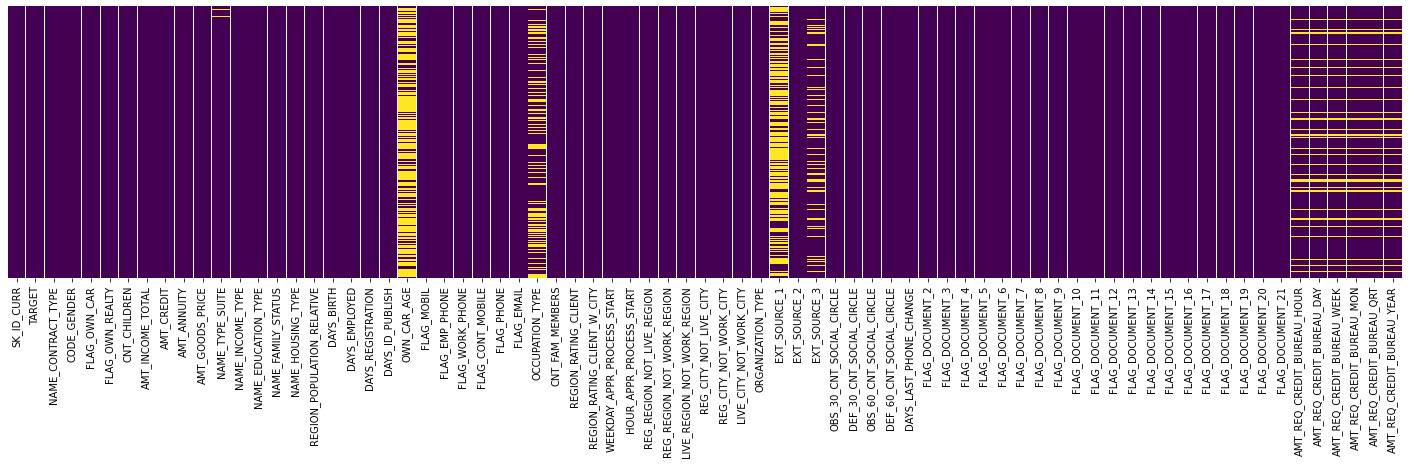

In [19]:
plt.figure(figsize = (25,5))
sns.heatmap(df.isnull(), yticklabels=False,cbar=False,cmap='viridis')
plt.show()

In [20]:
# Let's have a look on statistics data of each feature first for raw data
df.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  ...  \
count               307511.000000  307511.000000  307511.000000  ...   
mean                     0.020868  -16036.995067   63815.045904  ...   
std                      0.013831    4363.988632  141275.766519  ...   
min                      0.000290  -25229.000000  -17912.000000  ...   
25%                      0.010006  -19682.000000   -2760.000000  ...   
50%                      0.018850  -15750.000000   -1213.000000  ...   
75%                      0.028663  -12413.000000    -289.000000  ...   
max                      0.072508   -7489.000000  365243.000000  ...   

       FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
count     307511.000000     307511.000000     307511.000000     307511.000000   
mean           0.008130          0.000595          0.000507          0.000335   
std            0.089798          0.024387          0.022518          0.018299   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.000000          0.000000          0.000000          0.000000   
75%            0.000000          0.000000          0.000000          0.000000   
max            1.000000          1.000000          1.000000          1.000000   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count               265992.000000              265992.000000   
mean                     0.006402                   0.007000   
std                      0.083849                   0.110757   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      4.000000                   9.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count               265992.000000              265992.000000   
mean                     0.034362                   0.267395   
std                      0.204685                   0.916002   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      8.000000                  27.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count              265992.000000               265992.000000  
mean                    0.265474                    1.899974  
std                     0.794056                    1.869295  
min                     0.000000                    0.000000  
25%              

In [21]:
# Define a new column age from the column 'DAYS_BIRTH'
df['AGE_CLIENT'] = df['DAYS_BIRTH']//(-365)

In [22]:
df['AGE_CLIENT'].unique()

array([25, 45, 52, 54, 46, 37, 51, 55, 39, 27, 36, 38, 23, 35, 26, 48, 31,
       50, 40, 30, 68, 43, 28, 41, 32, 33, 47, 57, 65, 44, 64, 21, 59, 49,
       56, 62, 53, 42, 29, 67, 63, 61, 58, 60, 34, 22, 24, 66, 69, 20],
      dtype=int64)

In [23]:
# Inspect 'GENDER' variable : 

In [24]:
df['CODE_GENDER'].unique()

array(['M', 'F', 'XNA'], dtype=object)

In [25]:
df['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [26]:
# Check rows concerned by 'XNA' gender type and see how it's distributed and which 'TARGET' values are related to
# We have only 4 rows for that 'gender' type and all of them show '0' for 'TARGET' variable 
# There is no impact on deleting this rows according to dataset shape and will make analysis easier
df.loc[df['CODE_GENDER']=='XNA']

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
35657       141289       0    Revolving loans         XNA            Y   
38566       144669       0    Revolving loans         XNA            N   
83382       196708       0    Revolving loans         XNA            N   
189640      319880       0    Revolving loans         XNA            Y   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
35657                Y             0          207000.0    382500.0   
38566                Y             2          157500.0    270000.0   
83382                Y             1          135000.0    405000.0   
189640               Y             0          247500.0    540000.0   

        AMT_ANNUITY  ...  FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
35657       19125.0  ...                 0                0                0   
38566       13500.0  ...                 0                0                0   
83382       20250.0  ...                 0                0                0   
189640      27000.0  ...                 0                0                0   

       AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
35657                         0.0                       0.0   
38566                         0.0                       0.0   
83382                         0.0                       0.0   
189640                        0.0                       0.0   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
35657                         0.0                        0.0   
38566                         0.0                        3.0   
83382                         0.0                        0.0   
189640                        0.0                        0.0   

        AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  AGE_CLIENT  
35657                         0.0                         1.0          55  
38566                         0.0                         4.0          37  
83382                         0.0                         3.0          29  
189640                        1.0                         6.0          26  

[4 rows x 76 columns]

In [27]:
df.drop(df[df['CODE_GENDER'] == 'XNA'].index, inplace = True)

In [28]:
df.loc[df['CODE_GENDER']=='XNA']

Empty DataFrame
Columns: [SK_ID_CURR, TARGET, NAME_CONTRACT_TYPE, CODE_GENDER, FLAG_OWN_CAR, FLAG_OWN_REALTY, CNT_CHILDREN, AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE, NAME_TYPE_SUITE, NAME_INCOME_TYPE, NAME_EDUCATION_TYPE, NAME_FAMILY_STATUS, NAME_HOUSING_TYPE, REGION_POPULATION_RELATIVE, DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH, OWN_CAR_AGE, FLAG_MOBIL, FLAG_EMP_PHONE, FLAG_WORK_PHONE, FLAG_CONT_MOBILE, FLAG_PHONE, FLAG_EMAIL, OCCUPATION_TYPE, CNT_FAM_MEMBERS, REGION_RATING_CLIENT, REGION_RATING_CLIENT_W_CITY, WEEKDAY_APPR_PROCESS_START, HOUR_APPR_PROCESS_START, REG_REGION_NOT_LIVE_REGION, REG_REGION_NOT_WORK_REGION, LIVE_REGION_NOT_WORK_REGION, REG_CITY_NOT_LIVE_CITY, REG_CITY_NOT_WORK_CITY, LIVE_CITY_NOT_WORK_CITY, ORGANIZATION_TYPE, EXT_SOURCE_1, EXT_SOURCE_2, EXT_SOURCE_3, OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE, DAYS_LAST_PHONE_CHANGE, FLAG_DOCUMENT_2, FLAG_DOCUMENT_3, FLAG_DOCUMENT_4, FLAG_DOCUMENT_5, FLAG_DOCUMENT_6, FLAG_DOCUMENT_7, FLAG_DOCUMENT_8, FLAG_DOCUMENT_9, FLAG_DOCUMENT_10, FLAG_DOCUMENT_11, FLAG_DOCUMENT_12, FLAG_DOCUMENT_13, FLAG_DOCUMENT_14, FLAG_DOCUMENT_15, FLAG_DOCUMENT_16, FLAG_DOCUMENT_17, FLAG_DOCUMENT_18, FLAG_DOCUMENT_19, FLAG_DOCUMENT_20, FLAG_DOCUMENT_21, AMT_REQ_CREDIT_BUREAU_HOUR, AMT_REQ_CREDIT_BUREAU_DAY, AMT_REQ_CREDIT_BUREAU_WEEK, AMT_REQ_CREDIT_BUREAU_MON, AMT_REQ_CREDIT_BUREAU_QRT, AMT_REQ_CREDIT_BUREAU_YEAR, AGE_CLIENT]
Index: []

[0 rows x 76 columns]

Treatment of Feature : ['AMT_ANNUITY'] which is described as : Loan annuity / 
*************************************************************************************** 
We need to correct an outlier value of 'AMT_INCOME_TOTAL' to be able to best impute missing values of "AMT_ANNUITY'

In [29]:
# Check the 'Annuity' values against 'credit amount'
df[['AMT_INCOME_TOTAL','AMT_ANNUITY','AMT_CREDIT']].describe()

AMT_INCOME_TOTAL    AMT_ANNUITY    AMT_CREDIT
count      3.075070e+05  307495.000000  3.075070e+05
mean       1.687977e+05   27108.666786  5.990286e+05
std        2.371246e+05   14493.798379  4.024926e+05
min        2.565000e+04    1615.500000  4.500000e+04
25%        1.125000e+05   16524.000000  2.700000e+05
50%        1.471500e+05   24903.000000  5.135310e+05
75%        2.025000e+05   34596.000000  8.086500e+05
max        1.170000e+08  258025.500000  4.050000e+06

In [30]:
# Let's check if we have any outliers within these variables

Text(0.5, 1.0, 'INCOME means against GENDER & TARGET ')

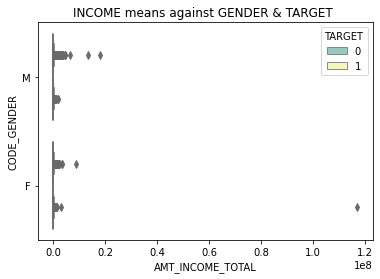

In [31]:
# The plot below indicates an outlier value for INOCME 
ax = sns.boxplot(x="AMT_INCOME_TOTAL", y="CODE_GENDER", hue="TARGET",
                     data=df, palette="Set3")
ax.set_title("INCOME means against GENDER & TARGET ")

In [32]:
# Let's treat outlier of AMT_INCOME_TOTAL variable 
# According to it's value, we can assume that this income's value is somehow an input error which occur during registration
# the correct value sh'd be divided by 1000

In [33]:
df['AMT_INCOME_TOTAL'].value_counts(bins=12)

(-91324.35100000001, 9773512.5]    307504
(9773512.5, 19521375.0]                 2
(107252137.5, 117000000.0]              1
(19521375.0, 29269237.5]                0
(29269237.5, 39017100.0]                0
(39017100.0, 48764962.5]                0
(48764962.5, 58512825.0]                0
(58512825.0, 68260687.5]                0
(68260687.5, 78008550.0]                0
(78008550.0, 87756412.5]                0
(87756412.5, 97504275.0]                0
(97504275.0, 107252137.5]               0
Name: AMT_INCOME_TOTAL, dtype: int64

In [34]:
df['AMT_INCOME_TOTAL'].max()

117000000.0

In [35]:
# Replace the outlier by divide it by 1000 which gives an accepted value according to amount of credit
df['AMT_INCOME_TOTAL'] = df['AMT_INCOME_TOTAL'].replace(117000000,117000)

Text(0.5, 1.0, 'INCOME means against GENDER & TARGET ')

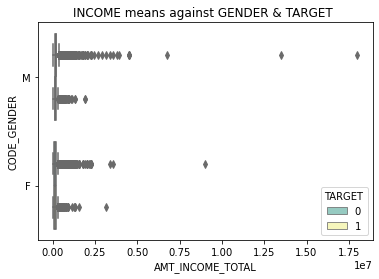

In [36]:
# Check the boxplot after correction of outlier 
ax = sns.boxplot(x="AMT_INCOME_TOTAL", y="CODE_GENDER", hue="TARGET",
                     data=df, palette="Set3")
ax.set_title("INCOME means against GENDER & TARGET ")

In [37]:
# Let's check the population within the dataset with high income (greater than 1 000 000 )

In [38]:
df_rich = df.loc[df['AMT_INCOME_TOTAL']>1000000]

In [39]:
df_rich.shape

(249, 76)

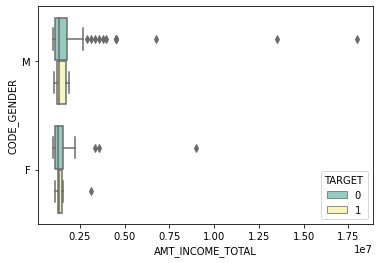

In [40]:
ax = sns.boxplot(x="AMT_INCOME_TOTAL", y="CODE_GENDER", hue="TARGET",
                     data=df_rich, palette="Set3")

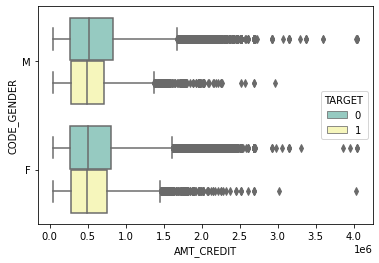

In [41]:
ax = sns.boxplot(x="AMT_CREDIT", y="CODE_GENDER", hue="TARGET",
                     data=df, palette="Set3")

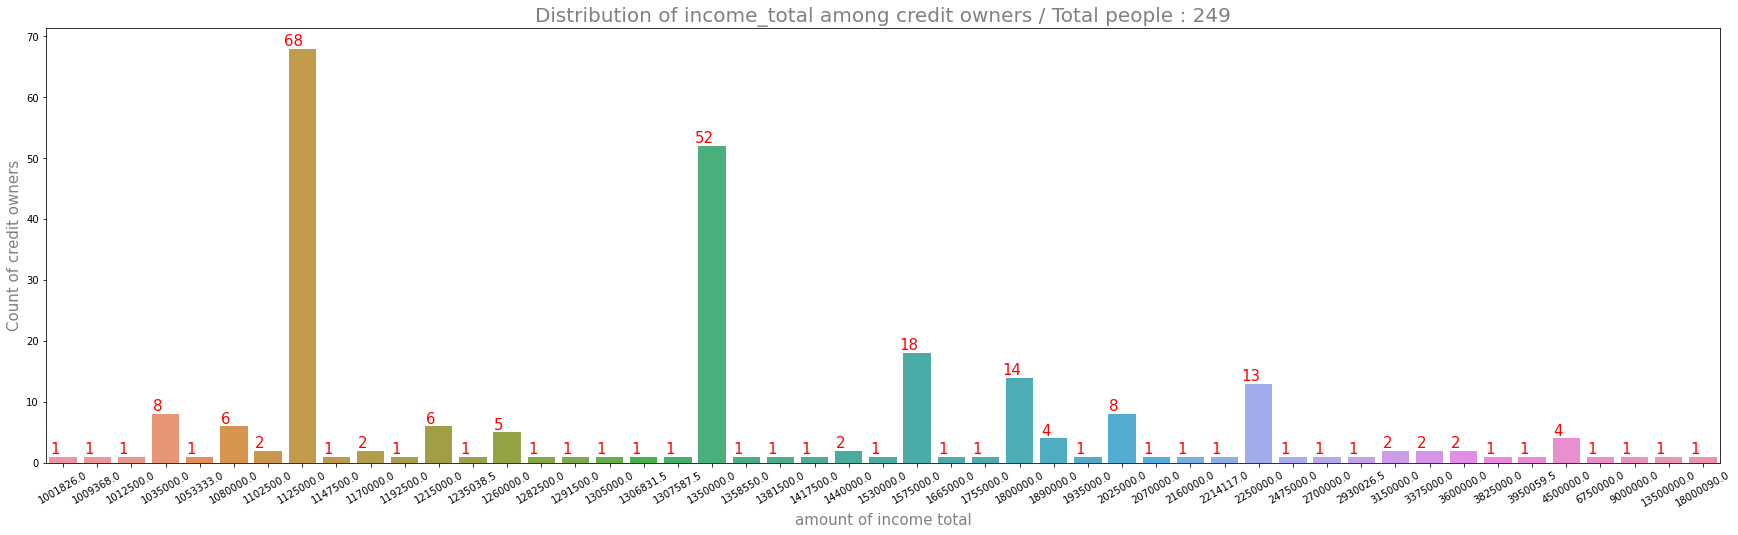

In [42]:
plt.figure(figsize=(30,8))
plt.xticks(rotation=30, color = 'black' )
ax = sns.countplot(x='AMT_INCOME_TOTAL', data=df_rich,)

for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.16, p.get_height()), color='r',ha='center',va='bottom',size=15)
    
plt.title('Distribution of income_total among credit owners / Total people : 249',size=20, color='grey' )
plt.xlabel('amount of income total',size=15, color='grey')
plt.ylabel('Count of credit owners',size=15, color='grey')
plt.show()

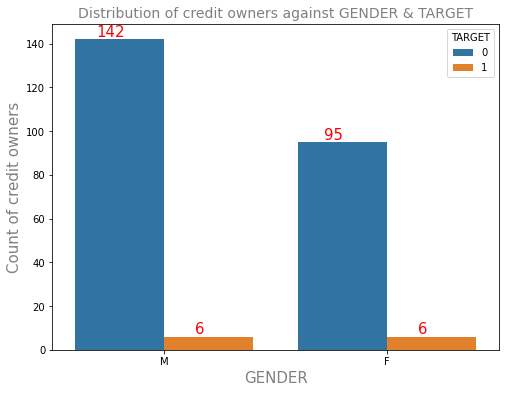

In [43]:
plt.figure(figsize=(8,6))
plt.xticks(rotation=0, color = 'black' )
ax = sns.countplot(x='CODE_GENDER', hue='TARGET', data=df_rich,)

for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.16, p.get_height()), color='r',ha='center',va='bottom',size=15)
    
plt.title('Distribution of credit owners against GENDER & TARGET',size=14, color='grey' )
plt.xlabel('GENDER',size=15, color='grey')
plt.ylabel('Count of credit owners',size=15, color='grey')
plt.show()

according to the owners distribution against total income or loan payment behaviour , we will consider the dataset as it is right now for variable:
'AMT_INCOME_TOTAL'

Let's define some ratio variables to understand how variables 'AMT_ANNUITY', 'AMT_CREDIT', 'AMT_INCOME_TOTAL' are correlated

In [44]:
# Define temporary dataframe
df_ratio = df[['AMT_ANNUITY', 'AMT_CREDIT', 'AMT_INCOME_TOTAL']]
df_ratio.head()

AMT_ANNUITY  AMT_CREDIT  AMT_INCOME_TOTAL
0      24700.5    406597.5          202500.0
1      35698.5   1293502.5          270000.0
2       6750.0    135000.0           67500.0
3      29686.5    312682.5          135000.0
4      21865.5    513000.0          121500.0

In [45]:
# Definition of some useful ratios 
df['ratio_INC_ANN'] = df['AMT_INCOME_TOTAL']//df['AMT_ANNUITY'] # Defines payment annual capacity of annuity
df['ratio_CRE_ANN'] = df['AMT_CREDIT']//df['AMT_ANNUITY'] # Defines how many years needed to pay back the loan
df['ratio_CRE_INC'] = df['AMT_CREDIT']//df['AMT_INCOME_TOTAL'] # Defines credit value according to income capacity 

In [46]:
df_ratio.describe()

AMT_ANNUITY    AMT_CREDIT  AMT_INCOME_TOTAL
count  307495.000000  3.075070e+05      3.075070e+05
mean    27108.666786  5.990286e+05      1.684176e+05
std     14493.798379  4.024926e+05      1.088122e+05
min      1615.500000  4.500000e+04      2.565000e+04
25%     16524.000000  2.700000e+05      1.125000e+05
50%     24903.000000  5.135310e+05      1.471500e+05
75%     34596.000000  8.086500e+05      2.025000e+05
max    258025.500000  4.050000e+06      1.800009e+07

In [47]:
df[['ratio_INC_ANN','ratio_CRE_ANN','ratio_CRE_INC']].describe()

ratio_INC_ANN  ratio_CRE_ANN  ratio_CRE_INC
count  307495.000000  307495.000000   307507.00000
mean        6.857659      21.176169        3.48328
std         4.974781       7.846265        2.70194
min         0.000000       8.000000        0.00000
25%         4.000000      15.000000        2.00000
50%         6.000000      20.000000        3.00000
75%         8.000000      27.000000        5.00000
max       300.000000      45.000000       84.00000

<AxesSubplot:xlabel='ratio_CRE_ANN', ylabel='ratio_CRE_INC'>

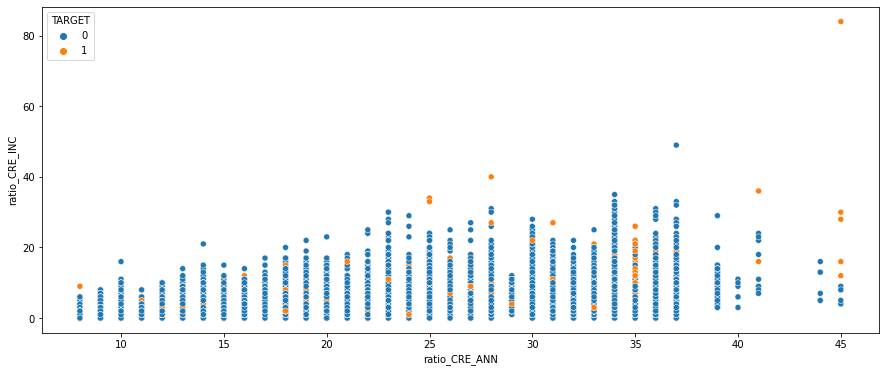

In [48]:
# The plot shows some points which can be considered as outliers
# The plot shows we have bad refunders for all ratios 
# Maybe we will adjust these values according to modelling performance to avoid losing initial information from raw data
plt.figure(figsize=(15,6))
sns.scatterplot(x=df['ratio_CRE_ANN'],y=df['ratio_CRE_INC'],hue=df['TARGET'])

<AxesSubplot:xlabel='ratio_CRE_ANN', ylabel='ratio_INC_ANN'>

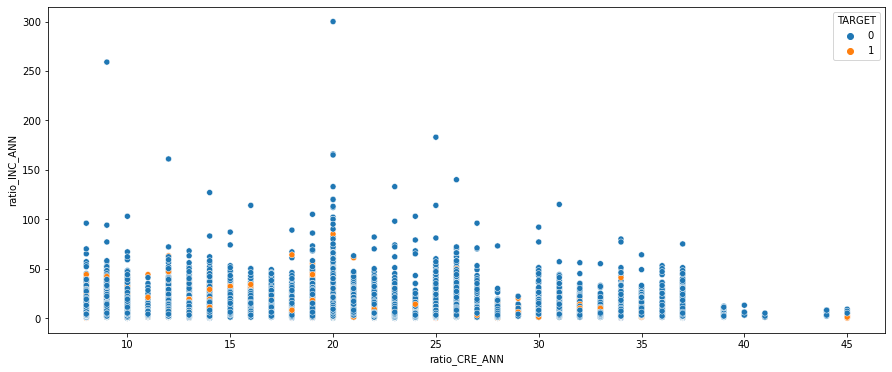

In [49]:
plt.figure(figsize=(15,6))
sns.scatterplot(x=df['ratio_CRE_ANN'],y=df['ratio_INC_ANN'],hue=df['TARGET'])

In [50]:
df.loc[df['ratio_CRE_INC']==84]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
20727      124157       1         Cash loans           F            Y   

      FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
20727               Y             0           25650.0   2173500.0   

       AMT_ANNUITY  ...  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
20727      48118.5  ...                         NaN                       NaN   

      AMT_REQ_CREDIT_BUREAU_WEEK AMT_REQ_CREDIT_BUREAU_MON  \
20727                        NaN                       NaN   

      AMT_REQ_CREDIT_BUREAU_QRT AMT_REQ_CREDIT_BUREAU_YEAR  AGE_CLIENT  \
20727                       NaN                        NaN          58   

       ratio_INC_ANN  ratio_CRE_ANN  ratio_CRE_INC  
20727            0.0           45.0           84.0  

[1 rows x 79 columns]

In [51]:
# We will consider the mean of variable 'ratio_CRE_ANN' (= 20) as reference to replace "AMT_ANNUITY" null values

In [52]:
df.loc[df['AMT_ANNUITY'].isna()]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
47531       155054       0         Cash loans           M            N   
50035       157917       0         Cash loans           F            N   
51594       159744       0         Cash loans           F            N   
55025       163757       0         Cash loans           F            N   
59934       169487       0         Cash loans           M            Y   
75873       187985       0         Cash loans           M            Y   
89343       203726       0         Cash loans           F            Y   
123872      243648       0         Cash loans           F            N   
207186      340147       0         Cash loans           M            N   
227939      364022       0         Cash loans           F            N   
239329      377174       0         Cash loans           F            N   
241835      379997       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
47531                N             0          180000.0    450000.0   
50035                N             0           94500.0    450000.0   
51594                N             0          202500.0    539100.0   
55025                N             0          162000.0    296280.0   
59934                N             0          202500.0    360000.0   
75873                N             0          144000.0    219249.0   
89343                N             0           90000.0    157500.0   
123872               Y             0          202500.0    929088.0   
207186               N             0          171000.0    486000.0   
227939               Y             0          315000.0    628069.5   
239329               Y             0          157500.0    792000.0   
241835               N             0          315000.0   1483231.5   

        AMT_ANNUITY  ...  AMT_REQ_CREDIT_BUREAU_HOUR  \
47531           NaN  ...                         0.0   
50035           NaN  ...                         0.0   
51594           NaN  ...                         0.0   
55025           NaN  ...                         0.0   
59934           NaN  ...                         0.0   
75873           NaN  ...                         0.0   
89343           NaN  ...                         0.0   
123872          NaN  ...                         0.0   
207186          NaN  ...                         0.0   
227939          NaN  ...                         0.0   
239329          NaN  ...                         0.0   
241835          NaN  ...                         NaN   

       AMT_REQ_CREDIT_BUREAU_DAY AMT_REQ_CREDIT_BUREAU_WEEK  \
47531                        0.0                        0.0   
50035                        0.0                        0.0   
51594                        0.0                        0.0   
55025                        0.0                        0.0   
59934                        0.0                        1.0   
75873                        0.0                        0.0   
89343                        0.0                        0.0   
123872                       0.0                        0.0   
207186                       0.0                        1.0   
227939                       0.0                        1.0   
239329                       0.0                        0.0   
241835                       NaN                        NaN   

       AMT_REQ_CREDIT_BUREAU_MON AMT_REQ_CREDIT_BUREAU_QRT  \
47531                        0.0                       1.0   
50035                        1.0                       0.0   
51594                        1.0                       0.0   
55025                        1.0                       0.0   
59934                        0.0                       0.0   
75873                        0.0                       0.0   
89343                        2.0                       0.0   
123872                       0.0                       1.0   
207186                     

In [53]:
# Prodede to replacement of Null values

In [54]:
df['AMT_ANNUITY'] = df['AMT_ANNUITY'].fillna(df['AMT_CREDIT']/20)

In [55]:
# check if Null are still present in dataset
df.loc[df['AMT_ANNUITY'].isna()]

Empty DataFrame
Columns: [SK_ID_CURR, TARGET, NAME_CONTRACT_TYPE, CODE_GENDER, FLAG_OWN_CAR, FLAG_OWN_REALTY, CNT_CHILDREN, AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE, NAME_TYPE_SUITE, NAME_INCOME_TYPE, NAME_EDUCATION_TYPE, NAME_FAMILY_STATUS, NAME_HOUSING_TYPE, REGION_POPULATION_RELATIVE, DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH, OWN_CAR_AGE, FLAG_MOBIL, FLAG_EMP_PHONE, FLAG_WORK_PHONE, FLAG_CONT_MOBILE, FLAG_PHONE, FLAG_EMAIL, OCCUPATION_TYPE, CNT_FAM_MEMBERS, REGION_RATING_CLIENT, REGION_RATING_CLIENT_W_CITY, WEEKDAY_APPR_PROCESS_START, HOUR_APPR_PROCESS_START, REG_REGION_NOT_LIVE_REGION, REG_REGION_NOT_WORK_REGION, LIVE_REGION_NOT_WORK_REGION, REG_CITY_NOT_LIVE_CITY, REG_CITY_NOT_WORK_CITY, LIVE_CITY_NOT_WORK_CITY, ORGANIZATION_TYPE, EXT_SOURCE_1, EXT_SOURCE_2, EXT_SOURCE_3, OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE, DAYS_LAST_PHONE_CHANGE, FLAG_DOCUMENT_2, FLAG_DOCUMENT_3, FLAG_DOCUMENT_4, FLAG_DOCUMENT_5, FLAG_DOCUMENT_6, FLAG_DOCUMENT_7, FLAG_DOCUMENT_8, FLAG_DOCUMENT_9, FLAG_DOCUMENT_10, FLAG_DOCUMENT_11, FLAG_DOCUMENT_12, FLAG_DOCUMENT_13, FLAG_DOCUMENT_14, FLAG_DOCUMENT_15, FLAG_DOCUMENT_16, FLAG_DOCUMENT_17, FLAG_DOCUMENT_18, FLAG_DOCUMENT_19, FLAG_DOCUMENT_20, FLAG_DOCUMENT_21, AMT_REQ_CREDIT_BUREAU_HOUR, AMT_REQ_CREDIT_BUREAU_DAY, AMT_REQ_CREDIT_BUREAU_WEEK, AMT_REQ_CREDIT_BUREAU_MON, AMT_REQ_CREDIT_BUREAU_QRT, AMT_REQ_CREDIT_BUREAU_YEAR, AGE_CLIENT, ratio_INC_ANN, ratio_CRE_ANN, ratio_CRE_INC]
Index: []

[0 rows x 79 columns]

In [56]:
# Check the replacement result on dataset
df.loc[df.index == 47531]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
47531      155054       0         Cash loans           M            N   

      FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
47531               N             0          180000.0    450000.0   

       AMT_ANNUITY  ...  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
47531      22500.0  ...                         0.0                       0.0   

      AMT_REQ_CREDIT_BUREAU_WEEK AMT_REQ_CREDIT_BUREAU_MON  \
47531                        0.0                       0.0   

      AMT_REQ_CREDIT_BUREAU_QRT AMT_REQ_CREDIT_BUREAU_YEAR  AGE_CLIENT  \
47531                       1.0                        1.0          29   

       ratio_INC_ANN  ratio_CRE_ANN  ratio_CRE_INC  
47531            NaN            NaN            2.0  

[1 rows x 79 columns]

Treatment of variable 'AMT_GOODS_PRICE'
Definition : For consumer loans it is the price of the goods for which the loan is given/ so it has to be related to credit amount

In [57]:
df['AMT_GOODS_PRICE'].isna().sum()

278

In [58]:
df[['AMT_CREDIT','AMT_GOODS_PRICE']].describe()

AMT_CREDIT  AMT_GOODS_PRICE
count  3.075070e+05     3.072290e+05
mean   5.990286e+05     5.383977e+05
std    4.024926e+05     3.694472e+05
min    4.500000e+04     4.050000e+04
25%    2.700000e+05     2.385000e+05
50%    5.135310e+05     4.500000e+05
75%    8.086500e+05     6.795000e+05
max    4.050000e+06     4.050000e+06

In [59]:
# We have bad refunders at all credit levels.
# High positive correlation between variable 'AMT_CREDIT' and 'AMT_GOODS_PRICE'

<AxesSubplot:xlabel='AMT_GOODS_PRICE', ylabel='AMT_CREDIT'>

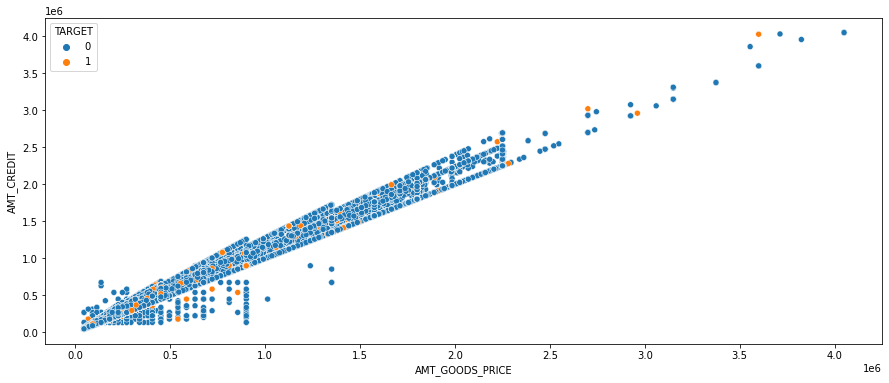

In [60]:
plt.figure(figsize=(15,6))
sns.scatterplot(x=df['AMT_GOODS_PRICE'],y=df['AMT_CREDIT'],hue=df['TARGET'])

In [61]:
# let's define 2 variables to confirm the slope for lines we get in previous scatter plot 

In [62]:
df['AMT_Diff_GOODS'] = df['AMT_CREDIT'] - df['AMT_GOODS_PRICE']
df['AMT_Ratio_GOODS'] = df['AMT_GOODS_PRICE'] / df['AMT_CREDIT']

In [63]:
df[['AMT_Diff_GOODS','AMT_Ratio_GOODS']].describe()

AMT_Diff_GOODS  AMT_Ratio_GOODS
count   307229.000000    307229.000000
mean     60919.882884         0.900688
std      70491.147451         0.096619
min    -765000.000000         0.166667
25%          0.000000         0.834725
50%      39204.000000         0.893815
75%      99972.000000         1.000000
max     540000.000000         6.666667

In [64]:
# let's check loans where credit amount was less than goods price :
df_goods_high = df.loc[df['AMT_Diff_GOODS']<0]

In [65]:
df_goods_high.describe()

SK_ID_CURR      TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  \
count     259.000000  259.000000    259.000000        259.000000   
mean   280738.610039    0.050193      0.471042     163125.868726   
std    101333.571763    0.218766      0.788809      87799.130920   
min    102276.000000    0.000000      0.000000      49500.000000   
25%    196915.500000    0.000000      0.000000     112500.000000   
50%    278536.000000    0.000000      0.000000     135000.000000   
75%    368169.500000    0.000000      1.000000     183375.000000   
max    452316.000000    1.000000      3.000000     675000.000000   

          AMT_CREDIT   AMT_ANNUITY  AMT_GOODS_PRICE  \
count     259.000000    259.000000     2.590000e+02   
mean   252886.100386  12644.305019     4.312355e+05   
std    133326.534080   6666.326704     2.343544e+05   
min    135000.000000   6750.000000     1.575000e+05   
25%    157500.000000   7875.000000     2.700000e+05   
50%    225000.000000  11250.000000     3.600000e+05   
75%    270000.000000  13500.000000     5.400000e+05   
max    900000.000000  45000.000000     1.350000e+06   

       REGION_POPULATION_RELATIVE    DAYS_BIRTH  DAYS_EMPLOYED  ...  \
count                  259.000000    259.000000     259.000000  ...   
mean                     0.020934 -15587.544402   45680.845560  ...   
std                      0.012807   4334.085370  124487.253845  ...   
min                      0.002042 -23645.000000  -15290.000000  ...   
25%                      0.010147 -19203.000000   -2993.000000  ...   
50%                      0.019101 -14998.000000   -1543.000000  ...   
75%                      0.028663 -12027.000000    -491.000000  ...   
max                      0.072508  -7708.000000  365243.000000  ...   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count                  239.000000                 239.000000   
mean                     0.008368                   0.209205   
std                      0.091285                   0.585324   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      1.000000                   4.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  AGE_CLIENT  \
count                 239.000000                  239.000000  259.000000   
mean                    0.242678                    2.071130   42.189189   
std                     0.579498                    1.935722   11.875604   
min                     0.000000                    0.000000   21.000000   
25%                     0.000000                    1.000000   32.500000   
50%                     0.000000                    2.000000   41.000000   
75%                     0.000000                    3.000000   52.000000   
max                     4.000000                   14.000000   64.000000   

       ratio_INC_ANN  ratio_CRE_ANN  ratio_CRE_INC  AMT_Diff_GOODS  \
count     259.000000          259.0     259.000000      259.000000   
mean       13.583012           20.0       1.254826  -178349.420849   
std         5.583394            0.0       0.833368   156985.910435   
min         2.000000           20.0       0.000000  -765000.000000   
25%        10.000000           20.0       1.000000  -225000.000000   
50%        12.000000           20.0       1.000000  -135000.000000   
75%        16.000000           20.0       2.000000   -67500.000000   
max        34.000000           20.0       7.000000   -22500.000000   

       AMT_Ratio_GOODS  
count       259.000000  
mean          1.769739  
std           0.739175  
min           1.058824  
25%           1.333333  
50%           1.500000  
75%           2.000000  
max           6.666667  

[8 rows x 69 columns]

In [66]:
#df_goods_high['TARGET'].value_counts()

In [67]:
# Only a 
df_goods_high['NAME_CONTRACT_TYPE'].value_counts()

Revolving loans    259
Name: NAME_CONTRACT_TYPE, dtype: int64

In [68]:
# Number of 'revolving loan' contract in the whole dataset
df.loc[df['NAME_CONTRACT_TYPE']=='Revolving loans'].shape

(29275, 81)

In [69]:
# check about null values 
# seems ok
df_goods_high.loc[(df_goods_high['AMT_CREDIT']==0)|(df_goods_high['AMT_GOODS_PRICE']==0)]

Empty DataFrame
Columns: [SK_ID_CURR, TARGET, NAME_CONTRACT_TYPE, CODE_GENDER, FLAG_OWN_CAR, FLAG_OWN_REALTY, CNT_CHILDREN, AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE, NAME_TYPE_SUITE, NAME_INCOME_TYPE, NAME_EDUCATION_TYPE, NAME_FAMILY_STATUS, NAME_HOUSING_TYPE, REGION_POPULATION_RELATIVE, DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH, OWN_CAR_AGE, FLAG_MOBIL, FLAG_EMP_PHONE, FLAG_WORK_PHONE, FLAG_CONT_MOBILE, FLAG_PHONE, FLAG_EMAIL, OCCUPATION_TYPE, CNT_FAM_MEMBERS, REGION_RATING_CLIENT, REGION_RATING_CLIENT_W_CITY, WEEKDAY_APPR_PROCESS_START, HOUR_APPR_PROCESS_START, REG_REGION_NOT_LIVE_REGION, REG_REGION_NOT_WORK_REGION, LIVE_REGION_NOT_WORK_REGION, REG_CITY_NOT_LIVE_CITY, REG_CITY_NOT_WORK_CITY, LIVE_CITY_NOT_WORK_CITY, ORGANIZATION_TYPE, EXT_SOURCE_1, EXT_SOURCE_2, EXT_SOURCE_3, OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE, DAYS_LAST_PHONE_CHANGE, FLAG_DOCUMENT_2, FLAG_DOCUMENT_3, FLAG_DOCUMENT_4, FLAG_DOCUMENT_5, FLAG_DOCUMENT_6, FLAG_DOCUMENT_7, FLAG_DOCUMENT_8, FLAG_DOCUMENT_9, FLAG_DOCUMENT_10, FLAG_DOCUMENT_11, FLAG_DOCUMENT_12, FLAG_DOCUMENT_13, FLAG_DOCUMENT_14, FLAG_DOCUMENT_15, FLAG_DOCUMENT_16, FLAG_DOCUMENT_17, FLAG_DOCUMENT_18, FLAG_DOCUMENT_19, FLAG_DOCUMENT_20, FLAG_DOCUMENT_21, AMT_REQ_CREDIT_BUREAU_HOUR, AMT_REQ_CREDIT_BUREAU_DAY, AMT_REQ_CREDIT_BUREAU_WEEK, AMT_REQ_CREDIT_BUREAU_MON, AMT_REQ_CREDIT_BUREAU_QRT, AMT_REQ_CREDIT_BUREAU_YEAR, AGE_CLIENT, ratio_INC_ANN, ratio_CRE_ANN, ratio_CRE_INC, AMT_Diff_GOODS, AMT_Ratio_GOODS]
Index: []

[0 rows x 81 columns]

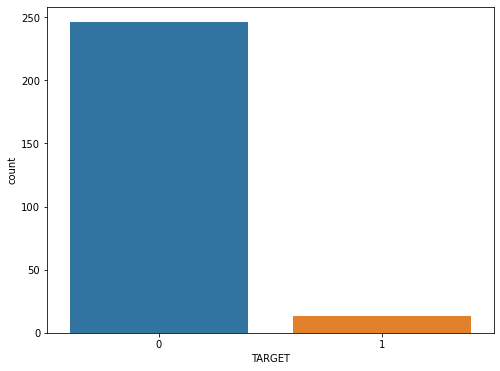

In [70]:
# Amount of TARGET's values for each category
plt.figure(figsize=(8,6))
plt.xticks(rotation=0, color = 'black' )
ax = sns.countplot(x='TARGET', data=df_goods_high,)

In [71]:
# So according to what we have seen from data , we can replace missing values of 'AMT_GOODS_PRICE' by using the mean of 'AMT_Ratio_GOODS' which is 0.893815
# Recount missing values for this variable 
df['AMT_GOODS_PRICE'].isna().sum()

278

In [72]:
### Procede to replacement :

In [73]:
df['AMT_GOODS_PRICE'] = df['AMT_GOODS_PRICE'].fillna(df['AMT_CREDIT']*0.893815)

In [74]:
# Recount missing values for this variable 
df['AMT_GOODS_PRICE'].isna().sum()

0

###  Treatment of variable 'NAME_TYPE_SUITE'
---------------------------------------
Definition : Who was accompanying client when he was applying for the loan


In [75]:
# Count of missing value
df['NAME_TYPE_SUITE'].isna().sum()

1292

In [76]:
# Check on unique parameters of the variable
df['NAME_TYPE_SUITE'].unique()

array(['Unaccompanied', 'Family', 'Spouse, partner', 'Children',
       'Other_A', nan, 'Other_B', 'Group of people'], dtype=object)

In [77]:
df['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      248523
Family              40148
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [78]:
df.loc[df['NAME_TYPE_SUITE'].isna()]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
64          100076       0         Cash loans           M            Y   
724         100837       0    Revolving loans           F            N   
1199        101414       0         Cash loans           M            Y   
1669        101954       0         Cash loans           F            Y   
1862        102183       0         Cash loans           F            Y   
...            ...     ...                ...         ...          ...   
306273      454852       0    Revolving loans           M            N   
306544      455158       0         Cash loans           F            N   
306615      455245       0         Cash loans           M            N   
306636      455270       0         Cash loans           M            Y   
306725      455367       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
64                   N             0          180000.0    315000.0   
724                  Y             2           45000.0    135000.0   
1199                 N             0          135000.0    533668.5   
1669                 N             2          153000.0   1162170.0   
1862                 N             0          121500.0    268659.0   
...                ...           ...               ...         ...   
306273               Y             2           67500.0    202500.0   
306544               N             0          180000.0    894825.0   
306615               N             0          180000.0    225000.0   
306636               N             2          189000.0    677664.0   
306725               Y             0          202500.0    755190.0   

        AMT_ANNUITY  ...  AMT_REQ_CREDIT_BUREAU_WEEK  \
64           9679.5  ...                         0.0   
724          6750.0  ...                         NaN   
1199        34636.5  ...                         0.0   
1669        30654.0  ...                         0.0   
1862        13774.5  ...                         0.0   
...             ...  ...                         ...   
306273      10125.0  ...                         0.0   
306544      23602.5  ...                         NaN   
306615       8469.0  ...                         0.0   
306636      21406.5  ...                         0.0   
306725      27985.5  ...                         0.0   

       AMT_REQ_CREDIT_BUREAU_MON AMT_REQ_CREDIT_BUREAU_QRT  \
64                           0.0                       0.0   
724                          NaN                       NaN   
1199                         4.0                       0.0   
1669                         0.0                       0.0   
1862                         0.0                       2.0   
...                          ...                       ...   
306273                       1.0                       0.0   
306544                       NaN                       NaN   
306615                       0.0                       1.0   
306636                       0.0                       0.0   
306725                       0.0                       1.0   

       AMT_REQ_CREDIT_BUREAU_YEAR AGE_CLIENT ratio_INC_ANN  ratio_CRE_ANN  \
64                            0.0         37          18.0           32.0   
724                           NaN         27           6.0           20.0   
1199                          0.0         59           3.0           15.0   
1669                          0.0         35           4.0           37.0   
1862                          0.0         35           8.0           19.0   
...                           ...        ...           ...            ...   
306273                        0.0         38           6.0           20.0   
306544                        NaN         53           7.0           37.0   
306615                        0.0         55          21.0           26.0   
306636                        0.0         41           8.0           31.0   
306725       

In [79]:
df_no_type_suite = df.loc[df['NAME_TYPE_SUITE'].isna()]

In [80]:
df_no_type_suite.head(10)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
64        100076       0         Cash loans           M            Y   
724       100837       0    Revolving loans           F            N   
1199      101414       0         Cash loans           M            Y   
1669      101954       0         Cash loans           F            Y   
1862      102183       0         Cash loans           F            Y   
2271      102661       0         Cash loans           F            N   
2625      103065       0         Cash loans           F            N   
2650      103093       0         Cash loans           M            Y   
3012      103519       0         Cash loans           F            Y   
3050      103560       0         Cash loans           F            N   

     FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
64                 N             0          180000.0    315000.0       9679.5   
724                Y             2           45000.0    135000.0       6750.0   
1199               N             0          135000.0    533668.5      34636.5   
1669               N             2          153000.0   1162170.0      30654.0   
1862               N             0          121500.0    268659.0      13774.5   
2271               N             0          225000.0   1890000.0      49986.0   
2625               Y             1          112500.0    593010.0      16434.0   
2650               N             0          360000.0    728460.0      37134.0   
3012               N             0          135000.0    675000.0      17806.5   
3050               N             2          225000.0   1506816.0      45814.5   

      ...  AMT_REQ_CREDIT_BUREAU_WEEK AMT_REQ_CREDIT_BUREAU_MON  \
64    ...                         0.0                       0.0   
724   ...                         NaN                       NaN   
1199  ...                         0.0                       4.0   
1669  ...                         0.0                       0.0   
1862  ...                         0.0                       0.0   
2271  ...                         0.0                       0.0   
2625  ...                         NaN                       NaN   
2650  ...                         0.0                       0.0   
3012  ...                         0.0                       0.0   
3050  ...                         0.0                       0.0   

     AMT_REQ_CREDIT_BUREAU_QRT AMT_REQ_CREDIT_BUREAU_YEAR AGE_CLIENT  \
64                         0.0                        0.0         37   
724                        NaN                        NaN         27   
1199                       0.0                        0.0         59   
1669                       0.0                        0.0         35   
1862                       2.0                        0.0         35   
2271                       0.0                        0.0         36   
2625                       NaN                        NaN         24   
2650                       0.0                        0.0         40   
3012                       1.0                        0.0         30   
3050                       0.0                        0.0         32   

     ratio_INC_ANN  ratio_CRE_ANN  ratio_CRE_INC  AMT_Diff_GOODS  \
64            18.0           32.0            1.0             0.0   
724            6.0           20.0            3.0             NaN   
1199           3.0           15.0            3.0         56668.5   
1669           4.0           37.0            7.0        329670.0   
1862           8.0           19.0            2.0         25659.0   
2271           4.0           37.0            8.0             0.0   
2625           6.0           36.0            5.0         98010.0   
2650           9.0           19.0            2.0         53460.0   
3012           7.0           37.0            5.0             0.0   
3050           4.0           32.0            6.0        156816.0   

      AMT_Ratio_GOODS  
64           1.00

In [81]:
# We make some combined plots to find out any specific correlation with variable 'NAME_TYPE_SUITE' 

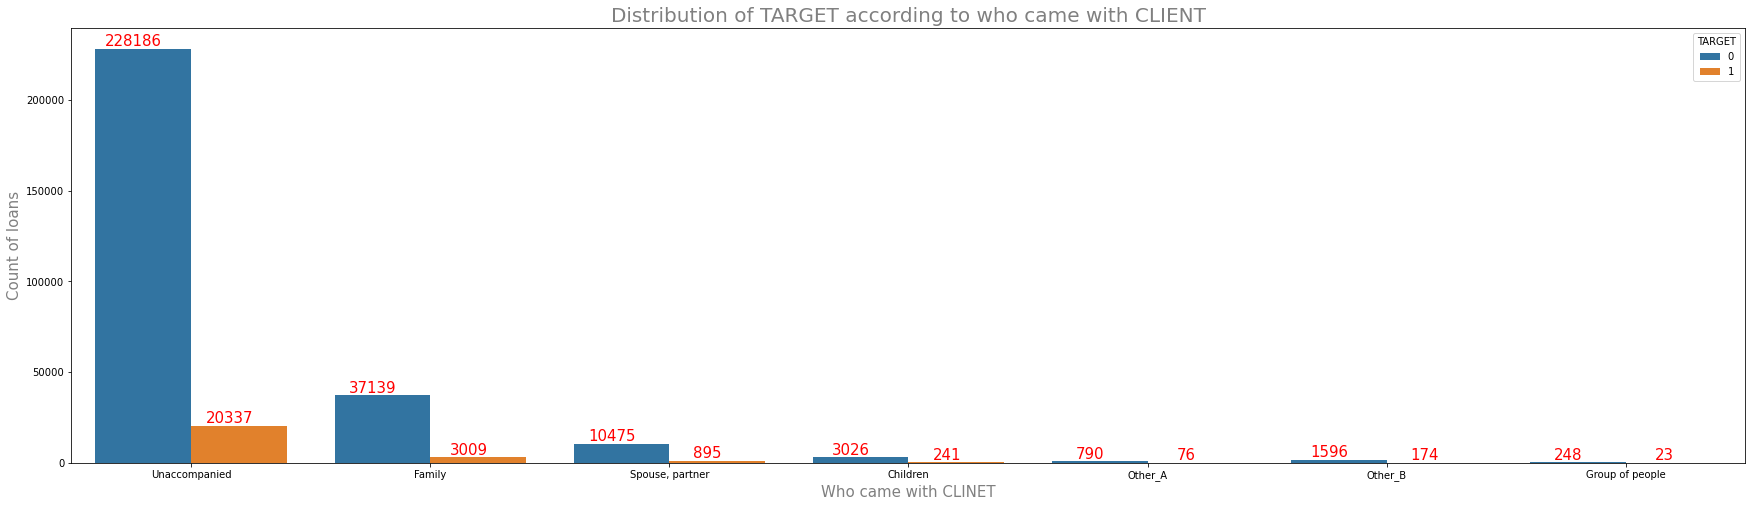

In [82]:
plt.figure(figsize=(30,8))
plt.xticks(rotation=0, color = 'black' )
ax = sns.countplot(x='NAME_TYPE_SUITE', data=df,hue='TARGET')

for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.16, p.get_height()), color='r',ha='center',va='bottom',size=15)
plt.title('Distribution of TARGET according to who came with CLIENT',size=20, color='grey' )
plt.xlabel('Who came with CLINET',size=15, color='grey')
plt.ylabel('Count of loans',size=15, color='grey')
plt.show()

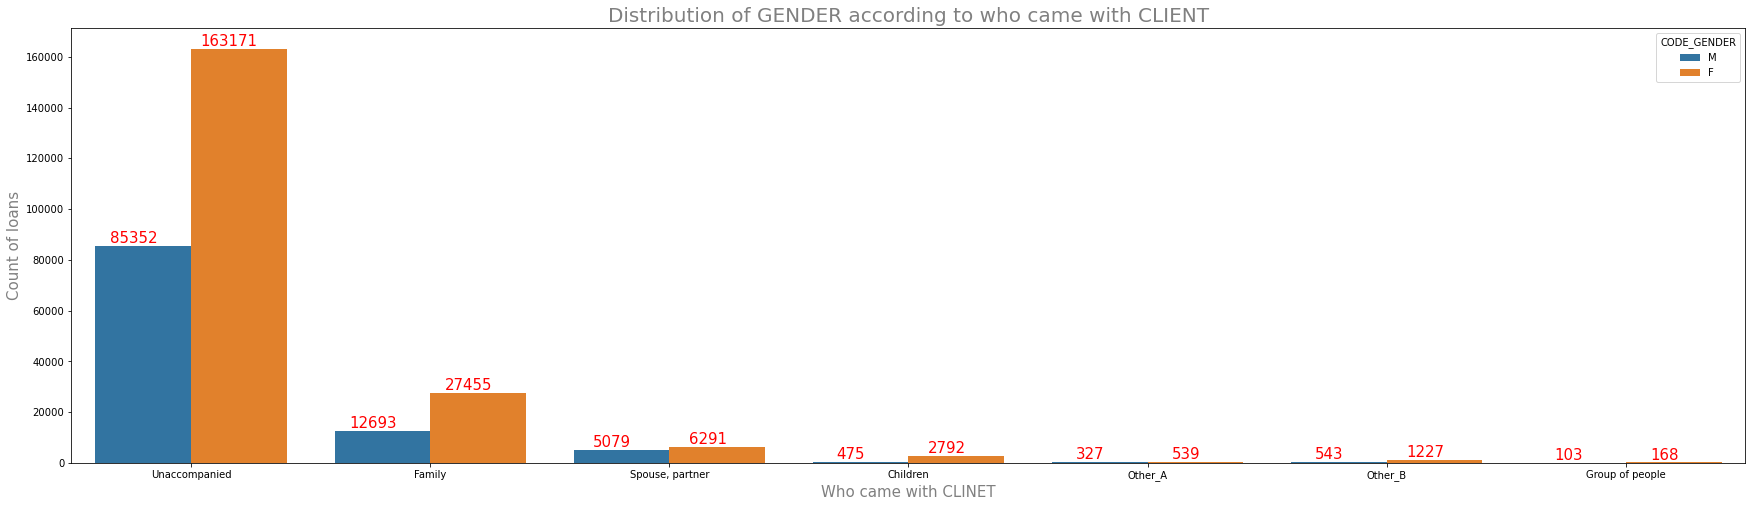

In [83]:
plt.figure(figsize=(30,8))
plt.xticks(rotation=0, color = 'black' )
ax = sns.countplot(x='NAME_TYPE_SUITE', data=df,hue='CODE_GENDER')

for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.16, p.get_height()), color='r',ha='center',va='bottom',size=15)
plt.title('Distribution of GENDER according to who came with CLIENT',size=20, color='grey' )
plt.xlabel('Who came with CLINET',size=15, color='grey')
plt.ylabel('Count of loans',size=15, color='grey')
plt.show()

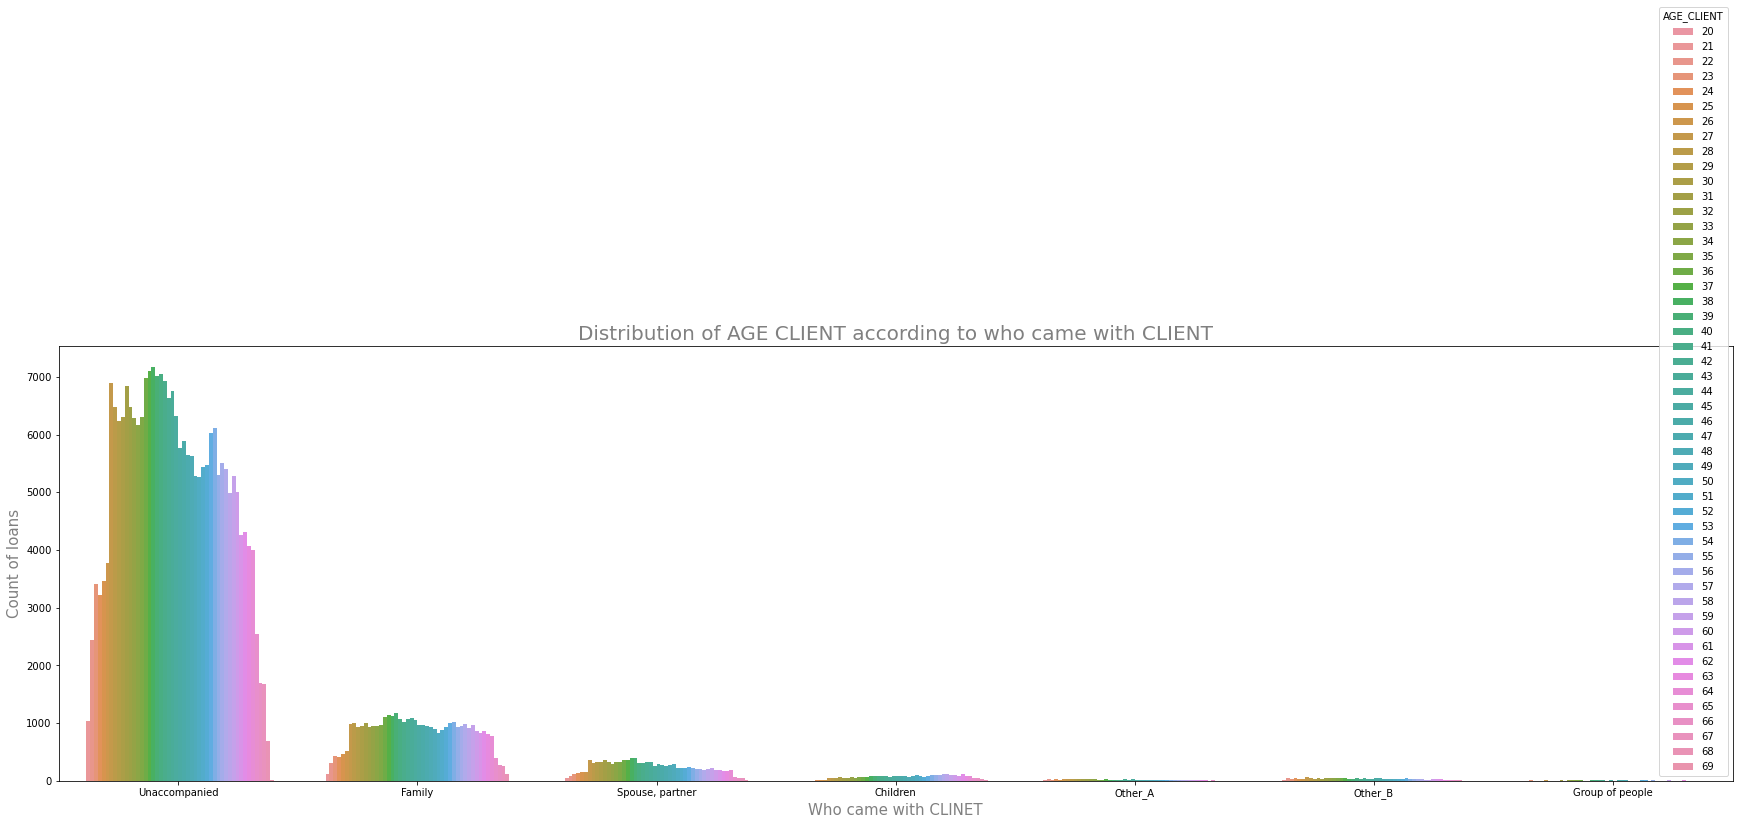

In [84]:
# Check for any pattern or relation between variables
plt.figure(figsize=(30,8))
plt.xticks(rotation=0, color = 'black' )
ax = sns.countplot(x='NAME_TYPE_SUITE', data=df,hue='AGE_CLIENT')

#for p in ax.patches:
#    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.16, p.get_height()), color='r',ha='center',va='bottom',size=6)
plt.title('Distribution of AGE CLIENT according to who came with CLIENT',size=20, color='grey' )
plt.xlabel('Who came with CLINET',size=15, color='grey')
plt.ylabel('Count of loans',size=15, color='grey')
plt.show()

In [85]:
df.groupby(['NAME_TYPE_SUITE','CODE_GENDER'])['CNT_CHILDREN','AMT_INCOME_TOTAL','AGE_CLIENT'].mean()

C:\Users\AMC\AppData\Local\Temp\ipykernel_13300\641982944.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['NAME_TYPE_SUITE','CODE_GENDER'])['CNT_CHILDREN','AMT_INCOME_TOTAL','AGE_CLIENT'].mean()


CNT_CHILDREN  AMT_INCOME_TOTAL  AGE_CLIENT
NAME_TYPE_SUITE CODE_GENDER                                            
Children        F                0.468481     136370.297692   48.525072
                M                0.669474     183238.105263   46.650526
Family          F                0.399854     153746.441249   45.342816
                M                0.488301     188107.243678   42.102104
Group of people F                0.357143     145821.428571   45.654762
                M                0.446602     193098.058252   40.067961
Other_A         F                0.417440     151210.769944   39.107607
                M                0.324159     173591.903670   37.948012
Other_B         F                0.444988     143647.389976   43.233904
                M                0.405157     174984.091160   37.272560
Spouse, partner F                0.576697     144720.598712   41.240184
                M                0.522347     170425.447726   43.728293
Unaccompanied   F                0.382231     156585.994805   44.715550
                M                0.457377     195779.912849   40.660512

In [86]:
# Distrubution of gender doesn't give lot information
df_no_type_suite['CODE_GENDER'].value_counts()

F    805
M    487
Name: CODE_GENDER, dtype: int64

In [87]:
df['AGE_CLIENT'].value_counts(bins=4)

(32.25, 44.5]     99620
(44.5, 56.75]     83533
(19.95, 32.25]    69092
(56.75, 69.0]     55262
Name: AGE_CLIENT, dtype: int64

In [88]:
df_no_type_suite['AGE_CLIENT'].value_counts(bins=4)

(32.75, 44.5]                  424
(20.951999999999998, 32.75]    398
(44.5, 56.25]                  270
(56.25, 68.0]                  200
Name: AGE_CLIENT, dtype: int64

In [89]:
df_no_type_suite['AMT_CREDIT'].value_counts(bins=4)

(109012.499, 984375.0]    1040
(984375.0, 1856250.0]      197
(1856250.0, 2728125.0]      53
(2728125.0, 3600000.0]       2
Name: AMT_CREDIT, dtype: int64

In [90]:
df['AMT_CREDIT'].value_counts(bins=4)

(40994.999, 1046250.0]    264422
(1046250.0, 2047500.0]     41640
(2047500.0, 3048750.0]      1414
(3048750.0, 4050000.0]        31
Name: AMT_CREDIT, dtype: int64

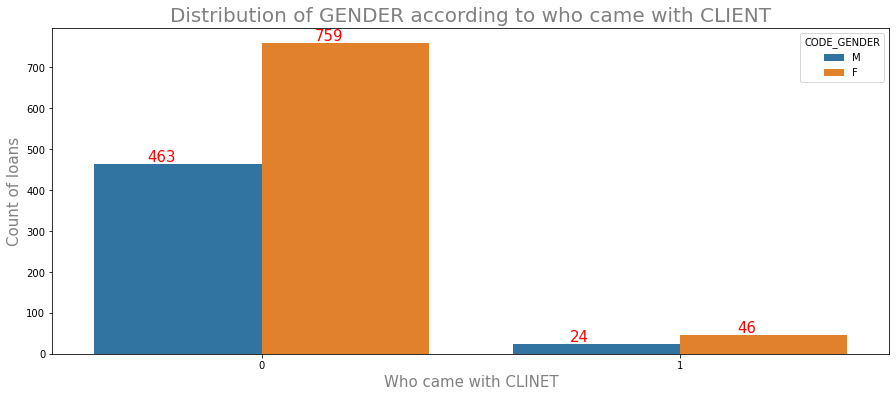

In [91]:
plt.figure(figsize=(15,6))
plt.xticks(rotation=0, color = 'black' )
ax = sns.countplot(x='TARGET', data=df_no_type_suite, hue='CODE_GENDER')

for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.16, p.get_height()), color='r',ha='center',va='bottom',size=15)
plt.title('Distribution of GENDER according to who came with CLIENT',size=20, color='grey' )
plt.xlabel('Who came with CLINET',size=15, color='grey')
plt.ylabel('Count of loans',size=15, color='grey')
plt.show()

In [92]:
# According to all results seen before , it will be suitable to replace missing value by 'Unaccompanied' which is also close to reality
# As no one came with client , there is a high propability to not fill the form dedicated for client

In [93]:
# Procede to replacement :
df['NAME_TYPE_SUITE'] = df['NAME_TYPE_SUITE'].fillna('Unaccompanied')

In [94]:
# Check for missing value
df['NAME_TYPE_SUITE'].isna().sum()

0

Treatment of variable 'OWN_CAR_AGE'

In [95]:
# check how many missing values
df['OWN_CAR_AGE'].isna().sum()

202927

In [96]:
# We check this variable against 'FLAG_OWN_CAR' to be able to put AGE=0 if the client doesn't own a car
df.loc[(df['OWN_CAR_AGE'].isna())&(df['FLAG_OWN_CAR']=='N')]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
5           100008       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0          202500.0    406597.5   
1                    N             0          270000.0   1293502.5   
3                    Y             0          135000.0    312682.5   
4                    Y             0          121500.0    513000.0   
5                    Y             0           99000.0    490495.5   
...                ...           ...               ...         ...   
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  ...  AMT_REQ_CREDIT_BUREAU_WEEK  \
0           24700.5  ...                         0.0   
1           35698.5  ...                         0.0   
3           29686.5  ...                         NaN   
4           21865.5  ...                         0.0   
5           27517.5  ...                         0.0   
...             ...  ...                         ...   
307506      27558.0  ...                         NaN   
307507      12001.5  ...                         NaN   
307508      29979.0  ...                         0.0   
307509      20205.0  ...                         0.0   
307510      49117.5  ...                         0.0   

       AMT_REQ_CREDIT_BUREAU_MON AMT_REQ_CREDIT_BUREAU_QRT  \
0                            0.0                       0.0   
1                            0.0                       0.0   
3                            NaN                       NaN   
4                            0.0                       0.0   
5                            0.0                       1.0   
...                          ...                       ...   
307506                       NaN                       NaN   
307507                       NaN                       NaN   
307508                       1.0                       0.0   
307509                       0.0                       0.0   
307510                       2.0                       0.0   

       AMT_REQ_CREDIT_BUREAU_YEAR AGE_CLIENT ratio_INC_ANN  ratio_CRE_ANN  \
0                             1.0         25           8.0           16.0   
1                             0.0         45           7.0           36.0   
3                             NaN         52           4.0           10.0   
4                             0.0         54           5.0           23.0   
5                             1.0         46           3.0           17.0   
...                           ...        ...           ...            ...   
307506                        NaN         25           5.0            9.0   
307507                        NaN         56           5.0           22.0   
307508                        1.0         41           5.0           22.0   
307509                        0.0         32           8.0           18.0   
307510       

In [97]:
# We can replace all missing value within last filter (where 'FLAG_OWN_CAR') by the value '-1'
# the use of '-1' is useful to avoid quality confusion of car age in case we use '0' (as if the car was newer than all others)
# Choice to be discussed with 'Mentor'

In [98]:
df['OWN_CAR_AGE'].unique()

array([nan, 26., 17.,  8., 23.,  7., 14.,  1.,  3., 13., 10.,  2., 21.,
       20., 22., 65.,  5., 11.,  9.,  4., 15., 12., 25.,  6., 64.,  0.,
       27., 19., 28., 18., 16., 30., 36., 24., 39., 29., 40., 41., 31.,
       42., 37., 35., 34., 33., 54., 38., 32., 43., 55., 49., 44., 63.,
       46., 45., 48., 56., 51., 57., 69., 50., 47., 91., 52.])

In [99]:
# Procede to replacement :
df['OWN_CAR_AGE'] = df['OWN_CAR_AGE'].fillna('-1')

In [100]:
# 5 rows still need to be corrected by putting an estimated value
# Let's put the mean to make thing easier

In [101]:
df.loc[(df['OWN_CAR_AGE']== '-1') &(df['FLAG_OWN_CAR']=='Y')]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
30897       135867       0         Cash loans           M            Y   
181231      310040       0         Cash loans           F            Y   
217549      352070       0         Cash loans           M            Y   
229867      366246       0         Cash loans           F            Y   
236868      374361       0         Cash loans           F            Y   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
30897                N             1          495000.0   1006920.0   
181231               N             0          112500.0    301464.0   
217549               N             0          225000.0    900000.0   
229867               Y             1          225000.0    518562.0   
236868               Y             0          225000.0    233833.5   

        AMT_ANNUITY  ...  AMT_REQ_CREDIT_BUREAU_WEEK  \
30897       45630.0  ...                         0.0   
181231      22068.0  ...                         0.0   
217549      26446.5  ...                         0.0   
229867      25078.5  ...                         0.0   
236868      26577.0  ...                         0.0   

       AMT_REQ_CREDIT_BUREAU_MON AMT_REQ_CREDIT_BUREAU_QRT  \
30897                        0.0                       0.0   
181231                       1.0                       0.0   
217549                       0.0                       1.0   
229867                       0.0                       0.0   
236868                       1.0                       0.0   

       AMT_REQ_CREDIT_BUREAU_YEAR AGE_CLIENT ratio_INC_ANN  ratio_CRE_ANN  \
30897                         0.0         43          10.0           22.0   
181231                        5.0         51           5.0           13.0   
217549                        5.0         36           8.0           34.0   
229867                        3.0         35           8.0           20.0   
236868                        1.0         28           8.0            8.0   

        ratio_CRE_INC  AMT_Diff_GOODS  AMT_Ratio_GOODS  
30897             2.0        106920.0         0.893815  
181231            2.0         62964.0         0.791139  
217549            4.0             0.0         1.000000  
229867            2.0         55062.0         0.893818  
236868            1.0         22333.5         0.904490  

[5 rows x 81 columns]

In [102]:
car = df.loc[(df.OWN_CAR_AGE == '-1') &(df.FLAG_OWN_CAR =='Y')]

In [103]:
# procede to replacement  : 
df['OWN_CAR_AGE'] = np.where(((df['OWN_CAR_AGE']== '-1') &(df['FLAG_OWN_CAR']=='Y')),'4',df.OWN_CAR_AGE)

In [104]:
# Check if 5 rows have been corrected 
df.loc[(df['OWN_CAR_AGE']== '-1') &(df['FLAG_OWN_CAR']=='Y')]

Empty DataFrame
Columns: [SK_ID_CURR, TARGET, NAME_CONTRACT_TYPE, CODE_GENDER, FLAG_OWN_CAR, FLAG_OWN_REALTY, CNT_CHILDREN, AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE, NAME_TYPE_SUITE, NAME_INCOME_TYPE, NAME_EDUCATION_TYPE, NAME_FAMILY_STATUS, NAME_HOUSING_TYPE, REGION_POPULATION_RELATIVE, DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH, OWN_CAR_AGE, FLAG_MOBIL, FLAG_EMP_PHONE, FLAG_WORK_PHONE, FLAG_CONT_MOBILE, FLAG_PHONE, FLAG_EMAIL, OCCUPATION_TYPE, CNT_FAM_MEMBERS, REGION_RATING_CLIENT, REGION_RATING_CLIENT_W_CITY, WEEKDAY_APPR_PROCESS_START, HOUR_APPR_PROCESS_START, REG_REGION_NOT_LIVE_REGION, REG_REGION_NOT_WORK_REGION, LIVE_REGION_NOT_WORK_REGION, REG_CITY_NOT_LIVE_CITY, REG_CITY_NOT_WORK_CITY, LIVE_CITY_NOT_WORK_CITY, ORGANIZATION_TYPE, EXT_SOURCE_1, EXT_SOURCE_2, EXT_SOURCE_3, OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE, DAYS_LAST_PHONE_CHANGE, FLAG_DOCUMENT_2, FLAG_DOCUMENT_3, FLAG_DOCUMENT_4, FLAG_DOCUMENT_5, FLAG_DOCUMENT_6, FLAG_DOCUMENT_7, FLAG_DOCUMENT_8, FLAG_DOCUMENT_9, FLAG_DOCUMENT_10, FLAG_DOCUMENT_11, FLAG_DOCUMENT_12, FLAG_DOCUMENT_13, FLAG_DOCUMENT_14, FLAG_DOCUMENT_15, FLAG_DOCUMENT_16, FLAG_DOCUMENT_17, FLAG_DOCUMENT_18, FLAG_DOCUMENT_19, FLAG_DOCUMENT_20, FLAG_DOCUMENT_21, AMT_REQ_CREDIT_BUREAU_HOUR, AMT_REQ_CREDIT_BUREAU_DAY, AMT_REQ_CREDIT_BUREAU_WEEK, AMT_REQ_CREDIT_BUREAU_MON, AMT_REQ_CREDIT_BUREAU_QRT, AMT_REQ_CREDIT_BUREAU_YEAR, AGE_CLIENT, ratio_INC_ANN, ratio_CRE_ANN, ratio_CRE_INC, AMT_Diff_GOODS, AMT_Ratio_GOODS]
Index: []

[0 rows x 81 columns]

In [105]:
# Check miising value for all column
df['OWN_CAR_AGE'].isna().sum()

0

Treatment of 'OCCUPATION_TYPE' variable 
Definition : What kind of occupation does the client have
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
We notice that we have 2 other variable which give almost same information type : 'ORGANIZATION_TYPE'

In [106]:
df['OCCUPATION_TYPE'].unique()

array(['Laborers', 'Core staff', 'Accountants', 'Managers', nan,
       'Drivers', 'Sales staff', 'Cleaning staff', 'Cooking staff',
       'Private service staff', 'Medicine staff', 'Security staff',
       'High skill tech staff', 'Waiters/barmen staff',
       'Low-skill Laborers', 'Realty agents', 'Secretaries', 'IT staff',
       'HR staff'], dtype=object)

In [107]:
df['ORGANIZATION_TYPE'].unique()

array(['Business Entity Type 3', 'School', 'Government', 'Religion',
       'Other', 'XNA', 'Electricity', 'Medicine',
       'Business Entity Type 2', 'Self-employed', 'Transport: type 2',
       'Construction', 'Housing', 'Kindergarten', 'Trade: type 7',
       'Industry: type 11', 'Military', 'Services', 'Security Ministries',
       'Transport: type 4', 'Industry: type 1', 'Emergency', 'Security',
       'Trade: type 2', 'University', 'Transport: type 3', 'Police',
       'Business Entity Type 1', 'Postal', 'Industry: type 4',
       'Agriculture', 'Restaurant', 'Culture', 'Hotel',
       'Industry: type 7', 'Trade: type 3', 'Industry: type 3', 'Bank',
       'Industry: type 9', 'Insurance', 'Trade: type 6',
       'Industry: type 2', 'Transport: type 1', 'Industry: type 12',
       'Mobile', 'Trade: type 1', 'Industry: type 5', 'Industry: type 10',
       'Legal Services', 'Advertising', 'Trade: type 5', 'Cleaning',
       'Industry: type 13', 'Trade: type 4', 'Telecom',
       'I

In [108]:
# According to amount of missing values in 'OCCUPATION_TYPE' and as we can't impute them randomly even if we try to build a dictionnary with 'ORGANIZATION_TYPE'
# it will be beneficial in our situation to delete this column as we can have a similar data from another column

In [109]:
df.drop('OCCUPATION_TYPE', axis=1, inplace=True)

Treatment of 'CNT_FAM_MEMBERS' variable 
Definition : How many family members does client have
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [110]:
# Check about count of missing values
df['CNT_FAM_MEMBERS'].isna().sum()

2

In [111]:
# Inspect other information within rows containing missing values
# We consider data on variable 'NAME_FAMILY_STATUS' and 'NAME_TYPE_SUITE' and 'CNT_CHILDREN'
df.loc[df['CNT_FAM_MEMBERS'].isna()]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
41982       148605       0    Revolving loans           M            N   
187348      317181       0    Revolving loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
41982                Y             0          450000.0    675000.0   
187348               Y             0          202500.0    585000.0   

        AMT_ANNUITY  ...  AMT_REQ_CREDIT_BUREAU_WEEK  \
41982       33750.0  ...                         NaN   
187348      29250.0  ...                         0.0   

       AMT_REQ_CREDIT_BUREAU_MON AMT_REQ_CREDIT_BUREAU_QRT  \
41982                        NaN                       NaN   
187348                       0.0                       0.0   

       AMT_REQ_CREDIT_BUREAU_YEAR AGE_CLIENT ratio_INC_ANN  ratio_CRE_ANN  \
41982                         NaN         33          13.0           20.0   
187348                        1.0         35           6.0           20.0   

        ratio_CRE_INC  AMT_Diff_GOODS  AMT_Ratio_GOODS  
41982             1.0             NaN              NaN  
187348            2.0             NaN              NaN  

[2 rows x 80 columns]

In [112]:
df_CNT_MEM = df.loc[df['CNT_FAM_MEMBERS'].isna()]

In [113]:
df_CNT_MEM[['CNT_FAM_MEMBERS','CODE_GENDER','CNT_CHILDREN','NAME_FAMILY_STATUS' ,'NAME_TYPE_SUITE' , 'CNT_CHILDREN']]

CNT_FAM_MEMBERS CODE_GENDER  CNT_CHILDREN NAME_FAMILY_STATUS  \
41982               NaN           M             0            Unknown   
187348              NaN           F             0            Unknown   

       NAME_TYPE_SUITE  CNT_CHILDREN  
41982    Unaccompanied             0  
187348   Unaccompanied             0

In [114]:
# We deduce from data above that we have to replace missing values by '1'

In [115]:
df['CNT_FAM_MEMBERS'] = df['CNT_FAM_MEMBERS'].fillna(1)

In [116]:
# Check if imputation is done
df['CNT_FAM_MEMBERS'].isna().sum()

0

Treatment of 'EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3' variables 
Definition : Normalized score from external data source
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [117]:
# Check about count of missing values

In [118]:
df['EXT_SOURCE_1'].isna().sum()

173376

In [119]:
df['EXT_SOURCE_2'].isna().sum()

660

In [120]:
df['EXT_SOURCE_3'].isna().sum()

60965

<AxesSubplot:xlabel='AGE_CLIENT', ylabel='EXT_SOURCE_1'>

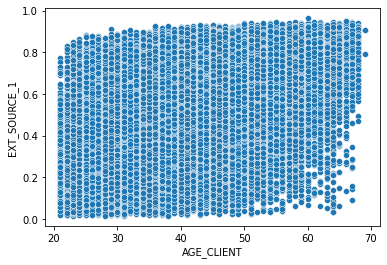

In [121]:
sns.scatterplot(x=df['AGE_CLIENT'],y=df['EXT_SOURCE_1'])

<AxesSubplot:xlabel='AGE_CLIENT', ylabel='EXT_SOURCE_2'>

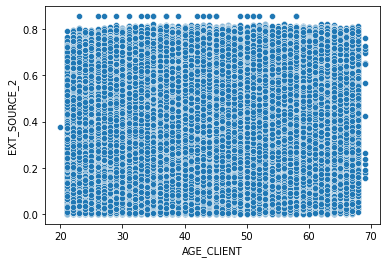

In [122]:
sns.scatterplot(x=df['AGE_CLIENT'],y=df['EXT_SOURCE_2'])

<AxesSubplot:xlabel='AGE_CLIENT', ylabel='EXT_SOURCE_3'>

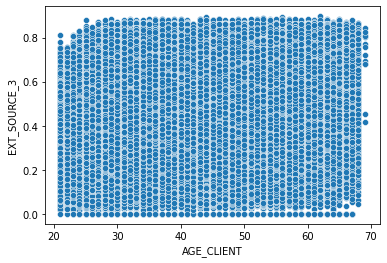

In [123]:
sns.scatterplot(x=df['AGE_CLIENT'],y=df['EXT_SOURCE_3'])

<AxesSubplot:xlabel='AMT_INCOME_TOTAL', ylabel='EXT_SOURCE_1'>

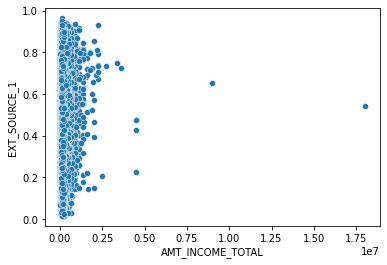

In [124]:
sns.scatterplot(x=df['AMT_INCOME_TOTAL'],y=df['EXT_SOURCE_1'])

<AxesSubplot:xlabel='AMT_INCOME_TOTAL', ylabel='EXT_SOURCE_2'>

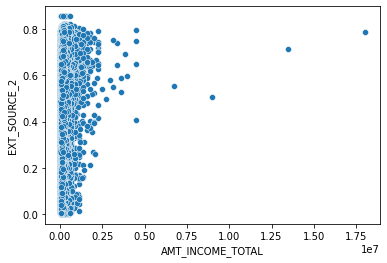

In [125]:
sns.scatterplot(x=df['AMT_INCOME_TOTAL'],y=df['EXT_SOURCE_2'])

<AxesSubplot:xlabel='AMT_INCOME_TOTAL', ylabel='EXT_SOURCE_3'>

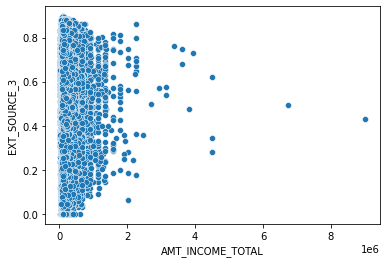

In [126]:
sns.scatterplot(x=df['AMT_INCOME_TOTAL'],y=df['EXT_SOURCE_3'])

<AxesSubplot:xlabel='AMT_CREDIT', ylabel='EXT_SOURCE_1'>

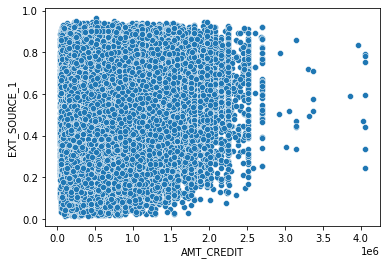

In [127]:
sns.scatterplot(x=df['AMT_CREDIT'],y=df['EXT_SOURCE_1'])

<AxesSubplot:xlabel='AMT_CREDIT', ylabel='EXT_SOURCE_2'>

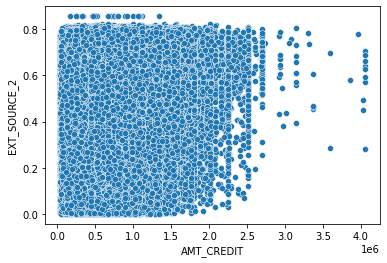

In [128]:
sns.scatterplot(x=df['AMT_CREDIT'],y=df['EXT_SOURCE_2'])

<AxesSubplot:xlabel='AMT_CREDIT', ylabel='EXT_SOURCE_3'>

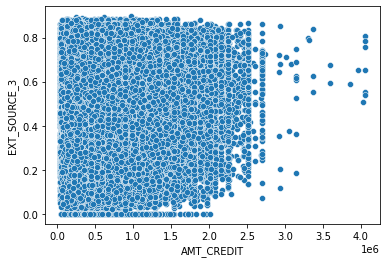

In [129]:
sns.scatterplot(x=df['AMT_CREDIT'],y=df['EXT_SOURCE_3'])

In [130]:
# Inspection of statistical values for 3 variables before impuation
df[['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3']].describe()

EXT_SOURCE_1  EXT_SOURCE_2   EXT_SOURCE_3
count  134131.000000  3.068470e+05  246542.000000
mean        0.502129  5.143918e-01       0.510856
std         0.211063  1.910603e-01       0.194843
min         0.014568  8.173617e-08       0.000527
25%         0.334007  3.924574e-01       0.370650
50%         0.505998  5.659614e-01       0.535276
75%         0.675057  6.636171e-01       0.669057
max         0.962693  8.549997e-01       0.896010

In [131]:
# No evident correlatio betwenn theses variables
# Random imputation within an interval (0.05 - 0.9) will be applied to all 3 variables

In [132]:
# Procede to imputation : 
df['EXT_SOURCE_1'] = df['EXT_SOURCE_1'].fillna(value=random.uniform(0.05,0.9))
df['EXT_SOURCE_2'] = df['EXT_SOURCE_2'].fillna(value=random.uniform(0.05,0.9))
df['EXT_SOURCE_3'] = df['EXT_SOURCE_3'].fillna(value=random.uniform(0.05,0.9))

In [133]:
# We don't notice major modification among data according to describe results
df[['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3']].describe()

EXT_SOURCE_1  EXT_SOURCE_2   EXT_SOURCE_3
count  307507.000000  3.075070e+05  307507.000000
mean        0.645419  5.138762e-01       0.575068
std         0.187924  1.911787e-01       0.217052
min         0.014568  8.173617e-08       0.000527
25%         0.555111  3.907824e-01       0.417100
50%         0.756275  5.654672e-01       0.604113
75%         0.756275  6.634218e-01       0.773896
max         0.962693  8.549997e-01       0.896010

In [134]:
# Check about missing values after imputation
df['EXT_SOURCE_1'].isna().sum() +  df['EXT_SOURCE_2'].isna().sum() + df['EXT_SOURCE_3'].isna().sum()

0

Treatment of variable 'DAYS_LAST_PHONE_CHANGE'
-------------------------------------------------------------------------------
Definition : How many days before application did client change phone


In [135]:
# Check how many missing value
df['DAYS_LAST_PHONE_CHANGE'].isna().sum()

1

In [136]:
# check the row according this missing value
pd.set_option('display.max_columns', None)
df.loc[df['DAYS_LAST_PHONE_CHANGE'].isna()]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
15709      118330       0         Cash loans           M            Y   

      FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
15709               Y             0          126000.0    278613.0   

       AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
15709      25911.0         252000.0   Unaccompanied          Working   

      NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
15709   Incomplete higher            Married  House / apartment   

       REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
15709                    0.010643       -8574           -293   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH OWN_CAR_AGE  FLAG_MOBIL  \
15709            -4790.0            -1075        21.0           0   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
15709               1                0                 1           0   

       FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
15709           0              2.0                     2   

       REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
15709                            2                     FRIDAY   

       HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
15709                       13                           0   

       REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
15709                           0                            0   

       REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  \
15709                       0                       0   

       LIVE_CITY_NOT_WORK_CITY ORGANIZATION_TYPE  EXT_SOURCE_1  EXT_SOURCE_2  \
15709                        0     Trade: type 3      0.756275       0.27417   

       EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
15709      0.834741                       0.0                       0.0   

       OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
15709                       0.0                       0.0   

       DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  \
15709                     NaN                0                0   

       FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  \
15709                0                0                0                0   

       FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  \
15709                1                0                 0                 0   

       FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  \
15709                 0                 0                 0                 0   

       FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  \
15709                 0                 0                 1                 0   

       FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  \
15709                 0                 0                         NaN   

       AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
15709                        NaN                         NaN   

       AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
15709                        NaN                        NaN   

       AMT_REQ_CREDIT_BUREAU_YEAR  AGE_CLIENT  ratio_INC_ANN  ratio_CRE_ANN  \
15709                         NaN          23            4.0           10.0   

       ratio_CRE_INC  AMT_Diff_GOODS  AMT_Ratio_GOODS  
15709            2.0         26613.0          0.90448

In [137]:
# The client put in this row has a mobile phone and was reacheable
# we replace this missing value by '0' as if the client dind't change his phone

In [138]:
# Procede to the imputation :
df['DAYS_LAST_PHONE_CHANGE'] = df['DAYS_LAST_PHONE_CHANGE'].fillna(0)

In [139]:
# Re-Check how many missing value
df['DAYS_LAST_PHONE_CHANGE'].isna().sum()

0

Treatment of variables  'OBS_30_CNT_SOCIAL_CIRCLE' & 'DEF_30_CNT_SOCIAL_CIRCLE' : 
-------------------------------------------------------------------------------
Definition : - OBS_30_CNT_SOCIAL_CIRCLE :  How many observation of client's social surroundings with observable 30 DPD (days past due) default
             - DEF_30_CNT_SOCIAL_CIRCLE :  How many observation of client's social surroundings defaulted on 30 DPD (days past due) 

some good information are given in this url : 
https://www.fullertonindia.com/days-past-due-in-cibil-report.aspx

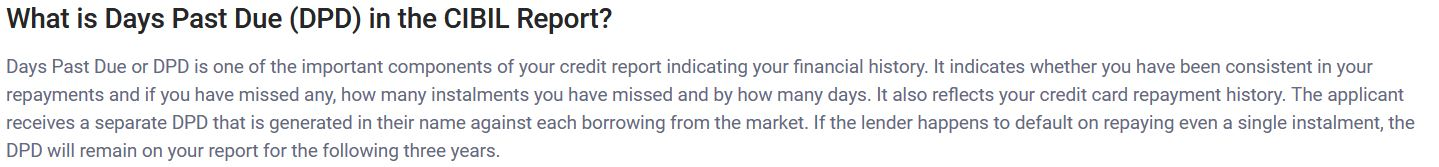

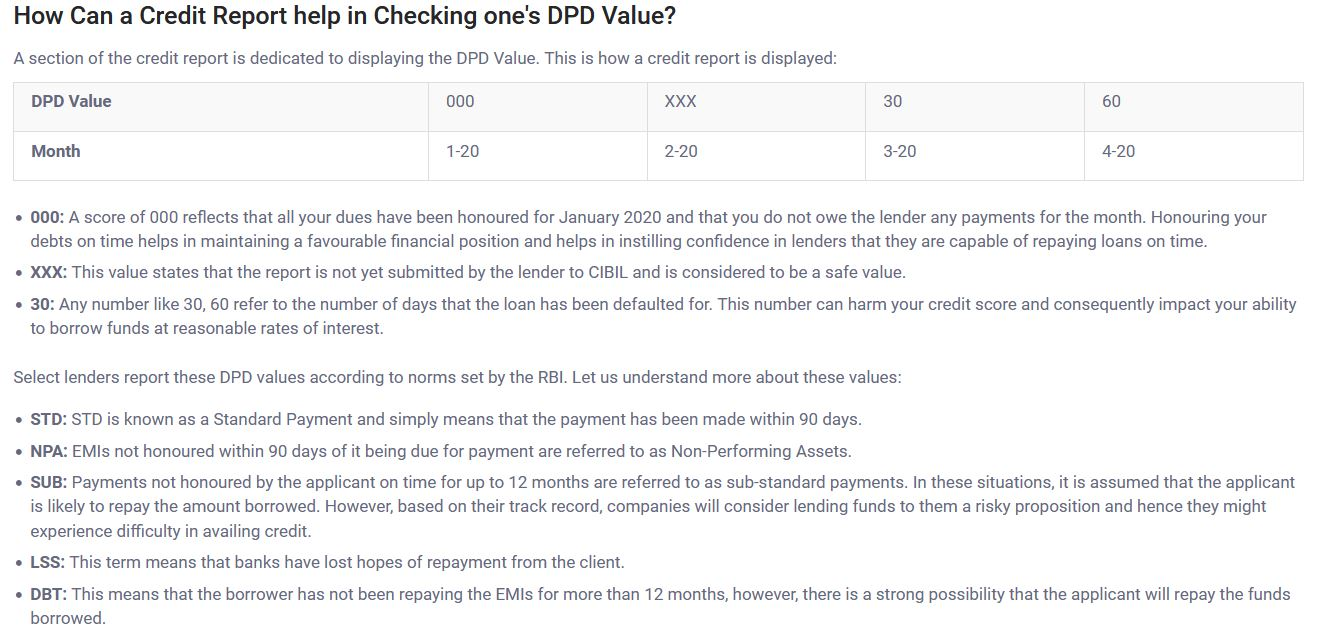

In [140]:
# According to the definition above, the max value allowed for our variables can't exceed 30

In [141]:
df[['OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE']].describe()

OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE
count             306486.000000             306486.000000
mean                   1.422209                  0.143406
std                    2.400931                  0.446644
min                    0.000000                  0.000000
25%                    0.000000                  0.000000
50%                    0.000000                  0.000000
75%                    2.000000                  0.000000
max                  348.000000                 34.000000

In [142]:
df['OBS_30_CNT_SOCIAL_CIRCLE'].isna().sum()

1021

In [143]:
df['DEF_30_CNT_SOCIAL_CIRCLE'].isna().sum()

1021

In [144]:
# The missing values are located in the same rows for both columns
df.loc[(df['OBS_30_CNT_SOCIAL_CIRCLE'].isna())&(df['DEF_30_CNT_SOCIAL_CIRCLE'].isna())].shape

(1021, 80)

In [145]:
# Find out where are located those missing value according to 'TARGET' variable
# We can notice that most missing values are in df_good_loaners, this is why we can replace all missing values by'0'cto make things easier

In [146]:
df_good_loaners = df.loc[df['TARGET']==0]

In [147]:
df_bad_loaners = df.loc[df['TARGET']==1]

In [148]:
df_bad_loaners[df_bad_loaners['DEF_30_CNT_SOCIAL_CIRCLE'].isna()].shape

(36, 80)

In [149]:
df_good_loaners[df_good_loaners['DEF_30_CNT_SOCIAL_CIRCLE'].isna()].shape

(985, 80)

In [150]:
# Procede to replacement in both columns : 
df['OBS_30_CNT_SOCIAL_CIRCLE'] = df['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(0)
df['DEF_30_CNT_SOCIAL_CIRCLE'] = df['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(0)

In [151]:
# Re check for missing values 
df['OBS_30_CNT_SOCIAL_CIRCLE'].isna().sum() + df['DEF_30_CNT_SOCIAL_CIRCLE'].isna().sum()

0

Treatment of outiliers within variables :

In [152]:
# Outliers values are all greater than 30
df.loc[df['OBS_30_CNT_SOCIAL_CIRCLE']>31]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
77497       189856       0         Cash loans           M            Y   
148403      272071       0    Revolving loans           M            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
77497                Y             1          157500.0    296280.0   
148403               Y             0          202500.0    180000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
77497       23539.5         225000.0          Family          Working   
148403       9000.0         180000.0          Family    State servant   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
77497   Secondary / secondary special               Married   
148403               Higher education  Single / not married   

        NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
77497   House / apartment                    0.010147      -14767   
148403  House / apartment                    0.020246      -10111   

        DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH OWN_CAR_AGE  \
77497           -2767           -13306.0            -4720        11.0   
148403          -1917            -2306.0            -2306          -1   

        FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  \
77497            1               1                0                 1   
148403           1               1                0                 1   

        FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
77497            0           1              3.0                     2   
148403           0           0              1.0                     3   

        REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
77497                             2                     MONDAY   
148403                            3                   THURSDAY   

        HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
77497                        17                           0   
148403                        9                           0   

        REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
77497                            0                            0   
148403                           0                            0   

        REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  \
77497                        0                       0   
148403                       0                       1   

        LIVE_CITY_NOT_WORK_CITY ORGANIZATION_TYPE  EXT_SOURCE_1  EXT_SOURCE_2  \
77497                         0  Industry: type 4      0.459887      0.398805   
148403                        1            Police      0.360649      0.304506   

        EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
77497       0.750375                      47.0                       0.0   
148403      0.357293                     348.0                      34.0   

        OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
77497                       47.0                       0.0   
148403                     344.0                      24.0   

        DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  \
77497                      0.0                0                1   
148403                  -667.0                0                0   

        FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  \
77497                 0                0                0                0   
148403                0                0                0                0   

        FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  \
77497                 0                0                 0                 0   
148403                0                0                 0                 0   

        FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  \
77497                  0                 0                 0   
148403                 0                 0                 0 

In [153]:
# Outliers values greater than 30
df.loc[df['DEF_30_CNT_SOCIAL_CIRCLE']>31]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
148403      272071       0    Revolving loans           M            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
148403               Y             0          202500.0    180000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
148403       9000.0         180000.0          Family    State servant   

       NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
148403    Higher education  Single / not married  House / apartment   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
148403                    0.020246      -10111          -1917   

        DAYS_REGISTRATION  DAYS_ID_PUBLISH OWN_CAR_AGE  FLAG_MOBIL  \
148403            -2306.0            -2306          -1           1   

        FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
148403               1                0                 1           0   

        FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
148403           0              1.0                     3   

        REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
148403                            3                   THURSDAY   

        HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
148403                        9                           0   

        REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
148403                           0                            0   

        REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  \
148403                       0                       1   

        LIVE_CITY_NOT_WORK_CITY ORGANIZATION_TYPE  EXT_SOURCE_1  EXT_SOURCE_2  \
148403                        1            Police      0.360649      0.304506   

        EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
148403      0.357293                     348.0                      34.0   

        OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
148403                     344.0                      24.0   

        DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  \
148403                  -667.0                0                0   

        FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  \
148403                0                0                0                0   

        FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  \
148403                0                0                 0                 0   

        FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  \
148403                 0                 0                 0   

        FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  \
148403                 0                 0                 0   

        FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  \
148403                 0                 0                 0   

        FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  \
148403                 0                         0.0   

        AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
148403                        0.0                         1.0   

        AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
148403                        1.0                        0.0   

        AMT_REQ_CREDIT_BUREAU_YEAR  AGE_CLIENT  ratio_INC_ANN  ratio_CRE_ANN  \
148403                         3.0          27           22.0           20.0   

        ratio_CRE_INC  AMT_Diff_GOODS  AMT_Ratio_GOODS  
148403            0.0             0.0              1.0

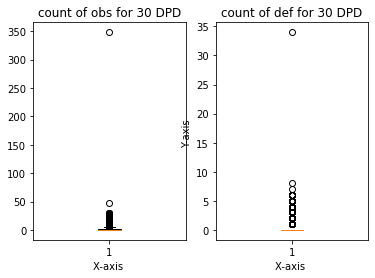

In [154]:
plt.subplot(1, 2, 1) # row 1, col 2 index 1
plt.boxplot(df['OBS_30_CNT_SOCIAL_CIRCLE'])
plt.title("count of obs for 30 DPD")
plt.xlabel('X-axis ')
#plt.ylabel('Y-axis ')

plt.subplot(1, 2, 2) # index 2
plt.boxplot(df['DEF_30_CNT_SOCIAL_CIRCLE'])
plt.title("count of def for 30 DPD")
plt.xlabel('X-axis ')
plt.ylabel('Y-axis ')
plt.show()

In [155]:
# We align outliers to a max value of 30 according to the variable's scale and we maitain information about the loaner (indication of delayed payement)
# procede to replacement  : 
df['OBS_30_CNT_SOCIAL_CIRCLE'] = np.where((df['OBS_30_CNT_SOCIAL_CIRCLE']> 31),31,df.OBS_30_CNT_SOCIAL_CIRCLE)

In [156]:
df['DEF_30_CNT_SOCIAL_CIRCLE'] = np.where((df['DEF_30_CNT_SOCIAL_CIRCLE']> 31),31,df.DEF_30_CNT_SOCIAL_CIRCLE)

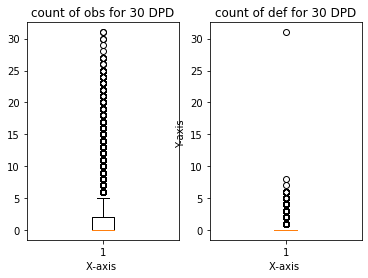

In [157]:
plt.subplot(1, 2, 1) # row 1, col 2 index 1
plt.boxplot(df['OBS_30_CNT_SOCIAL_CIRCLE'])
plt.title("count of obs for 30 DPD")
plt.xlabel('X-axis ')
#plt.ylabel('Y-axis ')

plt.subplot(1, 2, 2) # index 2
plt.boxplot(df['DEF_30_CNT_SOCIAL_CIRCLE'])
plt.title("count of def for 30 DPD")
plt.xlabel('X-axis ')
plt.ylabel('Y-axis ')
plt.show()

# Treatment of variables  'OBS_60_CNT_SOCIAL_CIRCLE' & 'DEF_60_CNT_SOCIAL_CIRCLE' : 

In [158]:
df[['OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE']].describe()

OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE
count             306486.000000             306486.000000
mean                   1.405255                  0.100034
std                    2.379744                  0.362221
min                    0.000000                  0.000000
25%                    0.000000                  0.000000
50%                    0.000000                  0.000000
75%                    2.000000                  0.000000
max                  344.000000                 24.000000

In [159]:
df['DEF_60_CNT_SOCIAL_CIRCLE'].value_counts()

0.0     280719
1.0      21840
2.0       3170
3.0        598
4.0        134
5.0         20
6.0          3
7.0          1
24.0         1
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: int64

In [160]:
df['OBS_60_CNT_SOCIAL_CIRCLE'].value_counts()

0.0      164664
1.0       48870
2.0       29766
3.0       20215
4.0       13946
5.0        9463
6.0        6349
7.0        4343
8.0        2886
9.0        1959
10.0       1334
11.0        837
12.0        620
13.0        401
14.0        238
15.0        166
16.0        137
17.0         73
18.0         49
19.0         44
20.0         30
21.0         28
22.0         20
23.0         13
24.0         12
25.0         11
27.0          5
29.0          2
26.0          1
28.0          1
344.0         1
47.0          1
30.0          1
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: int64

C:\Users\AMC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\AMC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\AMC\AppData\Local\Temp\ipykernel_13300\167749151.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


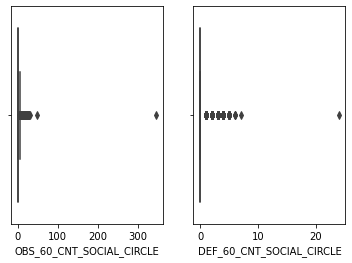

In [161]:
fig, ax =plt.subplots(1,2)
sns.boxplot(df['OBS_60_CNT_SOCIAL_CIRCLE'], ax=ax[0])
sns.boxplot(df['DEF_60_CNT_SOCIAL_CIRCLE'], ax=ax[1])
fig.show()

In [162]:
df['OBS_60_CNT_SOCIAL_CIRCLE'].isna().sum()

1021

In [163]:
df['DEF_60_CNT_SOCIAL_CIRCLE'].isna().sum()

1021

In [164]:
# The missing values are not located in the same rows for both columns but completely in different rows 
df.loc[(df['OBS_30_CNT_SOCIAL_CIRCLE'].isna())&(df['DEF_30_CNT_SOCIAL_CIRCLE'].isna())].shape

(0, 80)

In [165]:
# check in which TARGET category most values of OBS and DEF are located
# seems that main part is located in 'good_loaners' with 'TARGET'=0
# all missing values will be replcaed by '0'

In [166]:
df_bad_loaners.loc[df_bad_loaners['OBS_60_CNT_SOCIAL_CIRCLE'].isna()].shape

(36, 80)

In [167]:
df_bad_loaners.loc[df_bad_loaners['DEF_60_CNT_SOCIAL_CIRCLE'].isna()].shape

(36, 80)

In [168]:
# Procede to replacement in both columns : 
df['OBS_60_CNT_SOCIAL_CIRCLE'] = df['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(0)
df['DEF_60_CNT_SOCIAL_CIRCLE'] = df['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(0)

In [169]:
# Treatment of outliers :
# According to defintions, values in these columns can't exceed value 60 (max value for day's sum for 2 months)
df['DEF_60_CNT_SOCIAL_CIRCLE'] = np.where((df['DEF_60_CNT_SOCIAL_CIRCLE']> 61),60,df.DEF_60_CNT_SOCIAL_CIRCLE)
df['OBS_60_CNT_SOCIAL_CIRCLE'] = np.where((df['OBS_60_CNT_SOCIAL_CIRCLE']> 61),60,df.DEF_60_CNT_SOCIAL_CIRCLE)

C:\Users\AMC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\AMC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\AMC\AppData\Local\Temp\ipykernel_13300\167749151.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


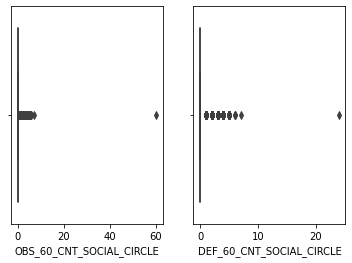

In [170]:
fig, ax =plt.subplots(1,2)
sns.boxplot(df['OBS_60_CNT_SOCIAL_CIRCLE'], ax=ax[0])
sns.boxplot(df['DEF_60_CNT_SOCIAL_CIRCLE'], ax=ax[1])
fig.show()

# Treatment of variables  'AMT_REQ_CREDIT_BUREAU_HOUR' / DAY / WEEK / MON / QRT / YEAR :
-----------------------------------------------------------------
definition : Number of enquiries to Credit Bureau about the client (period : hour, day, week, month, quartile, year) before application

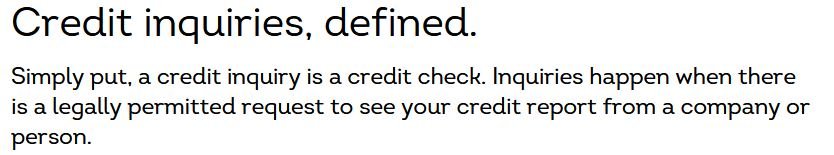

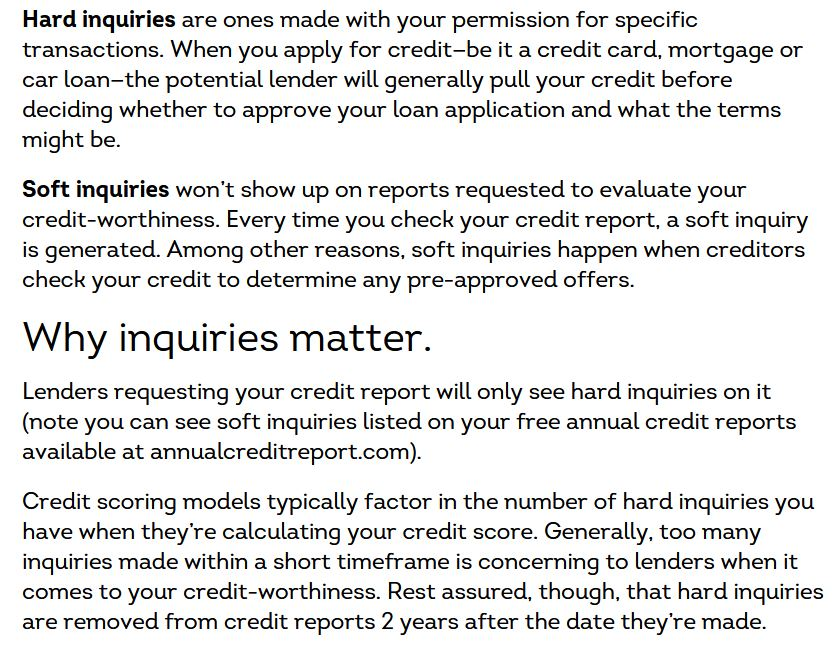

In [171]:
# Check about missing values 

In [172]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE',
    

In [173]:
list_inq = list(['AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'])

In [174]:
for i in list_inq :
    print('Total missing for ', i,'    ',df[i].isna().sum())

Total missing for  AMT_REQ_CREDIT_BUREAU_HOUR      41519
Total missing for  AMT_REQ_CREDIT_BUREAU_DAY      41519
Total missing for  AMT_REQ_CREDIT_BUREAU_WEEK      41519
Total missing for  AMT_REQ_CREDIT_BUREAU_MON      41519
Total missing for  AMT_REQ_CREDIT_BUREAU_QRT      41519
Total missing for  AMT_REQ_CREDIT_BUREAU_YEAR      41519


In [175]:
# Any increase in those columns can usually has a negative impact for client worthiness evaluation
#

In [176]:
for i in list_inq :
    print('Total missing for ', i,'    ',df_bad_loaners[i].isna().sum())

Total missing for  AMT_REQ_CREDIT_BUREAU_HOUR      4292
Total missing for  AMT_REQ_CREDIT_BUREAU_DAY      4292
Total missing for  AMT_REQ_CREDIT_BUREAU_WEEK      4292
Total missing for  AMT_REQ_CREDIT_BUREAU_MON      4292
Total missing for  AMT_REQ_CREDIT_BUREAU_QRT      4292
Total missing for  AMT_REQ_CREDIT_BUREAU_YEAR      4292


In [177]:
for i in list_inq :
    print('Total missing for ', i,'    ',df_good_loaners[i].isna().sum())

Total missing for  AMT_REQ_CREDIT_BUREAU_HOUR      37227
Total missing for  AMT_REQ_CREDIT_BUREAU_DAY      37227
Total missing for  AMT_REQ_CREDIT_BUREAU_WEEK      37227
Total missing for  AMT_REQ_CREDIT_BUREAU_MON      37227
Total missing for  AMT_REQ_CREDIT_BUREAU_QRT      37227
Total missing for  AMT_REQ_CREDIT_BUREAU_YEAR      37227


In [178]:
# We replace all the missong values by '0' which means that if the value isn't reported we assume thta no enquiry has been adressed to the bureau
# procede to replacement :
df[list_inq] = df[list_inq].fillna(0)

In [179]:
# Check missing values after imputation
df[list_inq].isna().sum()

AMT_REQ_CREDIT_BUREAU_HOUR    0
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
dtype: int64

In [180]:
# Outliers of columns 'DAYS_EMPLOYED'

In [181]:
df['DAYS_EMPLOYED'].max()

365243

In [182]:
# We have a part of data with an exagerrated value
df.loc[df['DAYS_EMPLOYED']>=365243].shape

(55374, 80)

In [183]:
# We first replace this high value by null

In [184]:
df['DAYS_EMPLOYED'] = np.where((df['DAYS_EMPLOYED']== 365243),np.nan,df['DAYS_EMPLOYED'])

In [185]:
df.groupby(['AGE_CLIENT'])['DAYS_EMPLOYED'].mean()

AGE_CLIENT
20     -797.000000
21     -617.888000
22     -696.585099
23     -790.680930
24     -889.082649
25    -1018.959528
26    -1127.293301
27    -1269.454717
28    -1371.042269
29    -1498.270196
30    -1599.447690
31    -1695.482928
32    -1793.270421
33    -1882.969815
34    -1950.298999
35    -2039.461113
36    -2103.682503
37    -2253.867140
38    -2306.639034
39    -2414.376586
40    -2475.673663
41    -2556.612671
42    -2611.886813
43    -2689.610037
44    -2748.461759
45    -2819.080586
46    -2830.201217
47    -2888.852750
48    -2951.343639
49    -3038.717234
50    -3130.060662
51    -3176.373650
52    -3243.162527
53    -3416.456359
54    -3551.266349
55    -3605.688272
56    -3721.175096
57    -3692.239580
58    -3730.457537
59    -3936.277825
60    -4104.678244
61    -4084.461333
62    -4266.677802
63    -4450.743707
64    -4266.138122
65    -4342.045161
66    -4644.511962
67    -4663.471861
68    -3914.602564
69   -15006.000000
Name: DAYS_EMPLOYED, dtype: float64

In [186]:
df['DAYS_EMPLOYED'].isna().sum()

55374

In [187]:
# Replacement of null values 

In [188]:
df['DAYS_EMPLOYED']=df.groupby(['AGE_CLIENT'])['DAYS_EMPLOYED'].apply(lambda x:x.fillna(x.mean()))

In [189]:
df['DAYS_EMPLOYED'].isna().sum()

0

In [190]:
df.loc[df['DAYS_EMPLOYED']>0].shape

(0, 80)

In [191]:
# The maximun value (absolute) is ok
df['DAYS_EMPLOYED'].min()

-17912.0

In [192]:
# Outliers of columns 'DAYS_EMPLOYED'

In [193]:
df.loc[df['AMT_REQ_CREDIT_BUREAU_QRT']>90].shape

(1, 80)

In [194]:
df['AMT_REQ_CREDIT_BUREAU_QRT'].max()

261.0

In [195]:
df['AMT_REQ_CREDIT_BUREAU_QRT'] = np.where((df['AMT_REQ_CREDIT_BUREAU_QRT']== 261),df['AMT_REQ_CREDIT_BUREAU_QRT'].mean(),df['AMT_REQ_CREDIT_BUREAU_QRT'])

In [196]:
df.isna().sum()

SK_ID_CURR              0
TARGET                  0
NAME_CONTRACT_TYPE      0
CODE_GENDER             0
FLAG_OWN_CAR            0
                     ... 
ratio_INC_ANN          12
ratio_CRE_ANN          12
ratio_CRE_INC           0
AMT_Diff_GOODS        278
AMT_Ratio_GOODS       278
Length: 80, dtype: int64

In [197]:
# Features with missing values
[features for features in df.columns if df[features].isnull().sum()>0]

['ratio_INC_ANN', 'ratio_CRE_ANN', 'AMT_Diff_GOODS', 'AMT_Ratio_GOODS']

In [198]:
# We just need to re-calculate this new variables added to data set 

In [199]:
df['AMT_Diff_GOODS'] = df['AMT_CREDIT'] - df['AMT_GOODS_PRICE']
df['AMT_Ratio_GOODS'] = df['AMT_GOODS_PRICE'] / df['AMT_CREDIT']
df['ratio_INC_ANN'] = df['AMT_INCOME_TOTAL']//df['AMT_ANNUITY'] # Defines payment annual capacity of annuity
df['ratio_CRE_ANN'] = df['AMT_CREDIT']//df['AMT_ANNUITY'] # Defines how many years needed to pay back the loan


In [200]:
# Features with missing values
[features for features in df.columns if df[features].isnull().sum()>0]

[]

In [201]:
df.isna().sum()

SK_ID_CURR            0
TARGET                0
NAME_CONTRACT_TYPE    0
CODE_GENDER           0
FLAG_OWN_CAR          0
                     ..
ratio_INC_ANN         0
ratio_CRE_ANN         0
ratio_CRE_INC         0
AMT_Diff_GOODS        0
AMT_Ratio_GOODS       0
Length: 80, dtype: int64

In [202]:
import functions

In [203]:
from functions import *

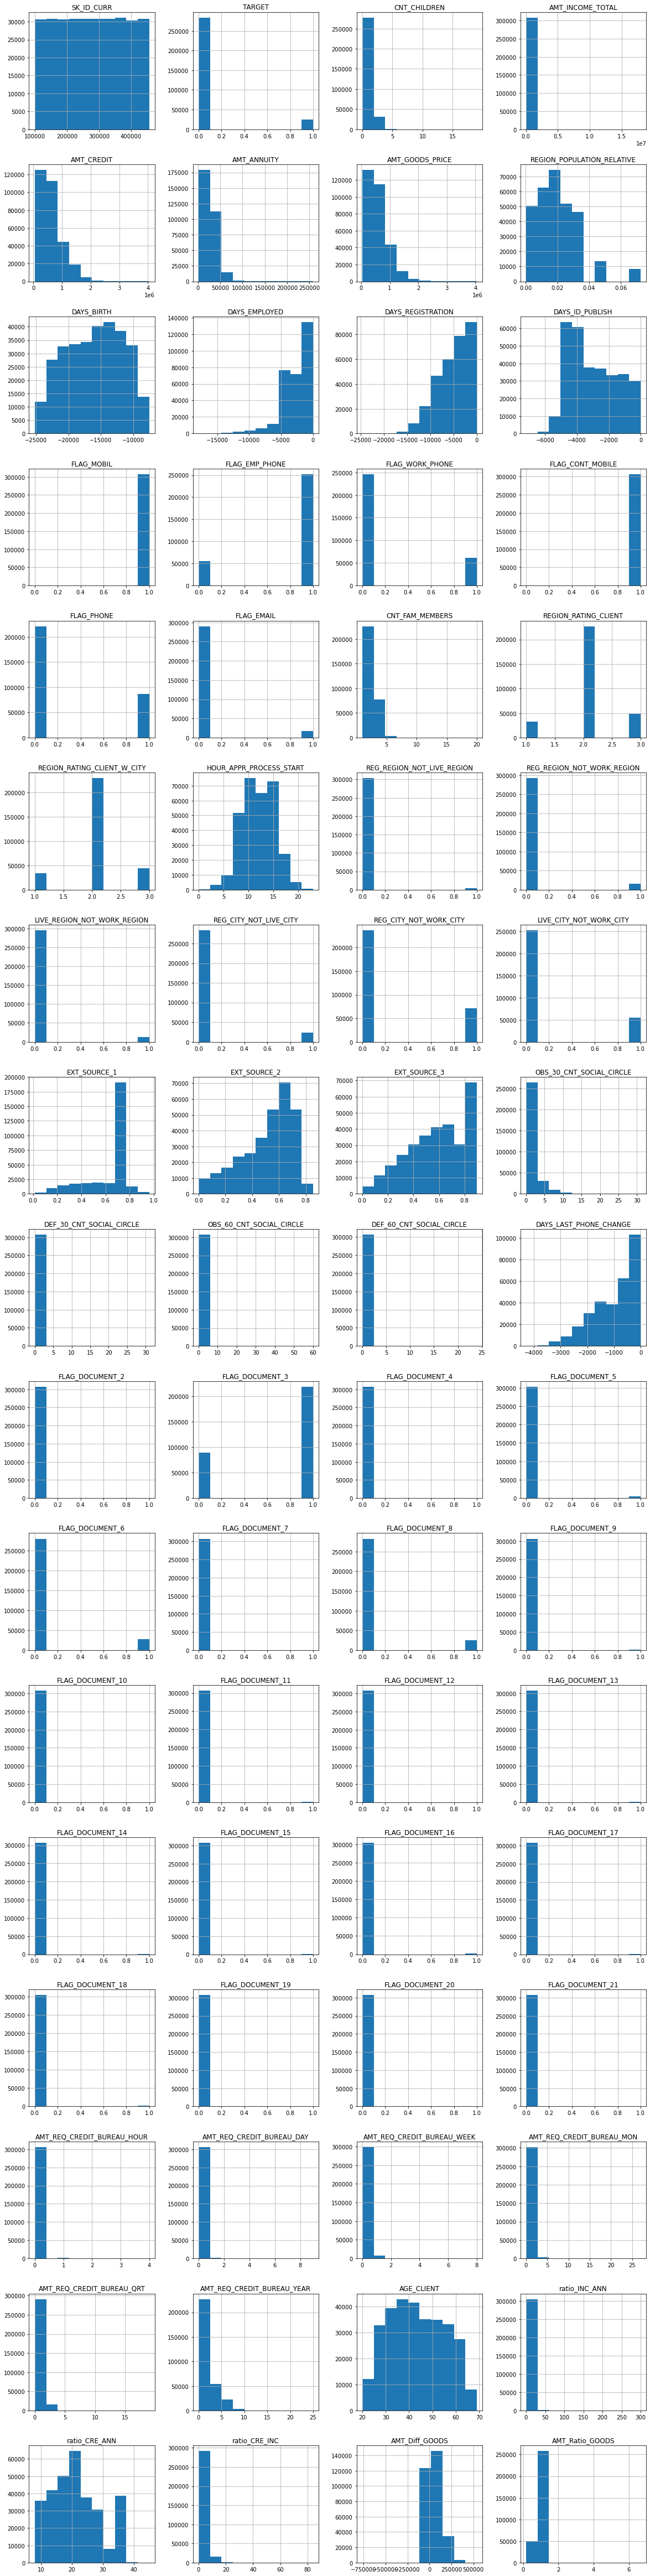

In [204]:
histPlotAll(df)

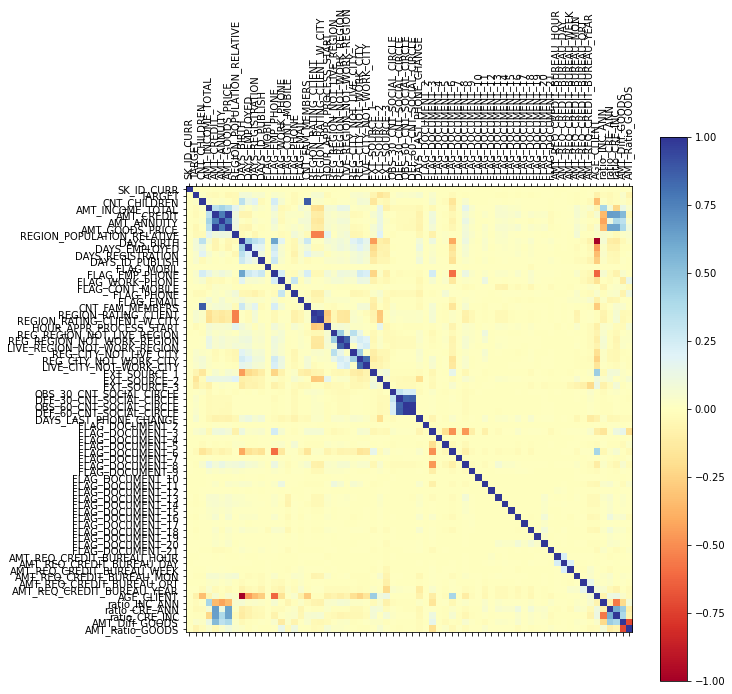

In [205]:
correlationMatrix(df)

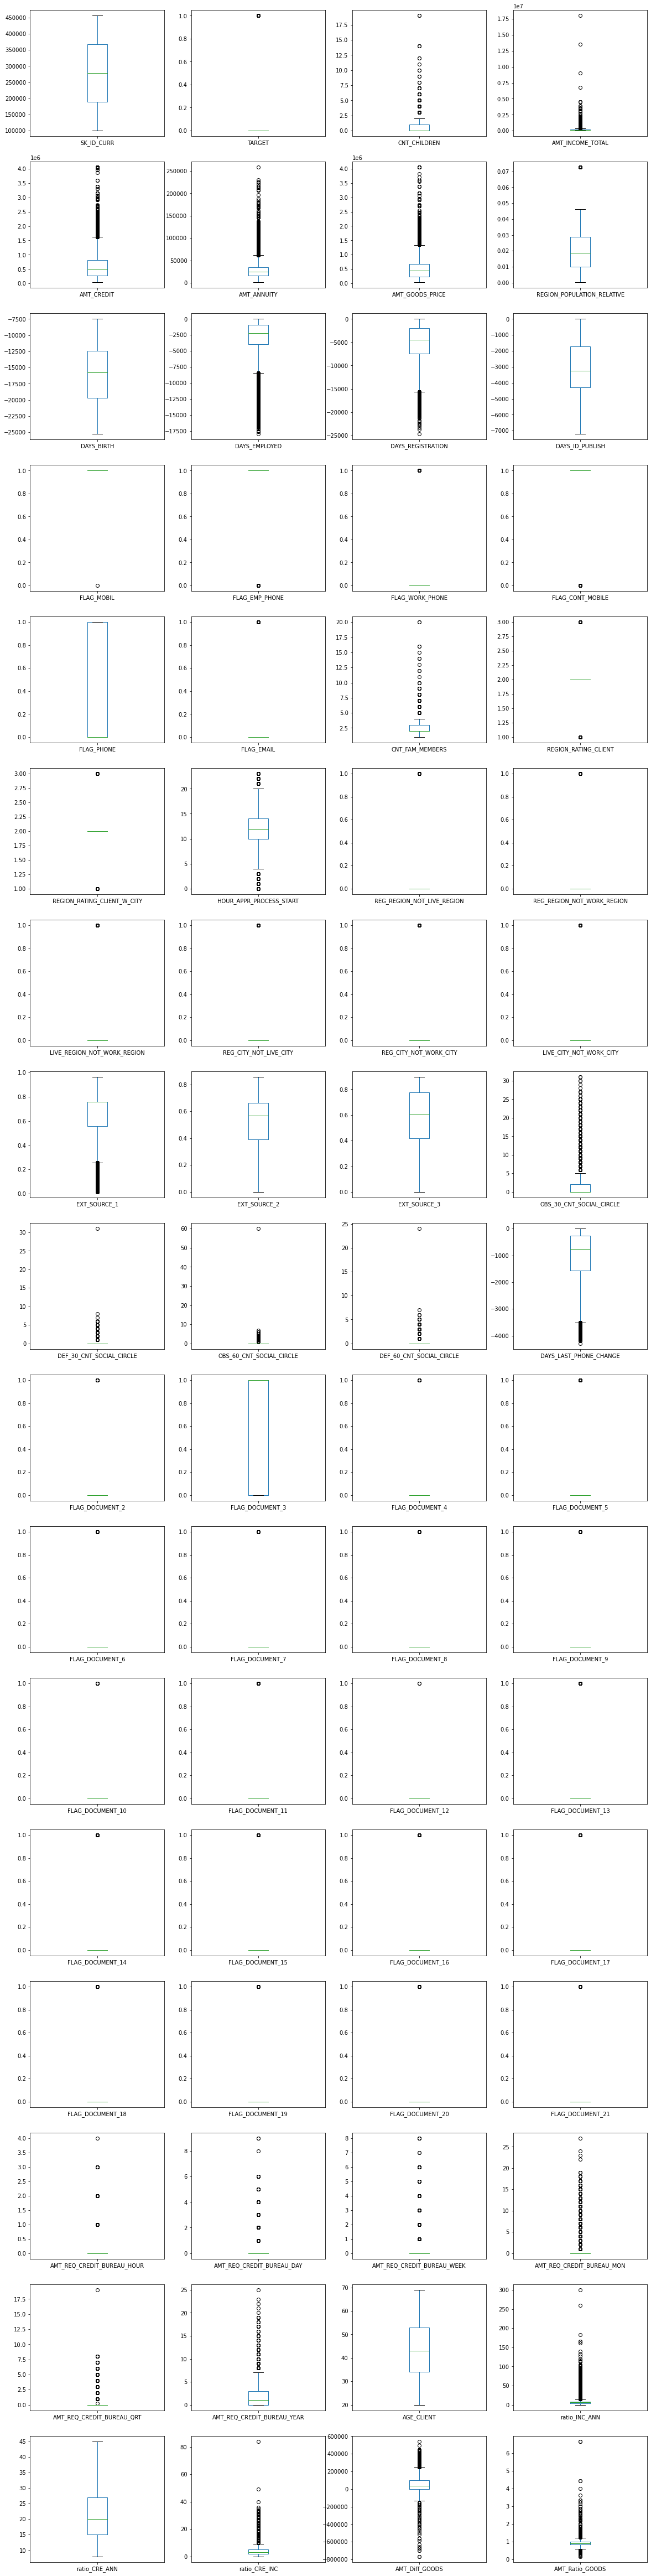

In [206]:
boxPlotAll(df)

In [207]:
# Preparation of dataframe for Modeling phase : 
# Elimination of unecessary and highly correlated columns

In [208]:
list_01 = list(['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'CNT_FAM_MEMBERS', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'ratio_INC_ANN', 'ratio_CRE_ANN',
       'ratio_CRE_INC', 'AMT_Diff_GOODS', 'AMT_Ratio_GOODS'])

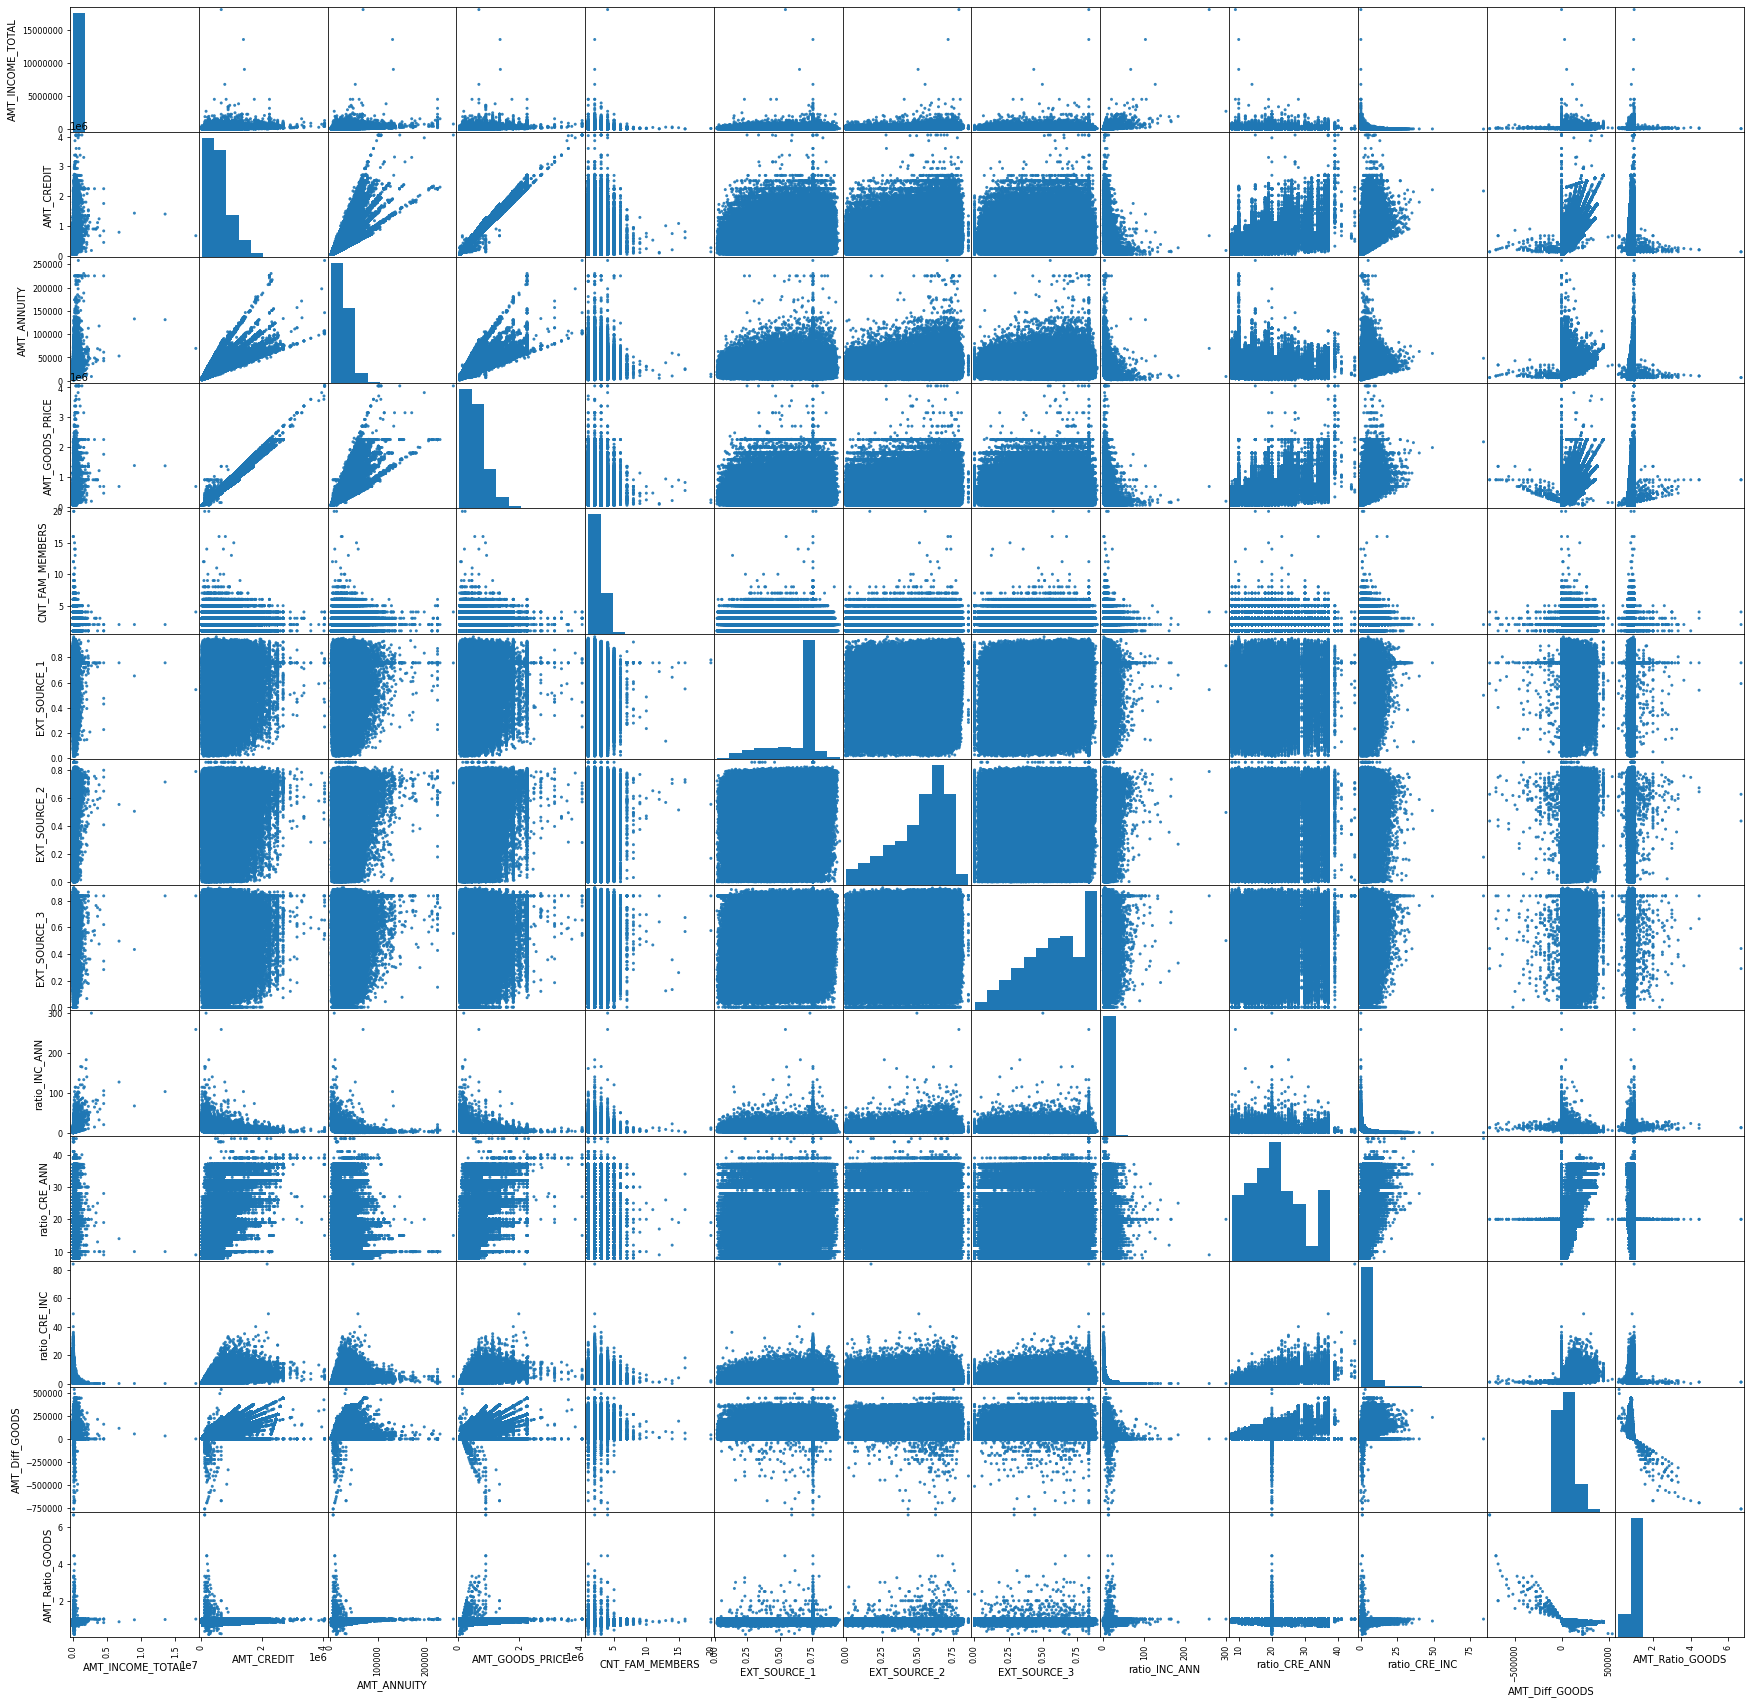

In [209]:
pd.plotting.scatter_matrix(df[list_01],alpha=0.9, figsize=(30,30))
plt.show()

In [210]:
list_02 = list(['CNT_CHILDREN', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH',
       'FLAG_MOBIL','AGE_CLIENT','REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY','AMT_INCOME_TOTAL', 'AMT_CREDIT'])

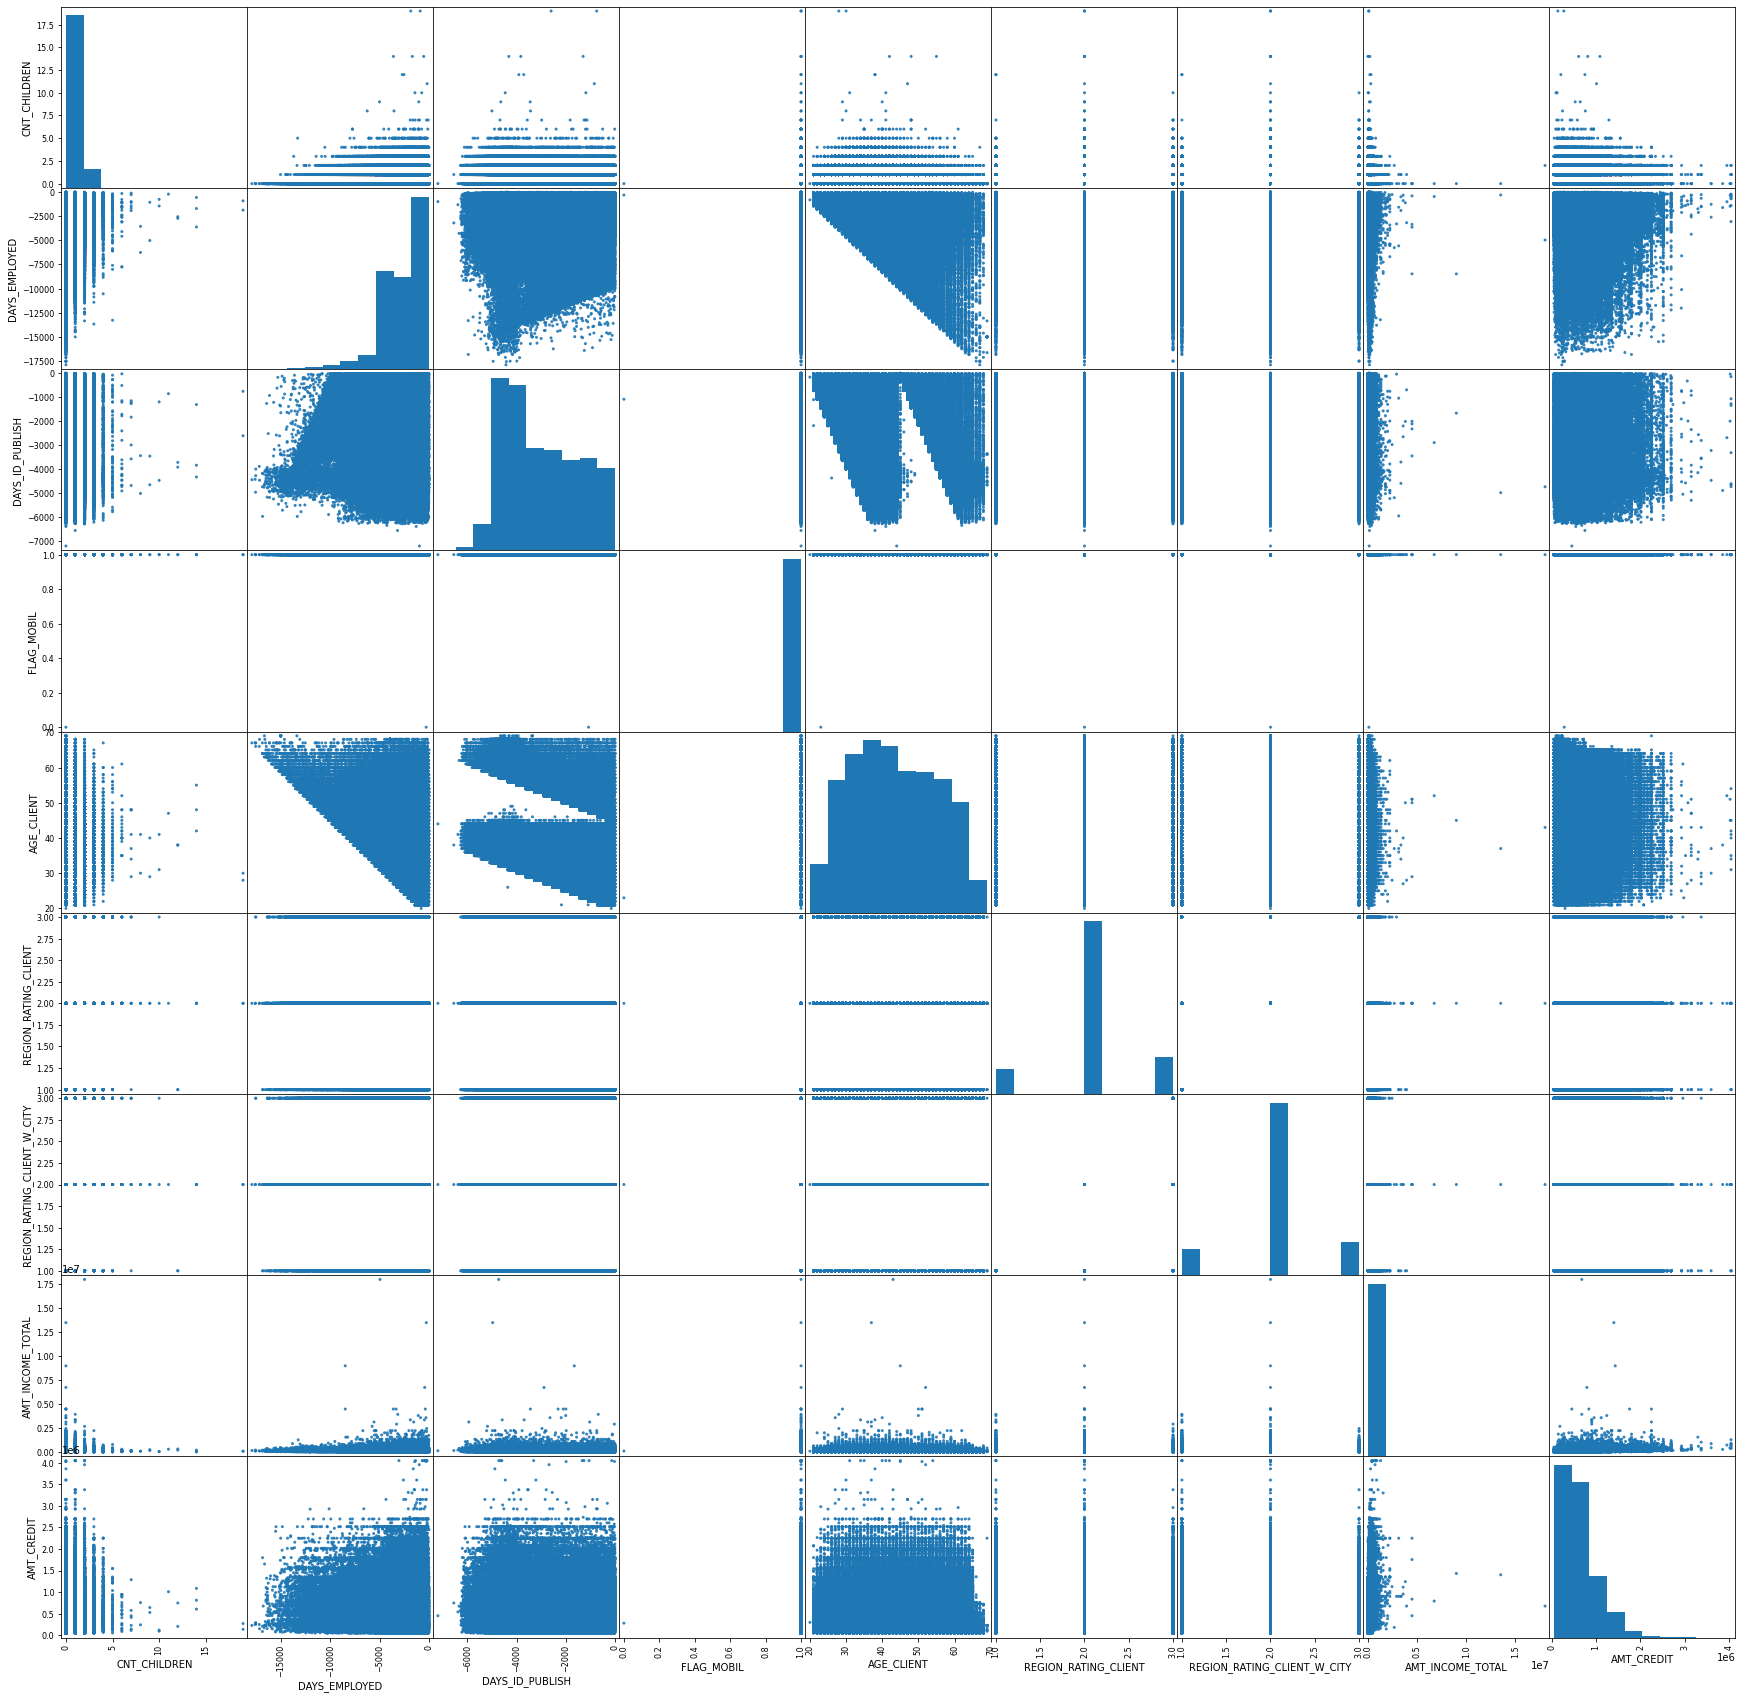

In [211]:
pd.plotting.scatter_matrix(df[list_02],alpha=0.9, figsize=(30,30))
plt.show()

<AxesSubplot:xlabel='CNT_CHILDREN', ylabel='CNT_FAM_MEMBERS'>

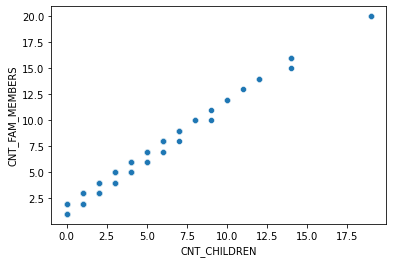

In [212]:
sns.scatterplot(x=df['CNT_CHILDREN'],y=df['CNT_FAM_MEMBERS'])

In [213]:
# AMT_GOODS is higly correlated with AMT_CREDIT
# CNT_CHILDREN is highlt correlated with CNT_FAMILY_MEMBERS
# FLAG_WORK_PHONE is repeated column (home phone as mentionned below)
# it's better to remove AMT_GOODS and CNT_CHILDREN from dataframe for analysis
# Remove SK_ID too as it has only an identification function

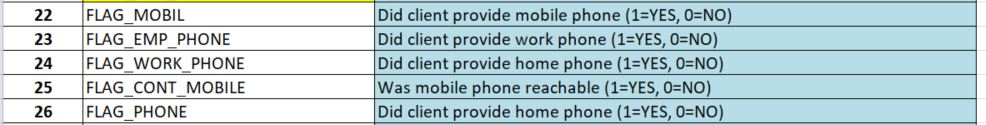

In [214]:
df.drop(['SK_ID_CURR','FLAG_WORK_PHONE','AMT_GOODS_PRICE','CNT_CHILDREN','DAYS_BIRTH'], axis=1, inplace=True)

In [215]:
# Check distribution of variables related to phone :

C:\Users\AMC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\AMC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\AMC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\AMC\AppData\Local\Temp\ipyke

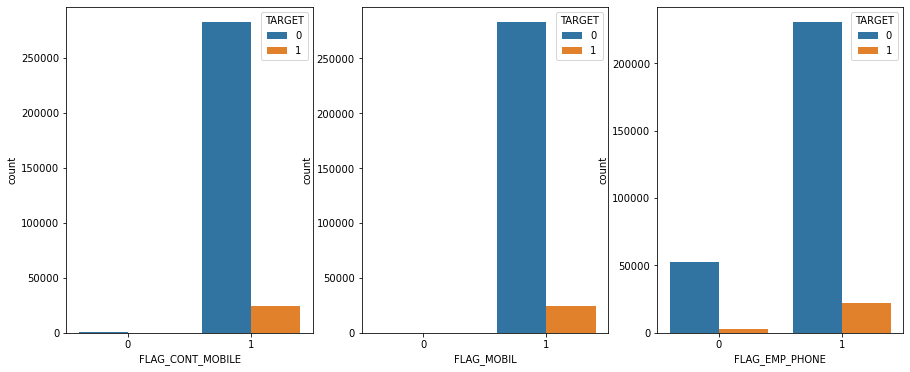

In [216]:
fig, ax =plt.subplots(1,3,figsize=(15,6))

sns.countplot(df['FLAG_CONT_MOBILE'], hue=df['TARGET'], ax=ax[0])
sns.countplot(df['FLAG_MOBIL'], hue=df['TARGET'], ax=ax[1])
sns.countplot(df['FLAG_EMP_PHONE'], hue=df['TARGET'], ax=ax[2])

fig.show()

In [217]:
df['OWN_CAR_AGE'] = df['OWN_CAR_AGE'].astype('float64')

In [218]:
# treatment of some catgorical variables :

In [219]:
obj_columns_ = df.select_dtypes(include=['object']).columns

In [220]:
df['OWN_CAR_AGE'] = df['OWN_CAR_AGE'].astype('float64')

In [221]:
# Check which and how many features we have in each column :
for i in obj_columns_:
    print('for column  :',i,'variables are   : ',df[i].unique())

for column  : NAME_CONTRACT_TYPE variables are   :  ['Cash loans' 'Revolving loans']
for column  : CODE_GENDER variables are   :  ['M' 'F']
for column  : FLAG_OWN_CAR variables are   :  ['N' 'Y']
for column  : FLAG_OWN_REALTY variables are   :  ['Y' 'N']
for column  : NAME_TYPE_SUITE variables are   :  ['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' 'Other_B'
 'Group of people']
for column  : NAME_INCOME_TYPE variables are   :  ['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']
for column  : NAME_EDUCATION_TYPE variables are   :  ['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
for column  : NAME_FAMILY_STATUS variables are   :  ['Single / not married' 'Married' 'Civil marriage' 'Widow' 'Separated'
 'Unknown']
for column  : NAME_HOUSING_TYPE variables are   :  ['House / apartment' 'Rented apartment' 'With parents'
 'Municipal apartment' 'Offi

In [222]:
# we reduce and simplify some features within column 'ORGANIZATION_TYPE'
replacement ={
    'Business Entity Type 1':'Buisness','Business Entity Type 2':'Buisness','Business Entity Type 3':'Buisness',
    'Transport: type 1':'Transport','Transport: type 2':'Transport','Transport: type 3':'Transport','Transport: type 4':'Transport',
    'Industry: type 1':'Industry','Industry: type 2':'Industry','Industry: type 3':'Industry','Industry: type 4':'Industry',
    'Industry: type 5':'Industry','Industry: type 6':'Industry','Industry: type 7':'Industry','Industry: type 8':'Industry',
    'Industry: type 9':'Industry','Industry: type 10':'Industry','Industry: type 11':'Industry','Industry: type 12':'Industry','Industry: type 13':'Industry',
    'Trade: type 1':'Trade','Trade: type 2':'Trade','Trade: type 3':'Trade','Trade: type 4':'Trade','Trade: type 5':'Trade',
    'Trade: type 6':'Trade','Trade: type 7':'Trade'
   
}
df['ORGANIZATION_TYPE'].replace(replacement, regex=True , inplace=True)

In [223]:
# we reduce and simplify some features within column 'ORGANIZATION_TYPE'
replacement ={
    'Industry0':'Industry',
    'Industry1':'Industry',
    'Industry2':'Industry',
    'Industry3':'Industry'
      
}
df['ORGANIZATION_TYPE'].replace(replacement, regex=True , inplace=True)

# Feature selection and treatment : 

In [224]:
# We save the original dataframe in data
data = df

In [225]:
data.columns

Index(['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRC

## simplify some feature by binning allocation or merging & modiying : 
-1- Drop 'ORGANISATION_TYPE' if 'NAME_INCOME_TYPE' is sufficient
-2- CNT_FAM_MEMBERS
-3- AMT_INCOME_TOTAL
-4- AGE-CLIENT
-5- DAYS DAYS_LAST_PHONE_CHANGE
-6- 'OWN_CAR_AGE' to be combined with column 'FLAG_OWN_CAR'
-7- 'DAYS_EMPLOYED' transformation
-8- 'ratio_CRE_INC' transformation

#-1-
#Compare 'NAME_INCOME_TYPE' and 'ORGANIZATION_TYPE' to see if using a feature with less and significant categories
 This can avoid dealing with high number of dummy variables when encoding them

In [226]:
df['NAME_INCOME_TYPE'].unique()

array(['Working', 'State servant', 'Commercial associate', 'Pensioner',
       'Unemployed', 'Student', 'Businessman', 'Maternity leave'],
      dtype=object)

In [227]:
income_type_list = list(['Working', 'State servant', 'Commercial associate', 'Pensioner',
       'Unemployed', 'Student', 'Businessman', 'Maternity leave'])

In [228]:
d=[]
for i in income_type_list :
    x = df.loc[df['NAME_INCOME_TYPE']==i].shape[0]
    y = x * 100 / 307507
    
    d.append(
     {  
     'Class':i,
     'Shape':x,
     'Ratio':y
     }
    )
z=pd.DataFrame(d)

In [229]:
display(z)

Class   Shape      Ratio
0               Working  158771  51.631670
1         State servant   21703   7.057726
2  Commercial associate   71616  23.289226
3             Pensioner   55362  18.003493
4            Unemployed      22   0.007154
5               Student      18   0.005854
6           Businessman      10   0.003252
7       Maternity leave       5   0.001626

In [230]:
df['ORGANIZATION_TYPE'].unique()

array(['Buisness', 'School', 'Government', 'Religion', 'Other', 'XNA',
       'Electricity', 'Medicine', 'Self-employed', 'Transport',
       'Construction', 'Housing', 'Kindergarten', 'Trade', 'Industry',
       'Military', 'Services', 'Security Ministries', 'Emergency',
       'Security', 'University', 'Police', 'Postal', 'Agriculture',
       'Restaurant', 'Culture', 'Hotel', 'Bank', 'Insurance', 'Mobile',
       'Legal Services', 'Advertising', 'Cleaning', 'Telecom', 'Realtor'],
      dtype=object)

In [231]:
pensioner = df.loc[df['NAME_INCOME_TYPE']=='Pensioner']
print('shape   :',pensioner.shape)
pensioner['ORGANIZATION_TYPE'].value_counts()

shape   : (55362, 75)


XNA              55352
Buisness             4
Industry             1
Trade                1
Military             1
School               1
Self-employed        1
Medicine             1
Name: ORGANIZATION_TYPE, dtype: int64

In [232]:
state = df.loc[df['NAME_INCOME_TYPE']=='State servant']
print('shape   :',state.shape)
state['ORGANIZATION_TYPE'].value_counts()

shape   : (21703, 75)


Medicine               3298
Government             3023
School                 2783
Other                  2763
Kindergarten           1915
Military               1480
Police                 1363
Security Ministries    1053
Buisness                979
Postal                  597
University              375
Transport               331
Industry                295
Housing                 265
Emergency               197
Self-employed           161
Trade                   146
Bank                     94
Security                 82
Agriculture              76
Culture                  74
Construction             70
Electricity              67
Hotel                    61
Restaurant               29
Telecom                  26
Legal Services           26
Insurance                25
Advertising              17
Religion                  9
Services                  8
Cleaning                  5
Mobile                    5
Realtor                   5
Name: ORGANIZATION_TYPE, dtype: int64

In [233]:
working = df.loc[df['NAME_INCOME_TYPE']=='Working']
print('shape   :',working.shape)
working['ORGANIZATION_TYPE'].value_counts()

shape   : (158771, 75)


Buisness               53549
Self-employed          26497
Industry               10502
Other                  10099
Trade                   8458
Medicine                6423
Transport               6124
Government              5879
School                  5108
Construction            4577
Kindergarten            4168
Security                2203
Housing                 2043
Agriculture             2018
Postal                  1314
Restaurant              1236
Bank                    1135
Military                 935
Services                 930
Police                   756
Security Ministries      721
Electricity              663
University               649
Hotel                    628
Telecom                  357
Emergency                309
Insurance                284
Advertising              232
Culture                  219
Realtor                  197
Mobile                   183
Cleaning                 181
Legal Services           139
Religion                  55
Name: ORGANIZA

In [234]:
maternity = df.loc[df['NAME_INCOME_TYPE']=='Maternity leave']
print('shape   :',maternity.shape)
maternity['CODE_GENDER'].value_counts()

shape   : (5, 75)


F    4
M    1
Name: CODE_GENDER, dtype: int64

In [235]:
student = df.loc[df['NAME_INCOME_TYPE']=='Student']
print('shape   :',student.shape)
student['ORGANIZATION_TYPE'].value_counts()

shape   : (18, 75)


Buisness       6
Industry       2
Medicine       2
Trade          1
Electricity    1
School         1
Bank           1
Government     1
Transport      1
Other          1
University     1
Name: ORGANIZATION_TYPE, dtype: int64

In [236]:
# Using only 'NAME_INCOME_TYPE' as it provides same type of column 'ORGANIZATION_TYPE' with less categories
df.drop('ORGANIZATION_TYPE', axis=1, inplace=True)

In [237]:
#-2-
# Lengend is :
# FAM_UNI : up to 2 members
# FAM_NOR : up to 4 members
# FAM_NOM : up to 10 members
# FAM_XXL : up to 20 members
df['CNT_FAM_MEMBERS'].value_counts()
FAM_CNT = pd.cut(df['CNT_FAM_MEMBERS'], bins=[0,2,4,10,21], labels=['FAM_UNI','FAM_NOR','FAM_NOM','FAM_XXL'])

In [238]:
df['FAMILY_TYPE'] = FAM_CNT

In [239]:
pd.set_option('display.max_columns', None)
dff = df.loc[df['FAMILY_TYPE']=='FAM_XXL']

In [240]:
dff['CNT_FAM_MEMBERS'].max()

20.0

In [241]:
df['FAMILY_TYPE'].value_counts()

FAM_UNI    226204
FAM_NOR     77296
FAM_NOM      3996
FAM_XXL        11
Name: FAMILY_TYPE, dtype: int64

<AxesSubplot:xlabel='FAMILY_TYPE', ylabel='count'>

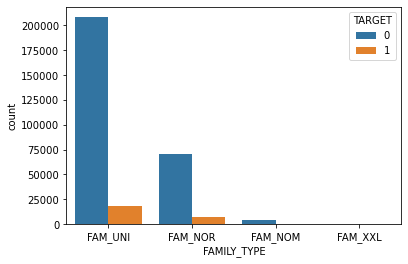

In [242]:
sns.countplot(x=df['FAMILY_TYPE'],hue=df['TARGET'])

In [243]:
# drop initial column 'CNT_FAM_MEMBERS'
df.drop('CNT_FAM_MEMBERS', axis=1, inplace=True)

In [244]:
# -3- AMT_INCOME_TOTAL

In [245]:
# Lengend is :
# POOR_CLASS : less than 35000
# AVG_CLASS : up to 150 000
# MED_CLASS : up to 500 000
# RICH_CLASS : up to 1 000 000
# JETSET_CLASS : up to 10 000 000

In [246]:
INCOME_CLASS = pd.cut(df['AMT_INCOME_TOTAL'], bins=[0,35000,150000,500000,1000000,100000000], labels=['POOR','AVG','MED','RICH','JETSET'])

In [247]:
df.loc[df['AMT_INCOME_TOTAL']<150000].shape[0]

155289

In [248]:
INCOME_CLASS.value_counts()

AVG       154847
MED       149517
RICH        2452
POOR         442
JETSET       249
Name: AMT_INCOME_TOTAL, dtype: int64

In [249]:
df['INCOME_CLASS'] = INCOME_CLASS

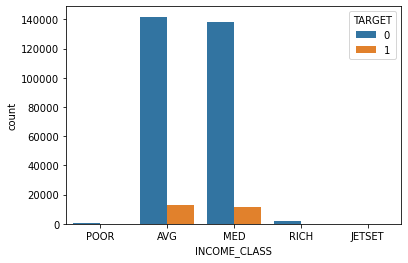

In [250]:
sns.countplot(x=df['INCOME_CLASS'],hue=df['TARGET'])
plt.show()

In [251]:
df['INCOME_CLASS'].isna().sum()

0

In [252]:
# drop initial column 'AMT_INCOME_TOTAL'
df.drop('AMT_INCOME_TOTAL', axis=1, inplace=True)

In [253]:
# -4- AGE-CLIENT :
# Lengend is :
# YOUNG : up to 30
# 30-TH : up to 40
# 40-TH : up to 50
# 50-TH : up to 60
# SENIOR

In [254]:
df['AGE_CLIENT'].value_counts(bins=5)

(29.8, 39.6]     82298
(39.6, 49.4]     76543
(49.4, 59.2]     68073
(19.95, 29.8]    44998
(59.2, 69.0]     35595
Name: AGE_CLIENT, dtype: int64

In [255]:
df['AGE_CLIENT'].max()

69

In [256]:
AGE_CLASS = pd.cut(df['AGE_CLIENT'], bins=[0,30,40,50,60,100], labels=['YOUNG','30-TH','40-TH','50-TH','SENIOR'])

In [257]:
df['AGE_CLASS'] = AGE_CLASS

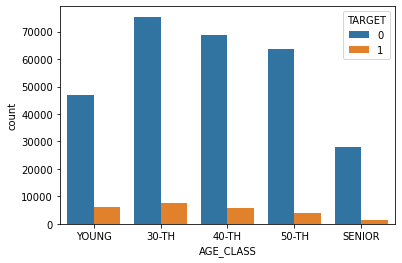

In [258]:
sns.countplot(x=df['AGE_CLASS'],hue=df['TARGET'])
plt.show()

In [259]:
# drop initial column 'AGE_CLIENT'
df.drop('AGE_CLIENT', axis=1, inplace=True)

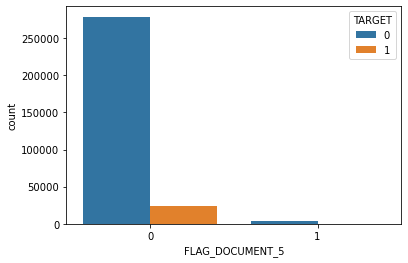

In [260]:
sns.countplot(x=df['FLAG_DOCUMENT_5'],hue=df['TARGET'])
plt.show()

In [261]:
# -5-  DAYS_LAST_PHONE_CHANGE
# Lengend is :
# Y1 : within first year
# Y2 : within second year
# Y3 : within third year
# Y4 : within fourth year
# +Y5 : after fifth year

In [262]:
df['DAYS_LAST_PHONE_CHANGE'].value_counts(bins=10)

(-429.2, 0.0]                    103256
(-858.4, -429.2]                  62507
(-1716.8, -1287.6]                41226
(-1287.6, -858.4]                 38659
(-2146.0, -1716.8]                30508
(-2575.2, -2146.0]                17993
(-3004.4, -2575.2]                 8654
(-3433.6, -3004.4]                 4017
(-3862.8, -3433.6]                  629
(-4296.293000000001, -3862.8]        58
Name: DAYS_LAST_PHONE_CHANGE, dtype: int64

In [263]:
PHONE_CHANGE = pd.cut(df['DAYS_LAST_PHONE_CHANGE'], bins=[-10000,-1460,-1095,-730,-365,0], labels=['+Y5','Y4','Y3','Y2','Y1'])

In [264]:
df['PHONE_CHANGE'] = PHONE_CHANGE

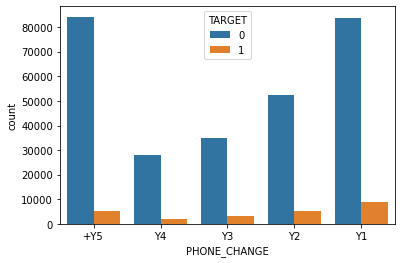

In [265]:
sns.countplot(x=df['PHONE_CHANGE'],hue=df['TARGET'])
plt.show()

In [266]:
# Drop the initial variable 'DAYS_LAST_PHONE_CHANGE'
df.drop('DAYS_LAST_PHONE_CHANGE',axis=1, inplace=True)

In [267]:
# -6- OWN_CAR_AGE :
# Lengend is :
# NO_CAR : no car
# NEW : less than 1 year 
# LIKE_NEW : up to 5 years 
# USED :  up to 15
# OLD : up to 45
# COLLECTION : more than 45

In [268]:
df['OWN_CAR_AGE'].value_counts(bins=5)

(-1.093, 17.4]    288644
(17.4, 35.8]       14878
(54.2, 72.6]        3343
(35.8, 54.2]         640
(72.6, 91.0]           2
Name: OWN_CAR_AGE, dtype: int64

In [269]:
df.loc[df['OWN_CAR_AGE']>40].shape[0]

3526

In [270]:
CAR_CLASS = pd.cut(df['OWN_CAR_AGE'], bins=[-2,0,1,5,15,45,100], labels=['NO_CAR','NEW','LIKE_NEW','USED','OLD','COLLECTION'])

In [271]:
df['CAR_CLASS'] = CAR_CLASS

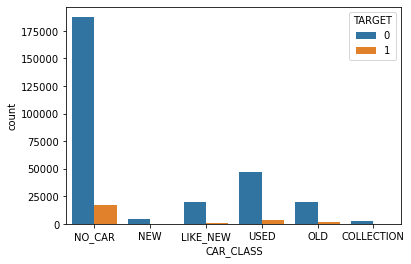

In [272]:
sns.countplot(x=df['CAR_CLASS'],hue=df['TARGET'])
plt.show()

In [273]:
# Drop the initial variable 'OWN_CAR_AGE' and the column 'FLAG_OWN_CAR'
df.drop(['OWN_CAR_AGE','FLAG_OWN_CAR'],axis=1, inplace=True)

In [274]:
# -7- 'DAYS_EMPLOYED' transformation : 
# Lengend is :
# NEWBEE : less than 1 year
# PRE_PERMANENT : up to 2 years 
# PERMANENT : up to 5 years 
# EXPER_01 :  up to 15
# EXPER_02 :  up to 30
# PRE_RETIR : more than 30

In [275]:
df['YEARS_EMPLOYED'] = df['DAYS_EMPLOYED']/(-365)

In [276]:
df['DAYS_EMPLOYED'].max()

0.0

In [277]:
df.loc[df['YEARS_EMPLOYED']<5].shape[0]

136494

In [278]:
df['YEARS_EMPLOYED'].mean()

7.307390303470655

In [279]:
df['YEARS_EMPLOYED'].value_counts(bins=8)

(-0.0501, 6.134]    155009
(6.134, 12.268]     112582
(12.268, 18.403]     24391
(18.403, 24.537]      8832
(24.537, 30.671]      4004
(30.671, 36.805]      2026
(36.805, 42.94]        584
(42.94, 49.074]         79
Name: YEARS_EMPLOYED, dtype: int64

In [280]:
df['DAYS_EMPLOYED'].value_counts(bins=8)

(-2239.0, 0.0]            154975
(-4478.0, -2239.0]        112601
(-6717.0, -4478.0]         24406
(-8956.0, -6717.0]          8828
(-11195.0, -8956.0]         4006
(-13434.0, -11195.0]        2028
(-15673.0, -13434.0]         584
(-17929.913, -15673.0]        79
Name: DAYS_EMPLOYED, dtype: int64

In [281]:
df.loc[df['DAYS_EMPLOYED']>-365].shape[0]

27904

In [282]:
JOB_EXPERIENCE = pd.cut(df['YEARS_EMPLOYED'], bins=[-1,1,2,5,15,30,100], labels=['NEWBEE','PRE_PERMANENT','PERMANENT','EXPER_01','EXPER_02','PRE_RETIR'])

In [283]:
df['JOB_EXPERIENCE'] = JOB_EXPERIENCE

In [284]:
df['JOB_EXPERIENCE'].isna().sum()

0

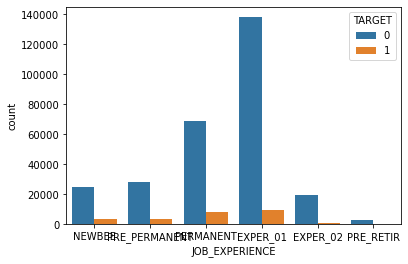

In [285]:
sns.countplot(x=df['JOB_EXPERIENCE'],hue=df['TARGET'])
plt.show()

In [286]:
# Drop unecessary columns
df.drop(['DAYS_EMPLOYED','YEARS_EMPLOYED'],axis=1, inplace=True)

In [287]:
# -8- 'ratio_CRE_INC' transformation
# Lengend is :
# EXTRA-SHORT : up to 7 years
# SHORT : up to 20 years 
# MEDIUM : up to 30 years 
# LONG :  up to 40 years
# EXTRA-LONG :  more than 40

In [288]:
df['ratio_CRE_ANN'].value_counts(bins=5)

(15.4, 22.8]     114647
(7.962, 15.4]     77716
(22.8, 30.2]      68366
(30.2, 37.6]      46571
(37.6, 45.0]        207
Name: ratio_CRE_ANN, dtype: int64

In [289]:
df.loc[df['ratio_CRE_ANN']<7].shape[0]

0

In [290]:
CRE_TIME = pd.cut(df['ratio_CRE_ANN'], bins=[7,10,20,30,40,100], labels=['EXTRA-SHORT','SHORT','MEDIUM','LONG','EXTRA_LONG'])

In [291]:
df['CRE_TIME'] = CRE_TIME

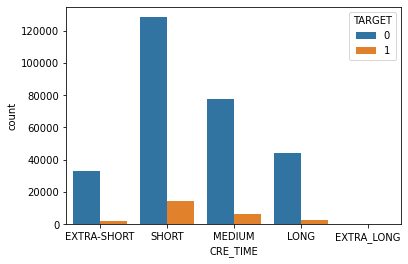

In [292]:
sns.countplot(x=df['CRE_TIME'],hue=df['TARGET'])
plt.show()

In [293]:
# Drop unecessary columns
df.drop(['ratio_INC_ANN', 'ratio_CRE_ANN', 'ratio_CRE_INC','AMT_Diff_GOODS','AMT_Ratio_GOODS'],axis=1, inplace=True)

In [294]:
# Dataframe to be used for modelling
df.columns

Index(['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY',
       'AMT_CREDIT', 'AMT_ANNUITY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DO

In [295]:
# Re-check for null values : 
for i in df.columns:
    if df.loc[df[i].isna()].shape[0]>0:
        print(i)

In [296]:
df.head()

TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_REALTY  AMT_CREDIT  \
0       1         Cash loans           M               Y    406597.5   
1       0         Cash loans           F               N   1293502.5   
2       0    Revolving loans           M               Y    135000.0   
3       0         Cash loans           F               Y    312682.5   
4       0         Cash loans           M               Y    513000.0   

   AMT_ANNUITY NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0      24700.5   Unaccompanied          Working   
1      35698.5          Family    State servant   
2       6750.0   Unaccompanied          Working   
3      29686.5   Unaccompanied          Working   
4      21865.5   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  \
0                    0.018801            -3648.0            -2120           1   
1                    0.003541            -1186.0             -291           1   
2                    0.010032            -4260.0            -2531           1   
3                    0.008019            -9833.0            -2437           1   
4                    0.028663            -4311.0            -3458           1   

   FLAG_EMP_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
0               1                 1           1           0   
1               1                 1           1           0   
2               1                 1           1           0   
3               1                 1           0           0   
4               1                 1           0           0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  EXT_SOURCE_1  \
0                       0                        0      0.083037   
1                       0                        0      0.311267   
2                       0                        0      0.756275   
3                       0                        0      0.756275   
4                       1                        1      0.756275   

   EXT_SOURCE_2  EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  \
0      0.262949      0.139376                       2.0   
1      0.62

In [297]:
# Store last and cleaned df in a new dataframe 
data_01 = df

In [298]:
df.to_csv("file_.csv",index=False)

# Modelling phase : 

In [30]:
# split data on dependent and independent variables X & y
y = df['TARGET']
X = df.drop(['TARGET'],axis=1)

In [31]:
def field_metric(a,b):
    mm = pd.crosstab(a, b, rownames=['Actual'], colnames=['Predicted'])
    return (10* (mm[1][0]) + mm[0][1])/(mm[1][0] + mm[0][1])

In [32]:
from sklearn.metrics import make_scorer
field_score = make_scorer(field_metric, greater_is_better=True)

In [33]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay

In [36]:
numeric_features = ['AMT_CREDIT', 'AMT_ANNUITY', 'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']
categorical_features = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'FAMILY_TYPE', 'INCOME_CLASS', 'AGE_CLASS', 'PHONE_CHANGE', 'CAR_CLASS', 'JOB_EXPERIENCE', 'CRE_TIME']

**RUN OF DECISIONTREE MODEL  **

** Run the model twice according to considering 'balanced' or 'unmalanced' Dataset **bold text**

Model : DecisionTree 
Umbalanced data set  
-------------------------------------------------------
corss_val_field Scoring   : [5.96462264 5.91983455 5.89296777]
corss_val_mean : 5.925808320390186
-------------------------------------------------------
corss_val_accuracy Scoring   : [0.85165312 0.85199313 0.85291019]
corss_val_mean : 0.8521854804357561
-------------------------------------------------------
-------------------------------------------------------
Accuracy_score _train : 1.0
Accuracy_score _test  : 0.8526443584490477
-------------------------------------------------------
Precision score is   :  0.14391657010428738
Recall score is    : 0.1667561761546724
F1 score : 0.15449682796367706
-------------------------------------------------------
roc_auc_score  _with threshold: 0.8  is : 0.5398193356452862
-------------------------------------------------------
roc_auc_score  _train is : 1.0
roc_auc_score  _test is : 0.5398193356452862
-----------------------------------------

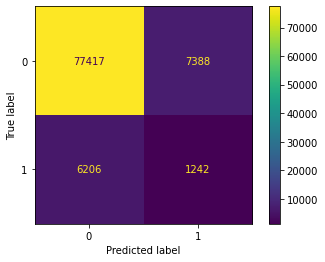

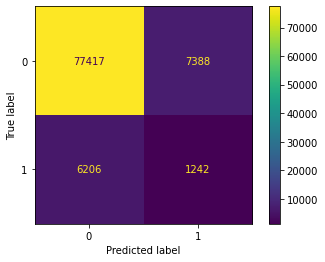

In [ ]:
numeric_features = ['AMT_CREDIT', 'AMT_ANNUITY', 'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']
numeric_transformer = Pipeline(
    steps=[("scaler", MinMaxScaler())]
)

categorical_features = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'FAMILY_TYPE', 'INCOME_CLASS', 'AGE_CLASS', 'PHONE_CHANGE', 'CAR_CLASS', 'JOB_EXPERIENCE', 'CRE_TIME']
categorical_transformer = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
dt_pipe = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", DecisionTreeClassifier(criterion='gini'))]
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10, stratify=y)

dt_pipe.fit(X_train, y_train)

y_pred_train = dt_pipe.predict(X_train)
y_pred = dt_pipe.predict(X_test)

#######################################################################################################
# Define prediction according to a choosen threshold
yy = pd.DataFrame(dt_pipe.predict_proba(X_test))
threshold = 0.8
yy['y_'] = yy[0].apply(lambda x: 0 if x > threshold else 1)
y_pred_prob = yy['y_'].to_numpy()
#######################################################################################################

print('Model : DecisionTree ')
print('Umbalanced data set  ')
print('-------------------------------------------------------')
cv_calc_field = cross_val_score(dt_pipe, X, y, cv=3, scoring=field_score)
print('corss_val_field Scoring   :',cv_calc_field)
print('corss_val_mean :',cv_calc_field.mean())
print('-------------------------------------------------------')
cv_calc_acc = cross_val_score(dt_pipe, X, y, cv=3, scoring='accuracy')
print('corss_val_accuracy Scoring   :',cv_calc_acc)
print('corss_val_mean :',cv_calc_acc.mean())
print('-------------------------------------------------------')
print('-------------------------------------------------------')
print('Accuracy_score _train :',accuracy_score(y_train,y_pred_train))
print('Accuracy_score _test  :', accuracy_score(y_test,y_pred))
print('-------------------------------------------------------')
print('Precision score is   : ',precision_score(y_test,y_pred))
print('Recall score is    :',recall_score(y_test,y_pred))
print('F1 score :',f1_score(y_test,y_pred))
print('-------------------------------------------------------')
print('roc_auc_score  _with threshold:',threshold,' is :',roc_auc_score(y_test,y_pred_prob))
print('-------------------------------------------------------')
print('roc_auc_score  _train is :',roc_auc_score(y_train,y_pred_train))
print('roc_auc_score  _test is :',roc_auc_score(y_test,y_pred))
print('-------------------------------------------------------')
print('Count of  "1" values in y_test    : ',y_test.sum())
print('Count of  "0" values in y_test    : ',len(y_test)-y_test.sum())
print('-------------------------------------------------------')
print('-------------------------------------------------------')
print('-------------------------------------------------------')
print('confusion matrix  "threshold = 0,5" & "threshold" =',threshold,' :')

######################################################################
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()
######################################################################



######################################################################
cm = confusion_matrix(y_test, y_pred_prob)
cm_display = ConfusionMatrixDisplay(cm).plot()
######################################################################


Model : DecisionTree 
Umbalanced data set adressed with "class_weight  
-------------------------------------------------------
corss_val_field Scoring   : [5.6974142  5.65246914 5.6645469 ]
corss_val_mean : 5.671476746820098
-------------------------------------------------------
corss_val_accuracy Scoring   : [0.85658956 0.85900763 0.85860764]
corss_val_mean : 0.858068276425295
-------------------------------------------------------
-------------------------------------------------------
Accuracy_score _train : 1.0
Accuracy_score _test  : 0.8594300456353723
-------------------------------------------------------
Precision score is   :  0.14759959141981613
Recall score is    : 0.1552094522019334
F1 score : 0.1513089005235602
-------------------------------------------------------
roc_auc_score  _with threshold: 0.8  is : 0.538243839360798
-------------------------------------------------------
roc_auc_score  _train is : 1.0
roc_auc_score  _test is : 0.538243839360798
-----------------

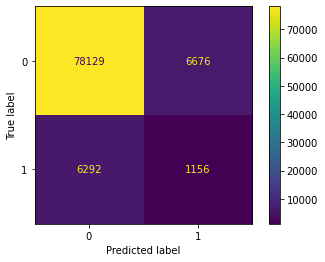

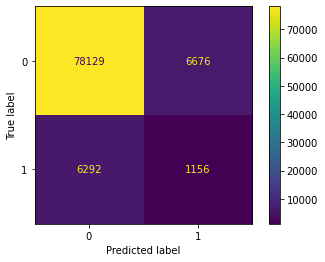

In [ ]:
numeric_features = ['AMT_CREDIT', 'AMT_ANNUITY', 'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']
numeric_transformer = Pipeline(
    steps=[("scaler", MinMaxScaler())]
)

categorical_features = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'FAMILY_TYPE', 'INCOME_CLASS', 'AGE_CLASS', 'PHONE_CHANGE', 'CAR_CLASS', 'JOB_EXPERIENCE', 'CRE_TIME']
categorical_transformer = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
dt_pipe = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", DecisionTreeClassifier(criterion='gini',class_weight='balanced'))]
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10, stratify=y)

dt_pipe.fit(X_train, y_train)

y_pred_train = dt_pipe.predict(X_train)
y_pred = dt_pipe.predict(X_test)

#######################################################################################################
# Define prediction according to a choosen threshold
yy = pd.DataFrame(dt_pipe.predict_proba(X_test))
threshold = 0.8
yy['y_'] = yy[0].apply(lambda x: 0 if x > threshold else 1)
y_pred_prob = yy['y_'].to_numpy()
#######################################################################################################

print('Model : DecisionTree ')
print('Umbalanced data set adressed with "class_weight  ')
print('-------------------------------------------------------')
cv_calc_field = cross_val_score(dt_pipe, X, y, cv=3, scoring=field_score)
print('corss_val_field Scoring   :',cv_calc_field)
print('corss_val_mean :',cv_calc_field.mean())
print('-------------------------------------------------------')
cv_calc_acc = cross_val_score(dt_pipe, X, y, cv=3, scoring='accuracy')
print('corss_val_accuracy Scoring   :',cv_calc_acc)
print('corss_val_mean :',cv_calc_acc.mean())
print('-------------------------------------------------------')
print('-------------------------------------------------------')
print('Accuracy_score _train :',accuracy_score(y_train,y_pred_train))
print('Accuracy_score _test  :', accuracy_score(y_test,y_pred))
print('-------------------------------------------------------')
print('Precision score is   : ',precision_score(y_test,y_pred))
print('Recall score is    :',recall_score(y_test,y_pred))
print('F1 score :',f1_score(y_test,y_pred))
print('-------------------------------------------------------')
print('roc_auc_score  _with threshold:',threshold,' is :',roc_auc_score(y_test,y_pred_prob))
print('-------------------------------------------------------')
print('roc_auc_score  _train is :',roc_auc_score(y_train,y_pred_train))
print('roc_auc_score  _test is :',roc_auc_score(y_test,y_pred))
print('-------------------------------------------------------')
print('Count of  "1" values in y_test    : ',y_test.sum())
print('Count of  "0" values in y_test    : ',len(y_test)-y_test.sum())
print('-------------------------------------------------------')
print('-------------------------------------------------------')
print('-------------------------------------------------------')
print('confusion matrix  "threshold = 0,5" & "threshold" =',threshold,' :')

######################################################################
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()
######################################################################



######################################################################
cm = confusion_matrix(y_test, y_pred_prob)
cm_display = ConfusionMatrixDisplay(cm).plot()
######################################################################


**RUN OF LOGISTIC REGRESSION MODEL**

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Model : Logistic regression 
Umbalanced data set 
-------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


corss_val_field Scoring   : [1.0413693  1.0598115  1.04782031]
corss_val_mean : 1.0496670381077349
-------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


corss_val_accuracy Scoring   : [0.9193487  0.91926011 0.91921133]
corss_val_mean : 0.9192733821496102
-------------------------------------------------------
-------------------------------------------------------
Accuracy_score _train : 0.9193014002601576
Accuracy_score _test  : 0.919157976889891
-------------------------------------------------------
Precision score is   :  0.4444444444444444
Recall score is    : 0.0053705692803437165
F1 score : 0.010612894667020428
-------------------------------------------------------
roc_auc_score  _with prdict_proba: is : 0.741322483338671
-------------------------------------------------------
-------------------------------------------------------
roc_auc_score  _with threshold: 0.8  is : 0.6009496799835794
-------------------------------------------------------
roc_auc_score  _train is : 0.5026104047359637
roc_auc_score  _test is : 0.5023904941772328
-------------------------------------------------------
Count of  "1" values in y_test    :  

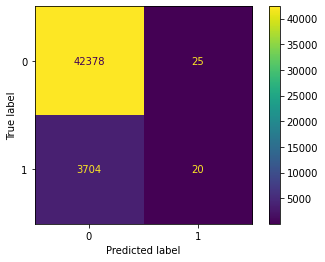

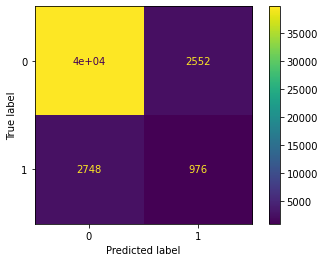

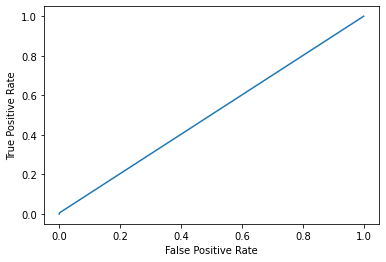

In [11]:
numeric_features = ['AMT_CREDIT', 'AMT_ANNUITY', 'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']
numeric_transformer = Pipeline(
    steps=[("scaler", MinMaxScaler())]
)

categorical_features = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'FAMILY_TYPE', 'INCOME_CLASS', 'AGE_CLASS', 'PHONE_CHANGE', 'CAR_CLASS', 'JOB_EXPERIENCE', 'CRE_TIME']
categorical_transformer = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
lg_pipe = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", LogisticRegression())]
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=10, stratify= y)

lg_pipe.fit(X_train, y_train)

y_pred_train = lg_pipe.predict(X_train)
y_pred = lg_pipe.predict(X_test)

#######################################################################################################
# Define prediction according to a choosen threshold
tt = lg_pipe.predict_proba(X_test)
yy = pd.DataFrame(tt)
threshold = 0.8
yy['y_'] = yy[0].apply(lambda x: 0 if x > threshold else 1)
y_pred_prob = yy['y_'].to_numpy()
#######################################################################################################

print('Model : Logistic regression ')
print('Umbalanced data set ')
print('-------------------------------------------------------')
cv_calc_field = cross_val_score(lg_pipe, X, y, cv=3, scoring=field_score)
print('corss_val_field Scoring   :',cv_calc_field)
print('corss_val_mean :',cv_calc_field.mean())
print('-------------------------------------------------------')
cv_calc_acc = cross_val_score(lg_pipe, X, y, cv=3, scoring='accuracy')
print('corss_val_accuracy Scoring   :',cv_calc_acc)
print('corss_val_mean :',cv_calc_acc.mean())
print('-------------------------------------------------------')
print('-------------------------------------------------------')
print('Accuracy_score _train :',accuracy_score(y_train,y_pred_train))
print('Accuracy_score _test  :', accuracy_score(y_test,y_pred))
print('-------------------------------------------------------')
print('Precision score is   : ',precision_score(y_test,y_pred))
print('Recall score is    :',recall_score(y_test,y_pred))
print('F1 score :',f1_score(y_test,y_pred))
print('-------------------------------------------------------')
print('roc_auc_score  _with prdict_proba: is :',roc_auc_score(y_test,tt[:,1]))
print('-------------------------------------------------------')
print('-------------------------------------------------------')
print('roc_auc_score  _with threshold:',threshold,' is :',roc_auc_score(y_test,y_pred_prob))
print('-------------------------------------------------------')
print('roc_auc_score  _train is :',roc_auc_score(y_train,y_pred_train))
print('roc_auc_score  _test is :',roc_auc_score(y_test,y_pred))
print('-------------------------------------------------------')
print('Count of  "1" values in y_test    : ',y_test.sum())
print('Count of  "0" values in y_test    : ',len(y_test)-y_test.sum())
print('-------------------------------------------------------')
print('-------------------------------------------------------')
print('-------------------------------------------------------')
print('confusion matrix  "threshold = 0,5" & "threshold" =',threshold,' :')

######################################################################
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()
######################################################################



######################################################################
cm = confusion_matrix(y_test, y_pred_prob)
cm_display = ConfusionMatrixDisplay(cm).plot()
######################################################################

#y_score = lg_pipe.decision_function(X_test)

fpr, tpr, _ = roc_curve(y_test, y_pred, pos_label=lg_pipe.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Model : Logistic regression 
Umbalanced data set considered with "class_weight" 
-------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


corss_val_field Scoring   : [9.28701228 9.28010941 9.29752091]
corss_val_mean : 9.288214198354318
-------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


corss_val_accuracy Scoring   : [0.67895574 0.67898187 0.67927455]
corss_val_mean : 0.6790707207152451
-------------------------------------------------------
-------------------------------------------------------
Accuracy_score _train : 0.6799641353935351
Accuracy_score _test  : 0.6784278018059033
-------------------------------------------------------
Precision score is   :  0.15640851169120376
Recall score is    : 0.6789742212674543
F1 score : 0.25424836601307194
roc_auc_score  _with prdict_proba: is : 0.7408331275686415
-------------------------------------------------------
-------------------------------------------------------
roc_auc_score  _with threshold: 0.8  is : 0.563121793561789
-------------------------------------------------------
roc_auc_score  _train is : 0.6837505896222662
roc_auc_score  _test is : 0.6786770168892545
-------------------------------------------------------
Count of  "1" values in y_test    :  7448
Count of  "0" values in y_test    :  84805
----------

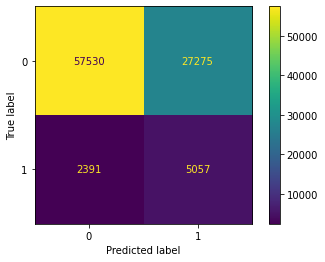

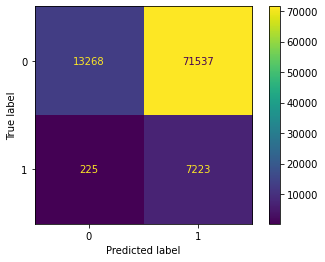

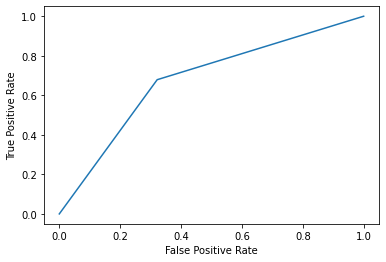

In [10]:
# First modeling with pipline wich make easier performing scaling and encoding in the same process for highly mixed Dataframe

numeric_features = ['AMT_CREDIT', 'AMT_ANNUITY', 'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']
numeric_transformer = Pipeline(
    steps=[("scaler", MinMaxScaler())]
)

categorical_features = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'FAMILY_TYPE', 'INCOME_CLASS', 'AGE_CLASS', 'PHONE_CHANGE', 'CAR_CLASS', 'JOB_EXPERIENCE', 'CRE_TIME']
categorical_transformer = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
lg_pipe = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", LogisticRegression(class_weight='balanced'))]
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10, stratify=y)

lg_pipe.fit(X_train, y_train)

y_pred_train = lg_pipe.predict(X_train)
y_pred = lg_pipe.predict(X_test)

#######################################################################################################
# Define prediction according to a choosen threshold
tt = lg_pipe.predict_proba(X_test)
yy = pd.DataFrame(tt)
threshold = 0.8
yy['y_'] = yy[0].apply(lambda x: 0 if x > threshold else 1)
y_pred_prob = yy['y_'].to_numpy()
#######################################################################################################

print('Model : Logistic regression ')
print('Umbalanced data set considered with "class_weight" ')
print('-------------------------------------------------------')
cv_calc_field = cross_val_score(lg_pipe, X, y, cv=3, scoring=field_score)
print('corss_val_field Scoring   :',cv_calc_field)
print('corss_val_mean :',cv_calc_field.mean())
print('-------------------------------------------------------')
cv_calc_acc = cross_val_score(lg_pipe, X, y, cv=3, scoring='accuracy')
print('corss_val_accuracy Scoring   :',cv_calc_acc)
print('corss_val_mean :',cv_calc_acc.mean())
print('-------------------------------------------------------')
print('-------------------------------------------------------')
print('Accuracy_score _train :',accuracy_score(y_train,y_pred_train))
print('Accuracy_score _test  :', accuracy_score(y_test,y_pred))
print('-------------------------------------------------------')
print('Precision score is   : ',precision_score(y_test,y_pred))
print('Recall score is    :',recall_score(y_test,y_pred))
print('F1 score :',f1_score(y_test,y_pred))
print('roc_auc_score  _with prdict_proba: is :',roc_auc_score(y_test,tt[:,1]))
print('-------------------------------------------------------')
print('-------------------------------------------------------')
print('roc_auc_score  _with threshold:',threshold,' is :',roc_auc_score(y_test,y_pred_prob))
print('-------------------------------------------------------')
print('roc_auc_score  _train is :',roc_auc_score(y_train,y_pred_train))
print('roc_auc_score  _test is :',roc_auc_score(y_test,y_pred))
print('-------------------------------------------------------')
print('Count of  "1" values in y_test    : ',y_test.sum())
print('Count of  "0" values in y_test    : ',len(y_test)-y_test.sum())
print('-------------------------------------------------------')
print('-------------------------------------------------------')
print('-------------------------------------------------------')
print('confusion matrix  "threshold = 0,5" & "threshold" =',threshold,' :')

######################################################################
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()
######################################################################

######################################################################
######################################################################

######################################################################
cm = confusion_matrix(y_test, y_pred_prob)
cm_display = ConfusionMatrixDisplay(cm).plot()
######################################################################

#y_score = lg_pipe.decision_function(X_test)

fpr, tpr, _ = roc_curve(y_test, y_pred, pos_label=lg_pipe.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()


**RUN OF LighGBM MODEL : **

Model : Light GBM 
Umbalanced data set 
-------------------------------------------------------
corss_val_field Scoring   : [1.10356105 1.11451769 1.10767372]
corss_val_mean : 1.1085841517347583
-------------------------------------------------------
corss_val_accuracy Scoring   : [0.91945602 0.91949425 0.91926987]
corss_val_mean : 0.9194067125323867
-------------------------------------------------------
-------------------------------------------------------
Accuracy_score _train : 0.9201926790105892
Accuracy_score _test  : 0.9194009950895906
-------------------------------------------------------
Precision score is   :  0.5263157894736842
Recall score is    : 0.016112789526686808
F1 score : 0.031268321282001174
roc_auc_score  _with prdict_proba: is : 0.7508062994189957
-------------------------------------------------------
-------------------------------------------------------
roc_auc_score  _with threshold: 0.8  is : 0.6050581033646905
--------------------------------------------

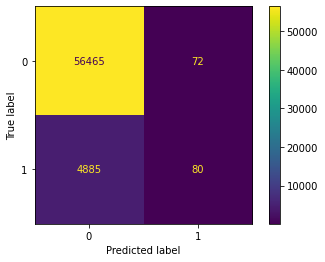

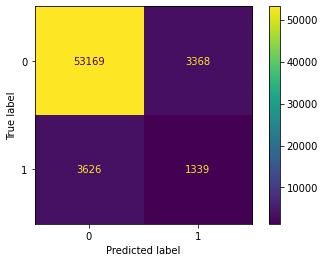

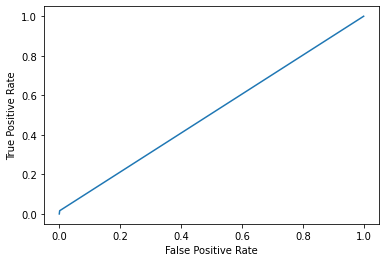

In [12]:
## LGBMClassifier
categorical_features = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'FAMILY_TYPE', 'INCOME_CLASS', 'AGE_CLASS', 'PHONE_CHANGE', 'CAR_CLASS', 'JOB_EXPERIENCE', 'CRE_TIME']
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)
seed=0

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0,stratify=y)

ligh_gbm = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", LGBMClassifier(seed=seed, objective='binary'))]
)

ligh_gbm.fit(X_train, y_train)

y_pred_train = ligh_gbm.predict(X_train)
y_pred = ligh_gbm.predict(X_test)



#######################################################################################################
# Define prediction according to a choosen threshold
tt = lg_pipe.predict_proba(X_test)
yy = pd.DataFrame(tt)
threshold = 0.8
yy['y_'] = yy[0].apply(lambda x: 0 if x > threshold else 1)
y_pred_prob = yy['y_'].to_numpy()
#######################################################################################################

print('Model : Light GBM ')
print('Umbalanced data set ')
print('-------------------------------------------------------')
cv_calc_field = cross_val_score(ligh_gbm, X, y, cv=3, scoring=field_score)
print('corss_val_field Scoring   :',cv_calc_field)
print('corss_val_mean :',cv_calc_field.mean())
print('-------------------------------------------------------')
cv_calc_acc = cross_val_score(ligh_gbm, X, y, cv=3, scoring='accuracy')
print('corss_val_accuracy Scoring   :',cv_calc_acc)
print('corss_val_mean :',cv_calc_acc.mean())
print('-------------------------------------------------------')
print('-------------------------------------------------------')
print('Accuracy_score _train :',accuracy_score(y_train,y_pred_train))
print('Accuracy_score _test  :', accuracy_score(y_test,y_pred))
print('-------------------------------------------------------')
print('Precision score is   : ',precision_score(y_test,y_pred))
print('Recall score is    :',recall_score(y_test,y_pred))
print('F1 score :',f1_score(y_test,y_pred))
print('roc_auc_score  _with prdict_proba: is :',roc_auc_score(y_test,tt[:,1]))
print('-------------------------------------------------------')
print('-------------------------------------------------------')
print('roc_auc_score  _with threshold:',threshold,' is :',roc_auc_score(y_test,y_pred_prob))
print('-------------------------------------------------------')
print('-------------------------------------------------------')
print('roc_auc_score  _train is :',roc_auc_score(y_train,y_pred_train))
print('roc_auc_score  _test is :',roc_auc_score(y_test,y_pred))
print('-------------------------------------------------------')
print('Count of  "1" values in y_test    : ',y_test.sum())
print('Count of  "0" values in y_test    : ',len(y_test)-y_test.sum())
print('-------------------------------------------------------')
print('-------------------------------------------------------')
print('-------------------------------------------------------')
print('confusion matrix  "threshold = 0,5" & "threshold" =',threshold,' :')

######################################################################
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()
######################################################################



######################################################################
cm = confusion_matrix(y_test, y_pred_prob)
cm_display = ConfusionMatrixDisplay(cm).plot()
######################################################################

#y_score = lg_pipe.decision_function(X_test)

fpr, tpr, _ = roc_curve(y_test, y_pred, pos_label=ligh_gbm.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()


Model : Light GBM 
Umbalanced data set considered with "class_weight" 
-------------------------------------------------------
corss_val_field Scoring   : [9.1939289  9.17018779 9.19912863]
corss_val_mean : 9.18774843940239
-------------------------------------------------------
corss_val_accuracy Scoring   : [0.70143313 0.70076681 0.70442528]
corss_val_mean : 0.7022084075330928
-------------------------------------------------------
-------------------------------------------------------
Accuracy_score _train : 0.7045263307656349
Accuracy_score _test  : 0.7006438814997886
-------------------------------------------------------
Precision score is   :  0.16757318037974683
Recall score is    : 0.6825780463242699
F1 score : 0.2690857120171503
-------------------------------------------------------
roc_auc_score  _with prdict_proba: is : 0.7508062994189957
-------------------------------------------------------
-------------------------------------------------------
roc_auc_score  _with th

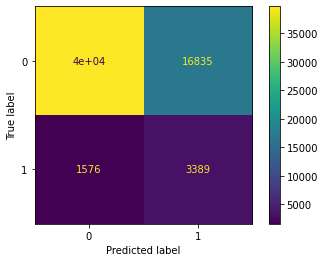

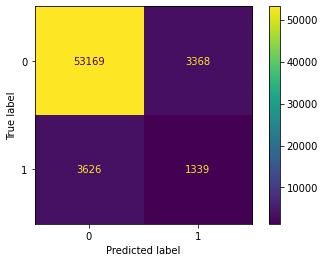

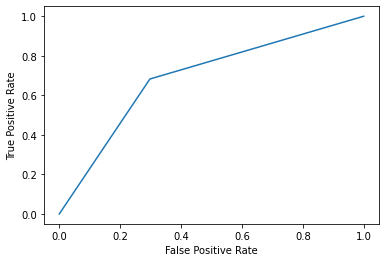

In [13]:
## LGBMClassifier
categorical_features = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'FAMILY_TYPE', 'INCOME_CLASS', 'AGE_CLASS', 'PHONE_CHANGE', 'CAR_CLASS', 'JOB_EXPERIENCE', 'CRE_TIME']
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)
seed=0

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0,stratify=y)

ligh_gbm = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", LGBMClassifier(seed=seed, objective='binary',class_weight='balanced'))]
)

ligh_gbm.fit(X_train, y_train)

y_pred_train = ligh_gbm.predict(X_train)
y_pred = ligh_gbm.predict(X_test)



#######################################################################################################
# Define prediction according to a choosen threshold
tt = lg_pipe.predict_proba(X_test)
yy = pd.DataFrame(tt)
threshold = 0.8
yy['y_'] = yy[0].apply(lambda x: 0 if x > threshold else 1)
y_pred_prob = yy['y_'].to_numpy()
#######################################################################################################

print('Model : Light GBM ')
print('Umbalanced data set considered with "class_weight" ')
print('-------------------------------------------------------')
cv_calc_field = cross_val_score(ligh_gbm, X, y, cv=3, scoring=field_score)
print('corss_val_field Scoring   :',cv_calc_field)
print('corss_val_mean :',cv_calc_field.mean())
print('-------------------------------------------------------')
cv_calc_acc = cross_val_score(ligh_gbm, X, y, cv=3, scoring='accuracy')
print('corss_val_accuracy Scoring   :',cv_calc_acc)
print('corss_val_mean :',cv_calc_acc.mean())
print('-------------------------------------------------------')
print('-------------------------------------------------------')
print('Accuracy_score _train :',accuracy_score(y_train,y_pred_train))
print('Accuracy_score _test  :', accuracy_score(y_test,y_pred))
print('-------------------------------------------------------')
print('Precision score is   : ',precision_score(y_test,y_pred))
print('Recall score is    :',recall_score(y_test,y_pred))
print('F1 score :',f1_score(y_test,y_pred))
print('-------------------------------------------------------')
print('roc_auc_score  _with prdict_proba: is :',roc_auc_score(y_test,tt[:,1]))
print('-------------------------------------------------------')
print('-------------------------------------------------------')
print('roc_auc_score  _with threshold:',threshold,' is :',roc_auc_score(y_test,y_pred_prob))
print('-------------------------------------------------------')
print('roc_auc_score  _train is :',roc_auc_score(y_train,y_pred_train))
print('roc_auc_score  _test is :',roc_auc_score(y_test,y_pred))
print('-------------------------------------------------------')
print('Count of  "1" values in y_test    : ',y_test.sum())
print('Count of  "0" values in y_test    : ',len(y_test)-y_test.sum())
print('-------------------------------------------------------')
print('-------------------------------------------------------')
print('-------------------------------------------------------')
print('confusion matrix  "threshold = 0,5" & "threshold" =',threshold,' :')

######################################################################
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()
######################################################################



######################################################################
cm = confusion_matrix(y_test, y_pred_prob)
cm_display = ConfusionMatrixDisplay(cm).plot()
######################################################################

#y_score = lg_pipe.decision_function(X_test)

fpr, tpr, _ = roc_curve(y_test, y_pred, pos_label=ligh_gbm.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()


**Apply Grid search : FOR LogisticRegression**

In [ ]:
numeric_features = numeric_features
numeric_transformer = Pipeline(
    steps=[("scaler", MinMaxScaler())]
)

categorical_features = categorical_features
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0,stratify=y)
clf = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", LogisticRegression(class_weight='balanced'))]
)


clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("model train score: %.3f" % clf.score(X_train, y_train))
print("model test score%.3f"% accuracy_score(y_test, y_pred))

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


model train score: 0.678
model test score0.682


In [ ]:
param_grid= {"classifier__solver":('newton-cg', 'lbfgs', 'liblinear'),
             "classifier__penalty":('none', 'l1', 'l2', 'elasticnet'),
            "classifier__C":(1e-3, 1e-2, 1e-1, 1)}


grid_search = GridSearchCV(clf, param_grid)
grid_search

GridSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          MinMaxScaler())]),
                                                                         ['AMT_CREDIT',
                                                                          'AMT_ANNUITY',
                                                                          'REGION_POPULATION_RELATIVE',
                                                                          'DAYS_REGISTRATION',
                                                                          'DAYS_ID_PUBLISH',
                                                                          'REGION_RATING_CLIENT',
                                                                          'REGION_RATING

In [ ]:
grid_search.fit(X_train, y_train)

Setting penalty='none' will ignore the C and l1_ratio parameters
Setting penalty='none' will ignore the C and l1_ratio parameters
Setting penalty='none' will ignore the C and l1_ratio parameters
Setting penalty='none' will ignore the C and l1_ratio parameters
Setting penalty='none' will ignore the C and l1_ratio parameters
newton-cg failed to converge. Increase the number of iterations.
Setting penalty='none' will ignore the C and l1_ratio parameters
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
Setting penalty='none' will ignore the C and l1_ratio parameters
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of

GridSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          MinMaxScaler())]),
                                                                         ['AMT_CREDIT',
                                                                          'AMT_ANNUITY',
                                                                          'REGION_POPULATION_RELATIVE',
                                                                          'DAYS_REGISTRATION',
                                                                          'DAYS_ID_PUBLISH',
                                                                          'REGION_RATING_CLIENT',
                                                                          'REGION_RATING

In [ ]:
print("Best params:")
print(grid_search.best_params_)

Best params:
{'classifier__C': 0.001, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}


In [ ]:
print("Best params:")
print(grid_search.best_score_)

Best params:
0.6836487063271072


Re-RUN LOGISTIC MODEL WITH OPTIMIZED HYPERPARAMETER FROM GRIDSERACH

Model : Logistic regression 
Umbalanced data set 
-------------------------------------------------------
corss_val_field Scoring   : [9.22536649 9.21657053 9.22637063]
corss_val_mean : 9.222769214850812
-------------------------------------------------------
corss_val_accuracy Scoring   : [0.68455557 0.683733   0.68536224]
corss_val_mean : 0.6845502703831015
-------------------------------------------------------
-------------------------------------------------------
Accuracy_score _train : 0.6853020152935602
Accuracy_score _test  : 0.6848557770479009
-------------------------------------------------------
Precision score is   :  0.1558172847365908
Recall score is    : 0.6572234156820623
F1 score : 0.25191055759977354
-------------------------------------------------------
roc_auc_score  _with prdict_proba: is : 0.7316071633597289
-------------------------------------------------------
-------------------------------------------------------
roc_auc_score  _with threshold: 0.8  is : 0

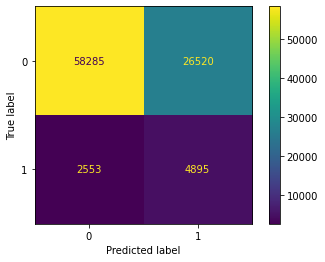

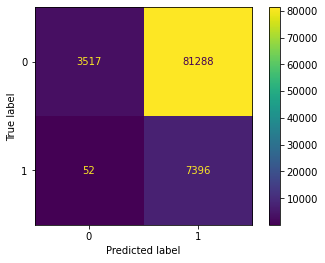

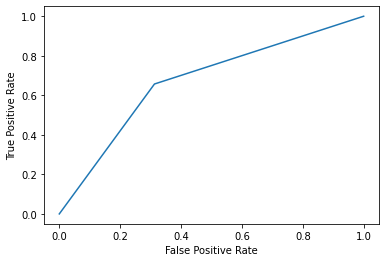

In [50]:
# First modeling with pipline wich make easier performing scaling and encoding in the same process for highly mixed Dataframe

numeric_features = ['AMT_CREDIT', 'AMT_ANNUITY', 'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']
numeric_transformer = Pipeline(
    steps=[("scaler", MinMaxScaler())]
)

categorical_features = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'FAMILY_TYPE', 'INCOME_CLASS', 'AGE_CLASS', 'PHONE_CHANGE', 'CAR_CLASS', 'JOB_EXPERIENCE', 'CRE_TIME']
categorical_transformer = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
lg_pipe = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", LogisticRegression(solver='liblinear',penalty='l1',C=0.001, class_weight='balanced'))]
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10, stratify=y)

lg_pipe.fit(X_train, y_train)

y_pred_train = lg_pipe.predict(X_train)
y_pred = lg_pipe.predict(X_test)

#######################################################################################################
# Define prediction according to a choosen threshold
tt = lg_pipe.predict_proba(X_test)
yy = pd.DataFrame(tt)
threshold = 0.8
yy['y_'] = yy[0].apply(lambda x: 0 if x > threshold else 1)
y_pred_prob = yy['y_'].to_numpy()
#######################################################################################################

print('Model : Logistic regression ')
print('Umbalanced data set ')
print('-------------------------------------------------------')
cv_calc_field = cross_val_score(lg_pipe, X, y, cv=3, scoring=field_score)
print('corss_val_field Scoring   :',cv_calc_field)
print('corss_val_mean :',cv_calc_field.mean())
print('-------------------------------------------------------')
cv_calc_acc = cross_val_score(lg_pipe, X, y, cv=3, scoring='accuracy')
print('corss_val_accuracy Scoring   :',cv_calc_acc)
print('corss_val_mean :',cv_calc_acc.mean())
print('-------------------------------------------------------')
print('-------------------------------------------------------')
print('Accuracy_score _train :',accuracy_score(y_train,y_pred_train))
print('Accuracy_score _test  :', accuracy_score(y_test,y_pred))
print('-------------------------------------------------------')
print('Precision score is   : ',precision_score(y_test,y_pred))
print('Recall score is    :',recall_score(y_test,y_pred))
print('F1 score :',f1_score(y_test,y_pred))
print('-------------------------------------------------------')
print('roc_auc_score  _with prdict_proba: is :',roc_auc_score(y_test,tt[:,1]))
print('-------------------------------------------------------')
print('-------------------------------------------------------')
print('roc_auc_score  _with threshold:',threshold,' is :',roc_auc_score(y_test,y_pred_prob))
print('-------------------------------------------------------')
print('roc_auc_score  _train is :',roc_auc_score(y_train,y_pred_train))
print('roc_auc_score  _test is :',roc_auc_score(y_test,y_pred))
print('-------------------------------------------------------')
print('Count of  "1" values in y_test    : ',y_test.sum())
print('Count of  "0" values in y_test    : ',len(y_test)-y_test.sum())
print('-------------------------------------------------------')
print('-------------------------------------------------------')
print('-------------------------------------------------------')
print('confusion matrix  "threshold = 0,5" & "threshold" =',threshold,' :')

######################################################################
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()
######################################################################



######################################################################
cm = confusion_matrix(y_test, y_pred_prob)
cm_display = ConfusionMatrixDisplay(cm).plot()
######################################################################

#y_score = lg_pipe.decision_function(X_test)

fpr, tpr, _ = roc_curve(y_test, y_pred, pos_label=lg_pipe.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()


**GIRDSERACH FOR LIGHGBM :**

In [11]:
numeric_features = numeric_features
numeric_transformer = Pipeline(
    steps=[("scaler", MinMaxScaler())]
)

categorical_features = categorical_features
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0,stratify=y)

clf_lg = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", LGBMClassifier(seed=0, objective='binary',class_weight='balanced'))]
)


In [12]:
lgbm_params = {
"classifier__n_estimators":[100, 200],
"classifier__learning_rate":[0.01, 0.1],
"classifier__num_leaves": [20, 50],
"classifier__boosting_type":['gbdt', 'rf']
}

In [24]:
grid_search_lg = GridSearchCV(clf_lg, lgbm_params,scoring='roc_auc')
grid_search_lg

GridSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          MinMaxScaler())]),
                                                                         ['AMT_CREDIT',
                                                                          'AMT_ANNUITY',
                                                                          'REGION_POPULATION_RELATIVE',
                                                                          'DAYS_REGISTRATION',
                                                                          'DAYS_ID_PUBLISH',
                                                                          'REGION_RATING_CLIENT',
                                                                          'REGION_RATING

In [25]:
grid_search_lg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
40 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.7/dist-packages/lightgbm/sklearn.py", line 744, in fit
    callbacks=callbacks)
  File "/usr/local/lib/python3.7/dist-packages/lightgbm/skle

GridSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          MinMaxScaler())]),
                                                                         ['AMT_CREDIT',
                                                                          'AMT_ANNUITY',
                                                                          'REGION_POPULATION_RELATIVE',
                                                                          'DAYS_REGISTRATION',
                                                                          'DAYS_ID_PUBLISH',
                                                                          'REGION_RATING_CLIENT',
                                                                          'REGION_RATING

In [27]:
print("Best params:")
print(grid_search_lg.best_score_)

Best params:
0.751169619158826


In [28]:
print("Best params:")
print(grid_search_lg.best_params_)

Best params:
{'classifier__boosting_type': 'gbdt', 'classifier__learning_rate': 0.1, 'classifier__n_estimators': 100, 'classifier__num_leaves': 20}


Re-Run LightGBM model with optimised hyperparameter from gridserach

Model : Light GBM _ after Gridserach applied 
Umbalanced data set addressed with class_weight
-------------------------------------------------------
corss_val_field Scoring   : [9.21380717 9.18688047 9.21507544]
corss_val_mean : 9.205254358154738
-------------------------------------------------------
corss_val_accuracy Scoring   : [0.69857468 0.69883514 0.69998634]
corss_val_mean : 0.6991320540910556
-------------------------------------------------------
-------------------------------------------------------
Accuracy_score _train : 0.7022495982860204
Accuracy_score _test  : 0.6952110477594468
-------------------------------------------------------
Precision score is   :  0.1616135158142885
Recall score is    : 0.6627282491944146
F1 score : 0.2598578573308765
-------------------------------------------------------
roc_auc_score  _with prdict_proba: is : 0.7488810374638338
-------------------------------------------------------
-------------------------------------------------------


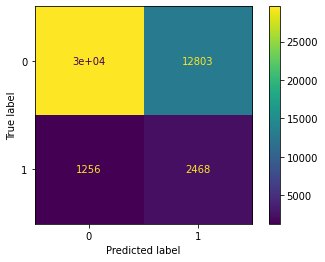

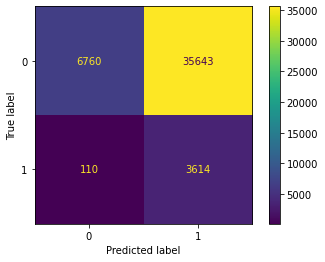

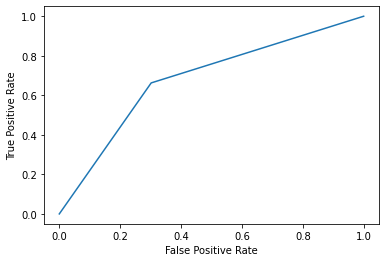

In [51]:
numeric_features = ['AMT_CREDIT', 'AMT_ANNUITY', 'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']
numeric_transformer = Pipeline(
    steps=[("scaler", MinMaxScaler())]
)

categorical_features = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'FAMILY_TYPE', 'INCOME_CLASS', 'AGE_CLASS', 'PHONE_CHANGE', 'CAR_CLASS', 'JOB_EXPERIENCE', 'CRE_TIME']
categorical_transformer = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=10, stratify= y)


ligh_gbm = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", LGBMClassifier(seed=0, objective='binary',class_weight='balanced',
    num_leaves = 20,
    max_depth = -1,
    learning_rate = 0.1,
    n_estimators =100))]
)

ligh_gbm.fit(X_train, y_train)

y_pred_train = ligh_gbm.predict(X_train)
y_pred = ligh_gbm.predict(X_test)


print('Model : Light GBM _ after Gridserach applied ')
print('Umbalanced data set addressed with class_weight')

#######################################################################################################
# Define prediction according to a choosen threshold
tt = ligh_gbm.predict_proba(X_test)
yy = pd.DataFrame(tt)
threshold = 0.8
yy['y_'] = yy[0].apply(lambda x: 0 if x > threshold else 1)
y_pred_prob = yy['y_'].to_numpy()
#######################################################################################################

print('-------------------------------------------------------')
cv_calc_field = cross_val_score(ligh_gbm, X, y, cv=3, scoring=field_score)
print('corss_val_field Scoring   :',cv_calc_field)
print('corss_val_mean :',cv_calc_field.mean())
print('-------------------------------------------------------')
cv_calc_acc = cross_val_score(ligh_gbm, X, y, cv=3, scoring='accuracy')
print('corss_val_accuracy Scoring   :',cv_calc_acc)
print('corss_val_mean :',cv_calc_acc.mean())
print('-------------------------------------------------------')
print('-------------------------------------------------------')
print('Accuracy_score _train :',accuracy_score(y_train,y_pred_train))
print('Accuracy_score _test  :', accuracy_score(y_test,y_pred))
print('-------------------------------------------------------')
print('Precision score is   : ',precision_score(y_test,y_pred))
print('Recall score is    :',recall_score(y_test,y_pred))
print('F1 score :',f1_score(y_test,y_pred))
print('-------------------------------------------------------')
print('roc_auc_score  _with prdict_proba: is :',roc_auc_score(y_test,tt[:,1]))
print('-------------------------------------------------------')
print('-------------------------------------------------------')
print('roc_auc_score  _with threshold:',threshold,' is :',roc_auc_score(y_test,y_pred_prob))
print('-------------------------------------------------------')
print('roc_auc_score  _train is :',roc_auc_score(y_train,y_pred_train))
print('roc_auc_score  _test is :',roc_auc_score(y_test,y_pred))
print('-------------------------------------------------------')
print('Count of  "1" values in y_test    : ',y_test.sum())
print('Count of  "0" values in y_test    : ',len(y_test)-y_test.sum())
print('-------------------------------------------------------')
print('-------------------------------------------------------')
print('-------------------------------------------------------')
print('confusion matrix  "threshold = 0,5" & "threshold" =',threshold,' :')

######################################################################
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()
######################################################################



######################################################################
cm = confusion_matrix(y_test, y_pred_prob)
cm_display = ConfusionMatrixDisplay(cm).plot()
######################################################################

#y_score = lg_pipe.decision_function(X_test)

fpr, tpr, _ = roc_curve(y_test, y_pred, pos_label=ligh_gbm.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

INSTALLING SHAPASH TO BE USED FOR MODEL EXPLICABILITY

LightGBM IS THE SELECTED MODEL FOR EXPLICABILITY EXEMPLE

In [43]:
pip install shapash

In [44]:
import shapash
from shapash.webapp.smart_app import SmartApp
from shapash.backend import BaseBackend, get_backend_cls_from_name
from shapash.utils.io import save_pickle
from shapash.utils.io import load_pickle
from shapash.utils.transform import inverse_transform, apply_postprocessing
from shapash.utils.utils import get_host_name
from shapash.utils.threading import CustomThread
from shapash.utils.check import check_model, check_label_dict, check_ypred, check_postprocessing, check_features_name
from shapash.backend.shap_backend import get_shap_interaction_values
from shapash.manipulation.select_lines import keep_right_contributions
from shapash.report import check_report_requirements
from shapash.manipulation.summarize import create_grouped_features_values
#from .smart_plotter import SmartPlotter
import shapash.explainer.smart_predictor
from shapash.utils.model import predict_proba, predict
from shapash.utils.explanation_metrics import find_neighbors, shap_neighbors, get_min_nb_features, get_distance
from shapash.style.style_utils import colors_loading, select_palette
from shapash.explainer.smart_explainer import  SmartExplainer
from shapash import explainer

In [14]:
from lightgbm import LGBMClassifier

P = X
p = y

P = pd.get_dummies(P, drop_first=True)

import re
P = P.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

# Encode dataframe : 

P_train, P_test, p_train, p_test = train_test_split(P, p, train_size=0.75, random_state=1)

list_col =list(P.columns)
list_col

# it's not allowed to use Json character for column's names with LightGBM
# We have to replace all undesired charachter with re module


['AMT_CREDIT',
 'AMT_ANNUITY',
 'REGION_POPULATION_RELATIVE',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUME

In [15]:
# Let's define LightGBM Classifier with parameters obtained from Gridserach :
classifier = LGBMClassifier(seed=0, objective='binary',class_weight='balanced',
    num_leaves = 20,
    max_depth = -1,
    learning_rate = 0.1,
    n_estimators =100).fit(P_train,p_train)

y_pred = pd.DataFrame(classifier.predict(P_test),columns=['pred'],index=P_test.index)

# Global explanaibility 

In [16]:
xpl = SmartExplainer(model=classifier)


xpl.compile(x=P_test, y_pred = y_pred)

In [17]:
app = xpl.run_app(title_story='Credit_score')

C:\Users\AMC\anaconda3\lib\site-packages\pandas\core\frame.py:1549: FutureWarning:

Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.

INFO:root:Your Shapash application run on http://DESKTOP-D4UUDU6:8050/
INFO:root:Use the method .kill() to down your app.


Dash is running on http://0.0.0.0:8050/



INFO:shapash.webapp.smart_app:Dash is running on http://0.0.0.0:8050/



 * Serving Flask app "shapash.webapp.smart_app" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.


GLOBAL EXPLICABILITY FOR ALL DATASET

In [18]:
xpl.plot.features_importance()

LOCAL EXPLICABILITY OF A CLIENT

In [19]:
xpl.plot.local_plot(index= 292047)